
<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Cardio Good Fitness Project</center></h1>
<h4><center>Author: Enrique Martin Sanchez</center></h4>


#Description
##Objective
Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

You are expected to do the following :

Come up with a customer profile (characteristics of a customer) of the different products

Perform univariate and multivariate analyses

Generate a set of insights and recommendations that will help the company in targeting new customers.

##Data Dictionary
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

Product - The model no. of the treadmill

Age -  Age of the customer in no of years

Gender - Gender of the customer

Education - Education of the customer in no. of years

Marital Status - Marital status of the customer

Usage - Avg. # times the customer wants to use the treadmill every week

Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)

Income - Income of the customer

Miles- Miles that a customer expects to run
 



#Importing libraries and loading the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

%matplotlib inline

Mounted at /content/drive


In [ ]:
df_orig = pd.read_csv('/content/drive/MyDrive/Data Science/Courses/AIML University of Texas/Fundamentals of AIML/Project 1 - Cardio Good Fitness/CardioGoodFitness.csv')
df = df_orig.copy()

#Defining support functions

Defining a support function that will plot 1 variable

In [ ]:
#######################################################################################
#                                                                                     #
# histogram_boxplot function                                                          #
#                                                                                     #
# will plot a hitogram and a boxplot of 1 variable                                    #
# Credits: this function was created by Great Learning staff                          #
#                                                                                     #
#######################################################################################
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column
    
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram
    
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

    f2.suptitle(feature.upper()) #Set the title of the whole figure

Defining a support function that will calculate the mean, standard error and confidence intervals for a feature grouped by another column

In [ ]:
#######################################################################################
#                                                                                     #
# groupby_feature function                                                            #
#                                                                                     #
# will calculate the mean, standard error and confidence interval 95%                 #
#                                                                                     #
#                                                                                     #
#######################################################################################
def groupby_feature(data='', groupby='', feature=''):
  stats = data.groupby([groupby])[feature].agg(['mean', 'sem']) #we get the mean and the standard error
  stats['ci95_hi'] = stats['mean'] + 1.96* stats['sem'] #calculate the higher point of the 95% confidence interval
  stats['ci95_lo'] = stats['mean'] - 1.96* stats['sem'] #calculate the lower point of the 95% confidence interval
  stats.index.name = groupby + ' / ' + feature
  print(stats, '\n')

Defining a support function to plot 2 numerical variables

In [ ]:
#######################################################################################
#                                                                                     #
# two_numerical_plot function                                                         #
#                                                                                     #
# will plot a scatterplot, and 2 lineplots of the receiving features                  #
# and print sone statistics of the variables                                          #
#                                                                                     #
#######################################################################################
def two_numerical_plot(data='', var1='', var2='', ci=False, estimator='mean', figsize=(16, 5)):
  f2, (ax1, ax2, ax3) = plt.subplots(
        ncols=3, #1 row 3 columns, 1 for each plot
        sharey=True, # y-axis will be shared among all subplots
        figsize=figsize
  )  # creating the 3 subplots
  #first subplot a scatterplot
  sns.scatterplot(data=data, x=var1, y=var2, ax=ax1, ci=ci, estimator=estimator) 
  #second subplot a lineplot without confidence interval
  sns.lineplot(data=data, x=var1, y=var2, ax=ax2, ci=False, estimator=estimator)
  #third subplot a lineplot with confidence interval
  sns.lineplot(data=data, x=var1, y=var2, ax=ax3, estimator=estimator)
  #print some statistical numbers of the variables
  groupby_feature(data=data, groupby=var1, feature=var2)
  feature = var1 + ' / ' + var2
  f2.suptitle(feature.upper()) #Set the title of the whole figure
  #print the figure with the 3 subplots
  f2.show()
  
  

Defining a support function to plot a categorical variable vs a numerical one

In [ ]:
#######################################################################################
#                                                                                     #
# categorical_numerical_plot function                                                 #
#                                                                                     #
# will plot a barplot and a stripplot of the receiving features                       #
# and print sone statistics of the variables                                          #
#                                                                                     #
#######################################################################################
def categorical_numerical_plot(data='', var1='', var2='', figsize=(12,5)):
  f2, (ax1, ax2) = plt.subplots(
      ncols = 2, #there will be 2 graphs in the same row
      figsize=figsize
  )
  #first subplot a barplot
  sns.barplot(data=data, x=var1, y=var2, estimator=np.mean, ax=ax1);
  #second subplot a stripplot
  sns.stripplot(data=data, x=var1, y=var2, ax=ax2);
  #print some statistical data of the variables
  groupby_feature(data=data, groupby=var1, feature=var2)
  feature = var1 + ' / ' + var2
  f2.suptitle(feature.upper()) #Set the title of the whole figure
  #print the figure with the plots
  f2.show()

Defining a support function that will plot the relation between 2 categorical variables

In [ ]:
#######################################################################################
#                                                                                     #
# two_categorical_plot function                                                       #
#                                                                                     #
# will plot a serie of countplots from a categorical variable and a list              # 
# categorical variables, along with some statistics of their relation                 #
#                                                                                     #
#######################################################################################
def two_categorical_plot(data='', var1='', hue=[], figsize=(20,10)):
  #hue is a list with several hue valors
  f1 = plt.figure(figsize=figsize)
  position = 1 #initialize position variable 
  for i, hue_it in enumerate(hue): #itarate for different hues
    plt.subplot(2, 3, position)
    position += 1
    sns.countplot(data=data, x=var1, hue=hue_it).set_title(var1.upper() + '/' + hue_it.upper()) #plot the variable with a hue
  

Defining a support function to plot a categorical variable vs a numerical one with different hues

In [ ]:
#######################################################################################
#                                                                                     #
# multi_variate_plot function                                                         #
#                                                                                     #
# will plot a barplot and a stripplot of the receiving features (hue)                 #
# and print sone statistics of the variables                                          #
#                                                                                     #
#######################################################################################
def multi_variate_plot(data='', var1='', var2='', hue=[], figsize=(20,10)):
  #hue is a list with several hue valors
  plt.figure(figsize=figsize)
  position = 1 #initialize position variable 
  for i, hue_it in enumerate(hue): #for each hue we will make 2 plots
    plt.subplot(2,4, position) #create a barplot sublplot in a matrix of 2 rows and 4 columns in position = position
    position += 1
    sns.barplot(data=df, x=var1, y=var2, hue=hue_it, estimator=np.mean).set_title(var1.upper()+'/'+var2.upper()+'/'+hue_it.upper());
    
    plt.subplot(2,4, position)#create a stripplot sublplot in a matrix of 2 rows and 4 columns in position = position
    position += 1
    sns.stripplot(data=df, x=var1, y=var2, hue=hue_it).set_title(var1.upper()+'/'+var2.upper()+'/'+hue_it.upper());
  #outside the for loop
  #print some statistics of the variables
  groupby_feature(data=data, groupby=var1, feature=var2)

  

#Data Overview

Let's start by performing basic steps to understand the data such as:
- observing the first few rows of the dataset
- getting information about the number of rows and columns 
- finding out the data types of the columns 
- checking the statistical summary 

### Displaying the first few rows of the dataset

In [ ]:
#lets begin visualizing the data
df.head()

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
0   TM195   18    Male         14        Single      3        4   29562    112
1   TM195   19    Male         15        Single      2        3   31836     75
2   TM195   19  Female         14     Partnered      4        3   30699     66
3   TM195   19    Male         12        Single      3        3   32973     85
4   TM195   20    Male         13     Partnered      4        2   35247     47

*Observations*
- The data has been succsefully loaded
- We can see the data in a data frame structure with 9 columns: 
  * Product
  * Age
  * Gender
  * Education
  * MaritalStatus
  * Usage
  * Fitness
  * Income
  * Miles


### Understanding the shape of the user dataset

In [ ]:

print('The data set has ', df.shape[0], 'rows and ', df.shape[1], ' columns')

The data set has  180 rows and  9  columns


###Checking the datatype of the columns and null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


*Observations*
- We can see 180 entries in the data set with index from 0 to 179

- The data set has 6 numerical columns of type int64: [Age, Education, Usage, Fitness, Income, Miles]

- The data set has 3 columns of type object: [Product, Gender, MaritalStatus]

- All the columns have 180 observations, which means that there are non missing values

###Getting the statistical summary for the dataset

In [ ]:
df.describe(include='all').T

count unique        top freq          mean           std  \
Product          180      3      TM195   80           NaN           NaN   
Age            180.0    NaN        NaN  NaN     28.788889      6.943498   
Gender           180      2       Male  104           NaN           NaN   
Education      180.0    NaN        NaN  NaN     15.572222      1.617055   
MaritalStatus    180      2  Partnered  107           NaN           NaN   
Usage          180.0    NaN        NaN  NaN      3.455556      1.084797   
Fitness        180.0    NaN        NaN  NaN      3.311111      0.958869   
Income         180.0    NaN        NaN  NaN  53719.577778  16506.684226   
Miles          180.0    NaN        NaN  NaN    103.194444     51.863605   

                   min       25%      50%      75%       max  
Product            NaN       NaN      NaN      NaN       NaN  
Age               18.0      24.0     26.0     33.0      50.0  
Gender             NaN       NaN      NaN      NaN       NaN  
Education         12.0      14.0     16.0     16.0      21.0  
MaritalStatus      NaN       NaN      NaN      NaN       NaN  
Usage              2.0       3.0      3.0      4.0       7.0  
Fitness            1.0       3.0      3.0      4.0       5.0  
Income         29562.0  44058.75  50596.5  58668.0  104581.0  
Miles             21.0      66.0     94.0   114.75     360.0

In [ ]:
df.Product.unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [ ]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df.MaritalStatus.unique()

array(['Single', 'Partnered'], dtype=object)

*Observations*
- Product
  - 3 unique values: TM195, TM498 and TM798
- Age
  - Range from 18 to 50
  - Mean and median are close
  - Max value far away from median, possible right skewness
- Gender
  - 2 unique values: Male and Female
- Education
  - Range from 12 to 21
  - Mean close to median
- MaritalStatus
  - 2 unique values: Single and Partnered
- Usage
  - Range from 2 to 7
  - Median and 25% quartile have the same value
- Fitness
  - Range from 1 to 5
  - Median and 25% quartile have the same value
- Income
  - Range from 29,562 to 104,581
  - Max value far away from median, possible right skewness
- Miles
  - Range from 21 to 360



#Univariate Analysis

###Analysis of numerical columns

The numerical columns are: Age, Education, Usage, Fitness, Income and Miles

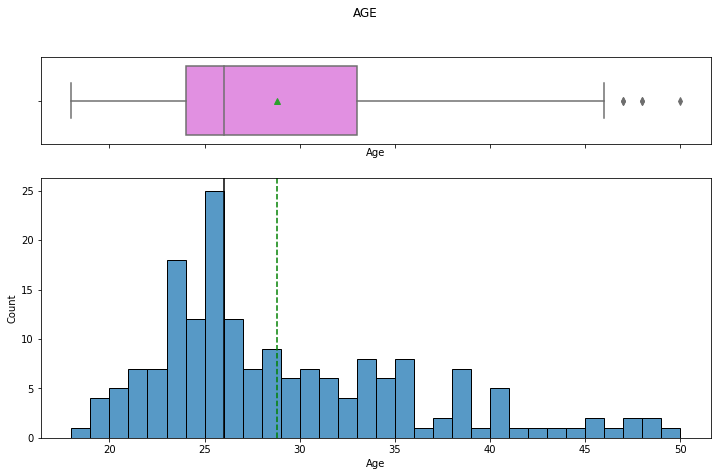

In [ ]:
histogram_boxplot(data=df, feature='Age', bins=32)

*Observations*
- Age has right-skewed distribution
- Have some outliers in the higher end
- The median is close to 26 years
- The mean is close to 29 years

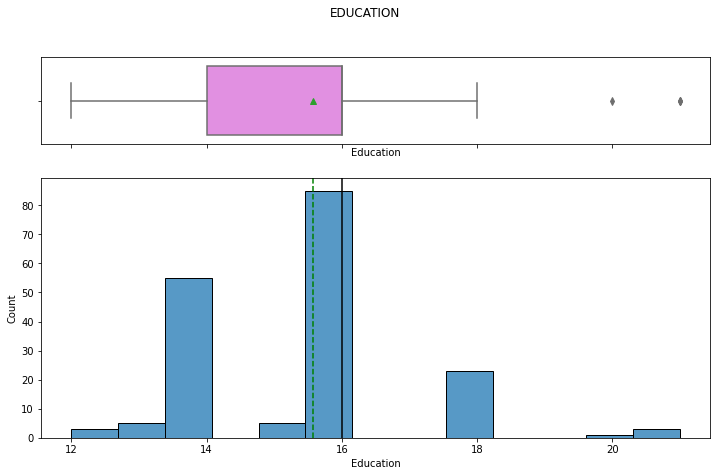

In [ ]:
histogram_boxplot(data=df, feature='Education')

*Observations*
- Education has some outliers in the higher end
- Mean and median are close to 16 years

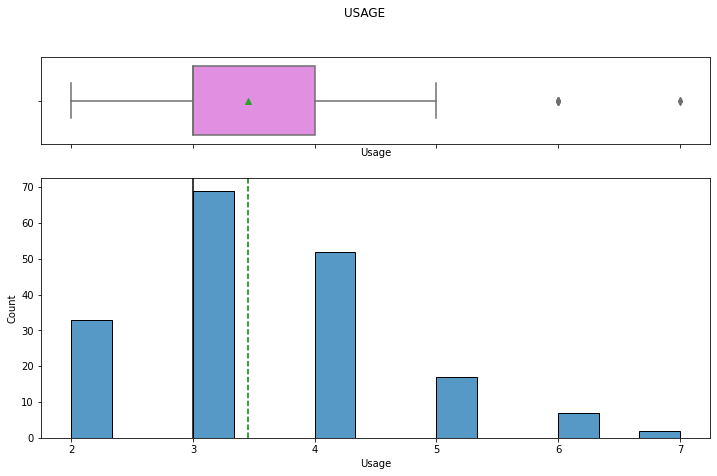

In [ ]:
histogram_boxplot(data=df, feature='Usage')

*Observations*
- Usage has a slightly right-skewed distribution
- Some outliers in the higher end
- Median is equal to the 25% quartile

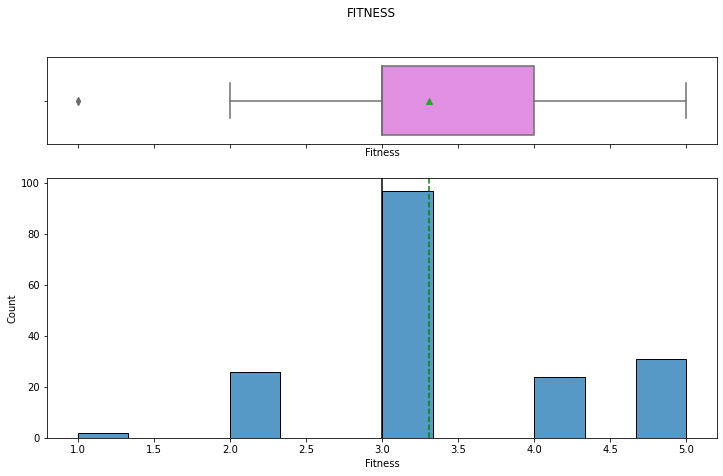

In [ ]:
histogram_boxplot(data=df, feature='Fitness')

*Observations*
- Median value and 25% quartile value are the same
- Some outliers in the lower-end
- Second place of observations is the maximum value

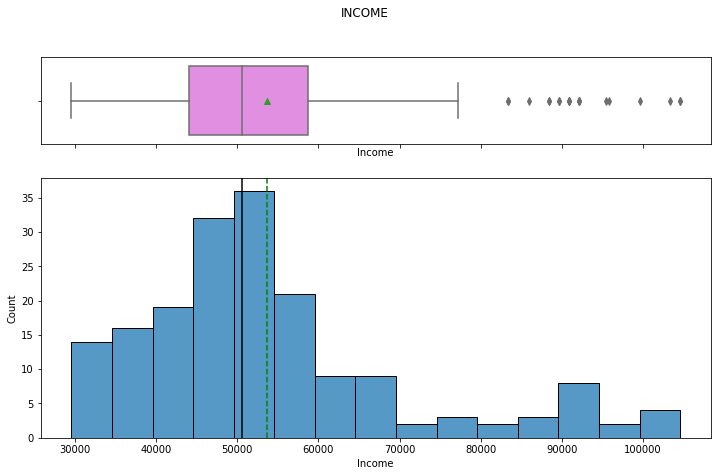

In [ ]:
histogram_boxplot(data=df, feature='Income')

*Observations*
- Income has a right-skewed distribution
- Some outliers in the higher end
- Median close to 50,000 USD/year
- Mean close to 54,000 USD/year

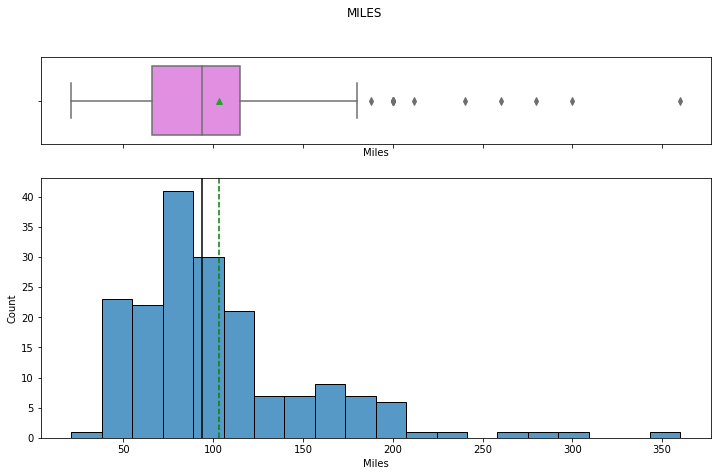

In [ ]:
histogram_boxplot(data=df, feature='Miles')

*Observations*
- Miles has a right-skewed distribution
- Some outliers in the higher end
- Median and mean close to 100 miles 

###Analyisis of categorical columns

The categorical columns are: Product, Gender, MaritalStatus

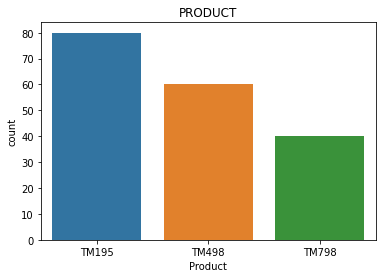

In [ ]:
sns.countplot(data=df, x='Product').set_title('PRODUCT');

In [ ]:
df.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [ ]:
df.Product.value_counts(normalize=True)

TM195    0.444444
TM498    0.333333
TM798    0.222222
Name: Product, dtype: float64

*Observations*
- Product has 3 unique values: TM195, TM498 and TM798
- The most frequent is TM 195 with 80 observations - 44.4%
- The least frequent is TM798 with 40 observations - 22.2%

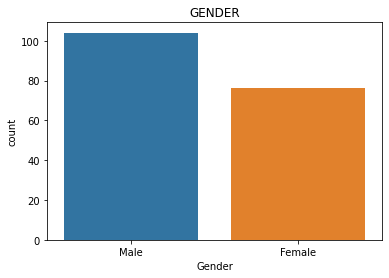

In [ ]:
sns.countplot(data=df, x='Gender').set_title('GENDER');

In [ ]:
df.Gender.value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
df.Gender.value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

*Observations*
- Gender has 2 unique values: Male and Female
- Male is the most frequent with 104 observations
- Female has 76 observations

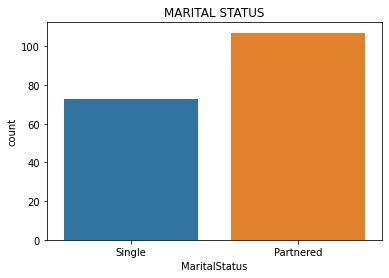

In [ ]:
sns.countplot(data=df, x='MaritalStatus').set_title('MARITAL STATUS');

In [ ]:
df.MaritalStatus.value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
df.MaritalStatus.value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

*Observations*
- There are 2 unique values for MaritalStatus: Single and Partnered
- Partnered is the most frequent value with 107 observations
- Single is the least frequent value with 73 observations

#Bivariate Analysis

##Two numerical variables

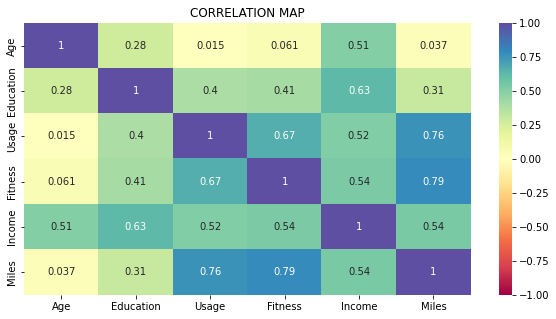

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1).set_title('CORRELATION MAP')
plt.show()

*Observations*
- The column Miles has a high correlation with Usage and Fitness. This indicates that more the customers calificate themselves as a fitness person and more times they will use the treadmill the Miles they expect to run is higher

- The column Fitness and Usage are highly correlated, as expected, indicating that the customers that consider themselves as more fitness persons will use the tredmill more hours per week

- The Income variable has a relative high correlation with every other numerical variable in the dataset. Indicating that with a higher Income the customers have more years of education, consider themselves as more fitness persons, will use more hours the treadmill, and expect to run higher miles per week

<Figure size 720x360 with 0 Axes>

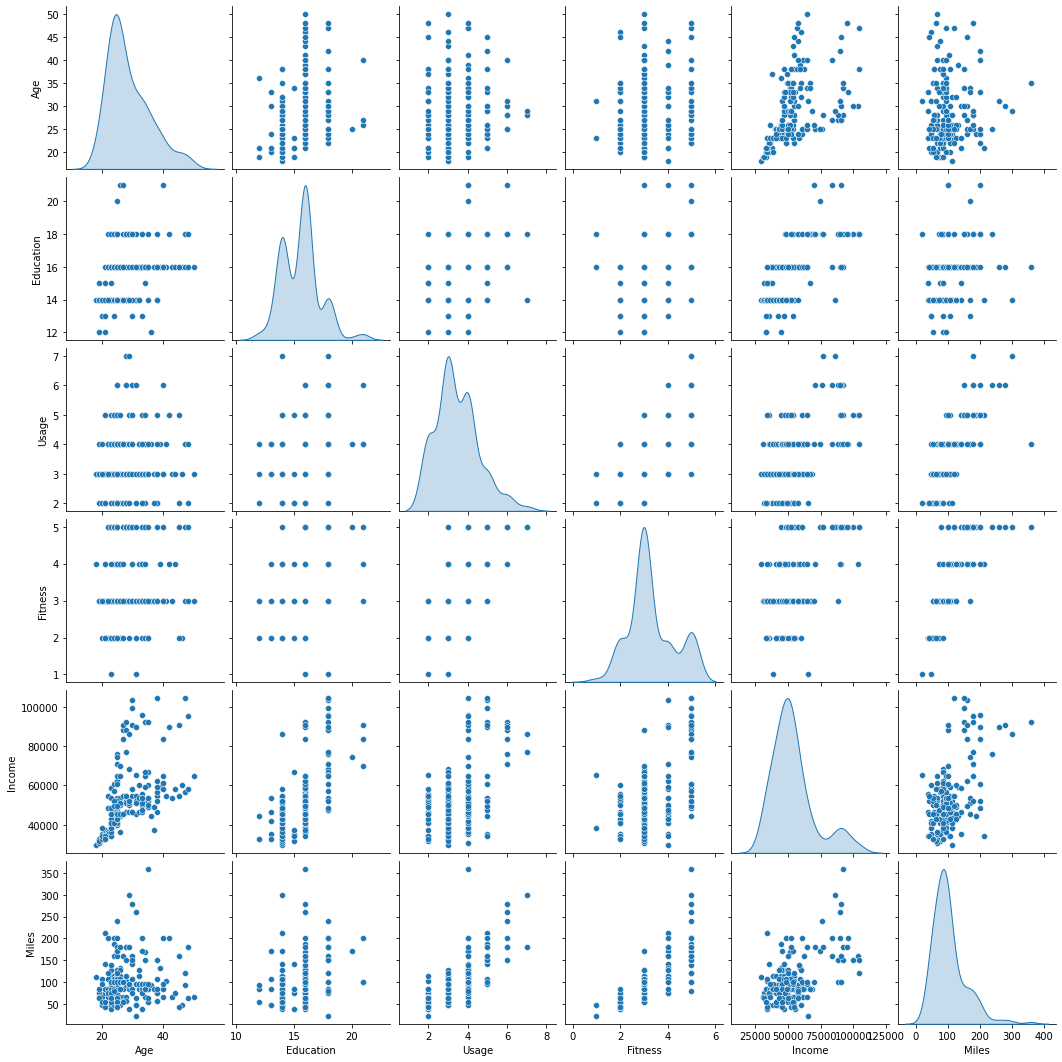

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(data=df, diag_kind='kde');
plt.show()

In this graph we can attest the correlations we saw as high in the heatmap.



                      mean       sem    ci95_hi    ci95_lo
Age / Education                                           
18               14.000000       NaN        NaN        NaN
19               13.750000  0.629153  14.983140  12.516860
20               13.800000  0.200000  14.192000  13.408000
21               14.142857  0.508432  15.139384  13.146330
22               15.142857  0.594762  16.308590  13.977124
23               15.500000  0.258831  16.007309  14.992691
24               15.416667  0.398070  16.196884  14.636450
25               15.440000  0.356277  16.138303  14.741697
26               16.250000  0.462618  17.156731  15.343269
27               16.142857  0.986301  18.076007  14.209708
28               15.777778  0.618640  16.990313  14.565242
29               15.666667  0.802773  17.240102  14.093232
30               15.285714  0.778102  16.810794  13.760635
31               15.666667  0.614636  16.871354  14.461980
32               15.000000  0.577350  16.131607  13.8683

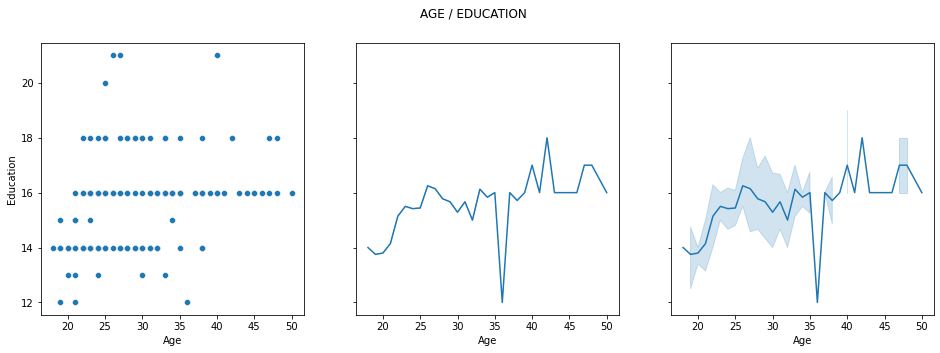

In [ ]:
two_numerical_plot(data=df, var1='Age', var2='Education', ci=True, estimator='mean')

In [ ]:
df[df.Age == 36]

Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  Miles
66   TM195   36   Male         12        Single      4        3   44343     94

*Observations*
- We can see an slightly positive correlation
- We have an inusual low value at age 36
- We only have 1 data row in the data frame with age of 36 and has an inusual low value of education

                 mean       sem   ci95_hi   ci95_lo
Age / Usage                                        
18           3.000000       NaN       NaN       NaN
19           3.000000  0.408248  3.800167  2.199833
20           3.000000  0.316228  3.619806  2.380194
21           3.142857  0.508432  4.139384  2.146330
22           3.428571  0.202031  3.824551  3.032592
23           3.388889  0.183269  3.748096  3.029682
24           3.750000  0.278660  4.296174  3.203826
25           3.320000  0.249800  3.809608  2.830392
26           3.583333  0.228908  4.031994  3.134673
27           3.571429  0.297381  4.154295  2.988562
28           4.000000  0.623610  5.222275  2.777725
29           4.000000  0.730297  5.431382  2.568618
30           4.285714  0.420560  5.110012  3.461417
31           2.833333  0.654047  4.115266  1.551401
32           3.500000  0.288675  4.065803  2.934197
33           3.250000  0.365963  3.967287  2.532713
34           3.500000  0.428174  4.339222  2.660778
35          

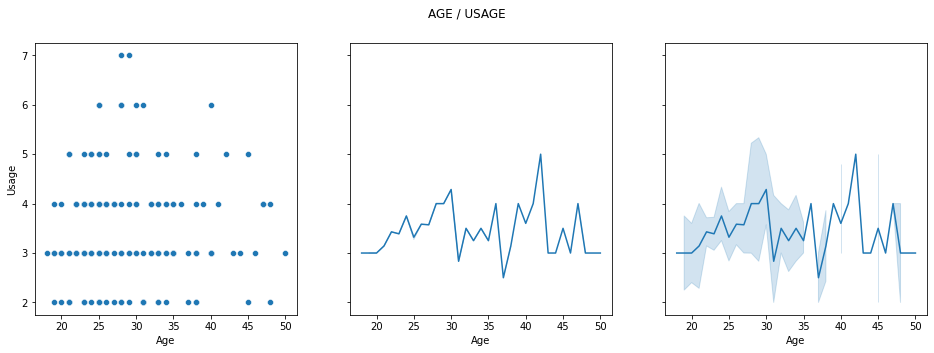

In [ ]:
two_numerical_plot(data=df, var1='Age', var2='Usage', ci=True, estimator='mean')

*Observations*
- Customers of age 42 will use the tredmill 5 times per week on average
- Customers of age 37 will only use the tredmill 2.5 times per week
- These two variables are independent, no correlation detected 

                   mean       sem   ci95_hi   ci95_lo
Age / Fitness                                        
18             4.000000       NaN       NaN       NaN
19             3.000000  0.000000  3.000000  3.000000
20             2.800000  0.200000  3.192000  2.408000
21             3.000000  0.308607  3.604869  2.395131
22             3.428571  0.428571  4.268571  2.588571
23             3.000000  0.228665  3.448183  2.551817
24             3.750000  0.350865  4.437695  3.062305
25             3.360000  0.190438  3.733259  2.986741
26             3.250000  0.179435  3.601693  2.898307
27             3.142857  0.404061  3.934817  2.350898
28             3.666667  0.333333  4.320000  3.013333
29             3.500000  0.500000  4.480000  2.520000
30             3.857143  0.340068  4.523676  3.190610
31             2.666667  0.557773  3.759902  1.573431
32             3.250000  0.250000  3.740000  2.760000
33             3.375000  0.323899  4.009843  2.740157
34             3.666667  0.4

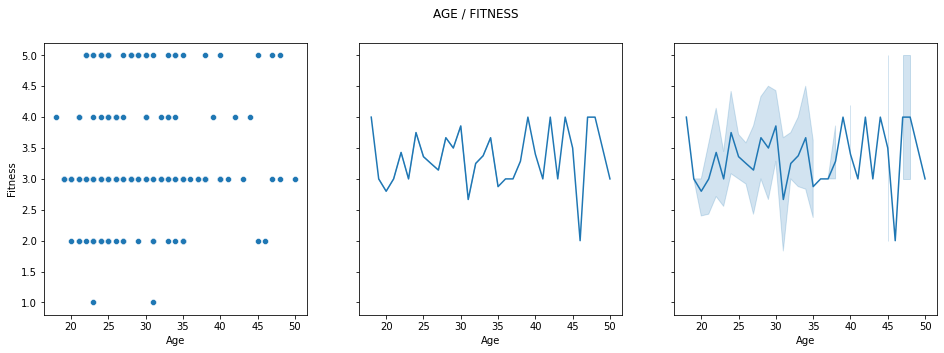

In [ ]:
two_numerical_plot(data=df, var1='Age', var2='Fitness', ci=True, estimator='mean')

In [ ]:
df[df.Age == 46]

Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
77   TM195   46  Female         16     Partnered      3        2   60261   

    Miles  
77     47

*Observations*
- Independent variables, no correlation detected
- An inusual low value at age 46, we have only 1 entry on the dataframe with that age and has a low Fitness value

                      mean           sem        ci95_hi       ci95_lo
Age / Income                                                         
18            29562.000000           NaN            NaN           NaN
19            31836.000000    464.178306   32745.789480  30926.210520
20            34792.200000   1054.410423   36858.844429  32725.555571
21            34597.285714    600.473334   35774.213448  33420.357980
22            42179.571429   3104.233936   48263.869942  36095.272915
23            42337.833333   1505.516402   45288.645481  39387.021186
24            48399.833333   1787.369210   51903.076986  44896.589681
25            51304.000000   2140.470663   55499.322500  47108.677500
26            51094.916667   2584.188386   56159.925903  46029.907431
27            64816.285714   8176.798750   80842.811264  48789.760165
28            63250.666667   5861.459370   74739.127032  51762.206302
29            59037.666667   6189.182825   71168.465004  46906.868329
30            71374.

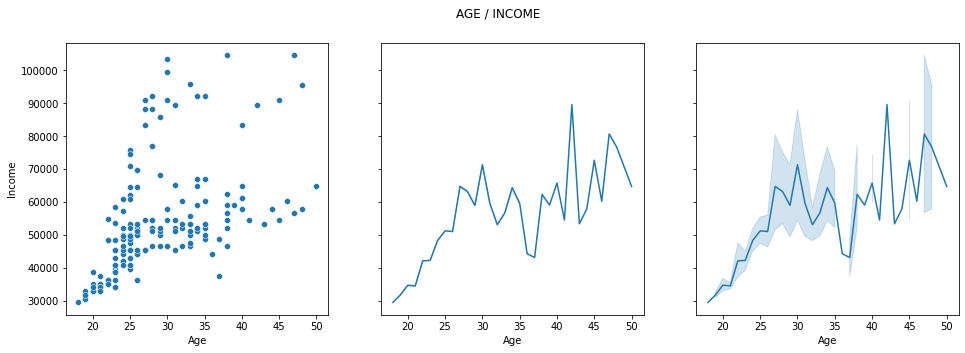

In [ ]:
two_numerical_plot(data=df, var1='Age', var2='Income', ci=True, estimator='mean')

Observations
- We can see a positive correlation between Age and Income

                   mean        sem     ci95_hi    ci95_lo
Age / Miles                                              
18           112.000000        NaN         NaN        NaN
19            72.500000   4.804512   81.916843  63.083157
20            73.400000  11.612924   96.161331  50.638669
21            99.000000  22.289224  142.686880  55.313120
22           103.857143  17.568138  138.290692  69.423593
23            89.444444   6.385350  101.959730  76.929158
24           112.833333  13.400494  139.098301  86.568366
25           107.800000  10.730797  128.832362  86.767638
26           103.250000   9.939304  122.731037  83.768963
27            88.571429  13.982740  115.977598  61.165259
28           110.888889  16.446415  143.123862  78.653915
29           132.000000  38.464702  207.390817  56.609183
30           142.285714  26.095716  193.433318  91.138111
31            89.000000  35.615540  158.806458  19.193542
32           105.000000   9.345231  123.316652  86.683348
33           1

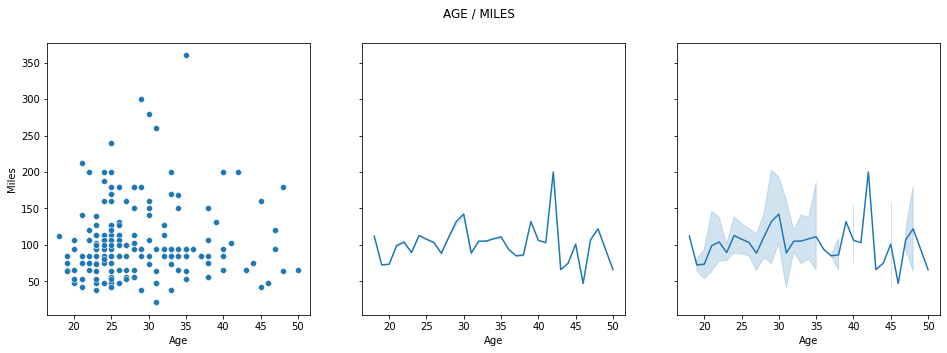

In [ ]:
two_numerical_plot(data=df, var1='Age', var2='Miles', ci=True, estimator='mean')

In [ ]:
df[df.Age == 42]

Product  Age Gender  Education MaritalStatus  Usage  Fitness  Income  \
176   TM798   42   Male         18        Single      5        4   89641   

     Miles  
176    200

*Observations*
- Independent variables, no correlation between them
- An inusual high value at age 46, only 1 entry in the dataset at that age 

                       mean       sem   ci95_hi   ci95_lo
Education / Usage                                        
12                 3.000000  0.577350  4.131607  1.868393
13                 3.600000  0.244949  4.080100  3.119900
14                 3.036364  0.127032  3.285346  2.787381
15                 2.800000  0.583095  3.942867  1.657133
16                 3.423529  0.100943  3.621378  3.225681
18                 4.565217  0.250107  5.055428  4.075007
20                 4.000000       NaN       NaN       NaN
21                 4.666667  0.666667  5.973333  3.360000 



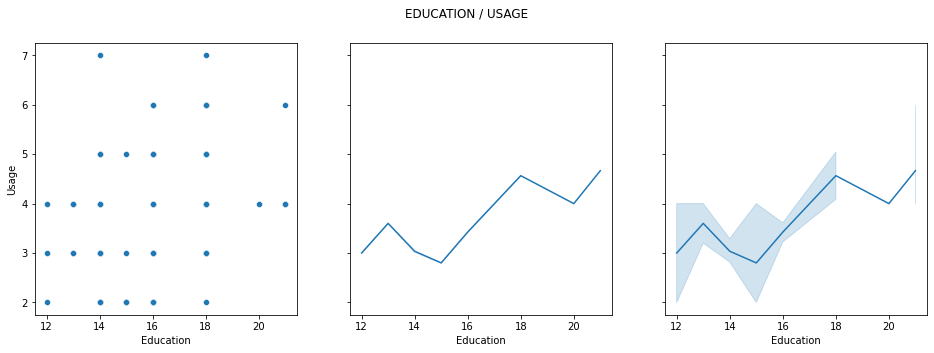

In [ ]:
two_numerical_plot(data=df, var1='Education', var2='Usage', ci=True, estimator='mean')

*Observations*
- With more years of education there is a higher usage per week expectation
- Variables slightly correlated 

                         mean       sem   ci95_hi   ci95_lo
Education / Fitness                                        
12                   2.666667  0.333333  3.320000  2.013333
13                   2.800000  0.374166  3.533365  2.066635
14                   2.981818  0.087966  3.154231  2.809405
15                   3.000000  0.316228  3.619806  2.380194
16                   3.294118  0.102931  3.495863  3.092373
18                   4.260870  0.219750  4.691580  3.830159
20                   5.000000       NaN       NaN       NaN
21                   4.000000  0.577350  5.131607  2.868393 



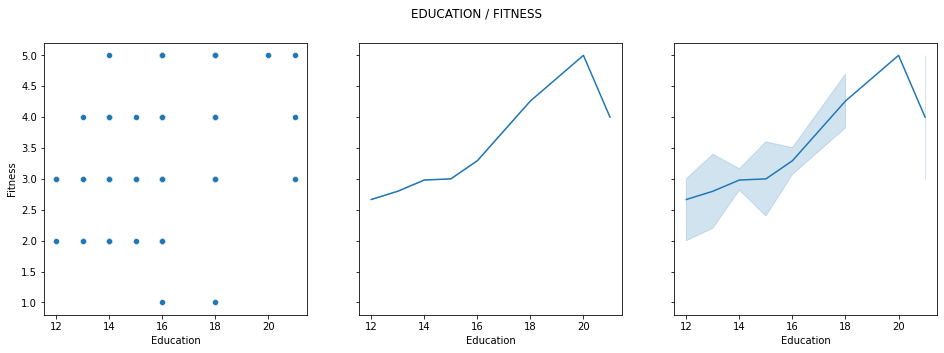

In [ ]:
two_numerical_plot(data=df, var1='Education', var2='Fitness', ci=True, estimator='mean')

*Observations*
- Variables slightly correlated

                            mean          sem       ci95_hi       ci95_lo
Education / Income                                                       
12                  36763.000000  3790.000000  44191.400000  29334.600000
13                  42069.000000  3736.563287  49392.664043  34745.335957
14                  44825.709091  1242.679295  47261.360508  42390.057673
15                  41159.400000  6545.407906  53988.399496  28330.400504
16                  53966.329412  1337.320781  56587.478142  51345.180681
18                  77035.521739  3987.468944  84850.960869  69220.082610
20                  74701.000000          NaN           NaN           NaN
21                  81341.000000  6197.271577  93487.652291  69194.347709 



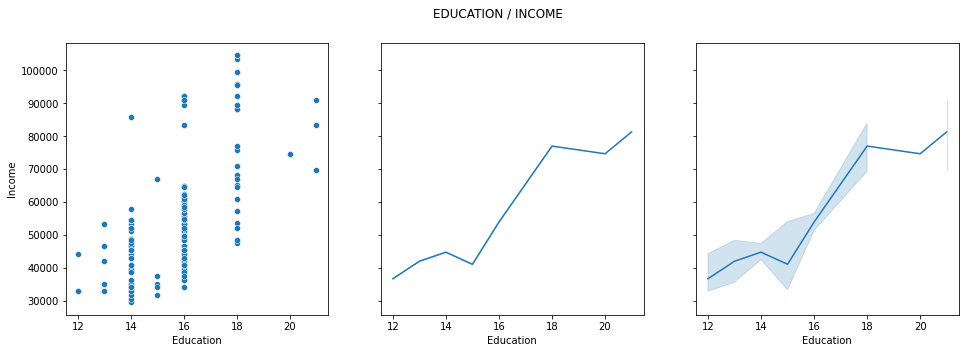

In [ ]:
two_numerical_plot(data=df, var1='Education', var2='Income', ci=True, estimator='mean')

*Observations*
- Variables highly correlated
- As the number of years of education increases the Income of the customers increases as well


                         mean        sem     ci95_hi     ci95_lo
Education / Miles                                               
12                  77.333333  12.440972  101.717638   52.949029
13                  91.000000  22.774986  135.638973   46.361027
14                  90.236364   5.864805  101.731381   78.741346
15                  84.800000  16.499697  117.139406   52.460594
16                 101.364706   5.677412  112.492434   90.236978
18                 144.130435  11.427258  166.527861  121.733009
20                 170.000000        NaN         NaN         NaN
21                 133.333333  33.333333  198.666667   68.000000 



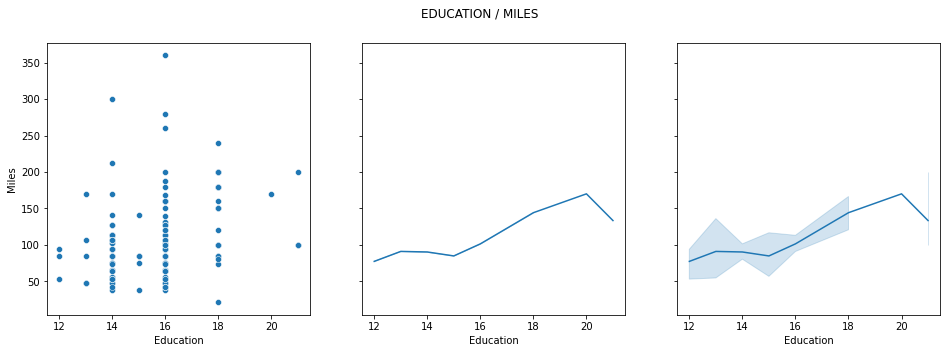

In [ ]:
two_numerical_plot(data=df, var1='Education', var2='Miles', ci=True, estimator='mean')

*Observations*
- Variables slightly correlated
- As the numbers of years of education increases so does the miles expected to run per week

                     mean       sem   ci95_hi   ci95_lo
Usage / Fitness                                        
2                2.515152  0.098485  2.708182  2.322121
3                3.000000  0.077250  3.151411  2.848589
4                3.596154  0.126621  3.844331  3.347977
5                4.411765  0.172755  4.750365  4.073165
6                4.857143  0.142857  5.137143  4.577143
7                5.000000  0.000000  5.000000  5.000000 



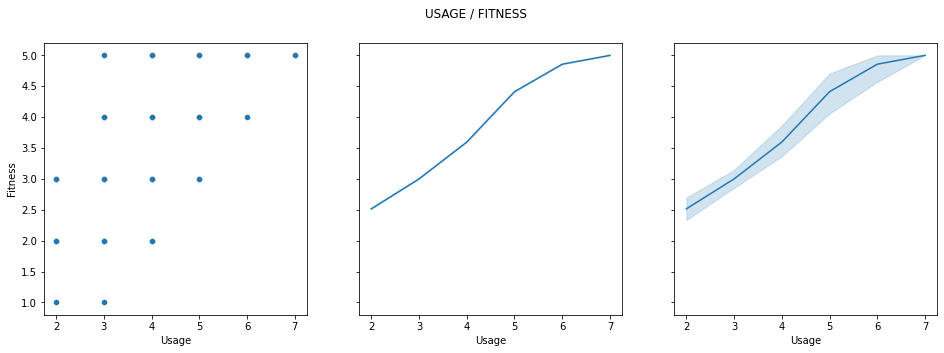

In [ ]:
two_numerical_plot(data=df, var1='Usage', var2='Fitness', ci=True, estimator='mean')

*Observations*
- Variables correlated
- As the expected use increases the fitness value increases as well

                        mean          sem       ci95_hi       ci95_lo
Usage / Income                                                       
2               46870.636364  1447.306759  49707.357611  44033.915117
3               47921.753623  1178.959485  50232.514214  45610.993033
4               56403.442308  2365.745205  61040.302910  51766.581706
5               66396.117647  5944.749917  78047.827485  54744.407809
6               84483.142857  3078.864172  90517.716635  78448.569079
7               81548.500000  4357.500000  90089.200000  73007.800000 



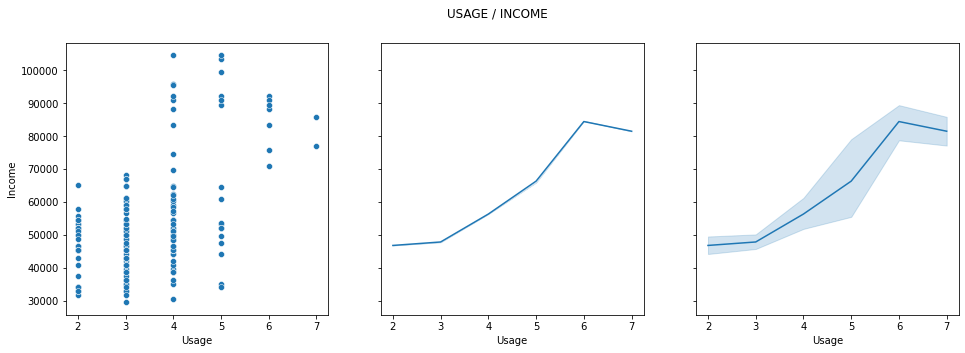

In [ ]:
two_numerical_plot(data=df, var1='Usage', var2='Income', ci=True, estimator='mean')

*Observations*
- Variables slightly correlated
- As the income of the customers increases so does the usage expectation per week

                     mean        sem     ci95_hi     ci95_lo
Usage / Miles                                               
2               58.545455   3.478040   65.362413   51.728496
3               83.420290   2.201817   87.735852   79.104728
4              118.942308   6.755558  132.183202  105.701414
5              160.705882   8.677542  177.713865  143.697899
6              212.857143  18.088971  248.311527  177.402759
7              240.000000  60.000000  357.600000  122.400000 



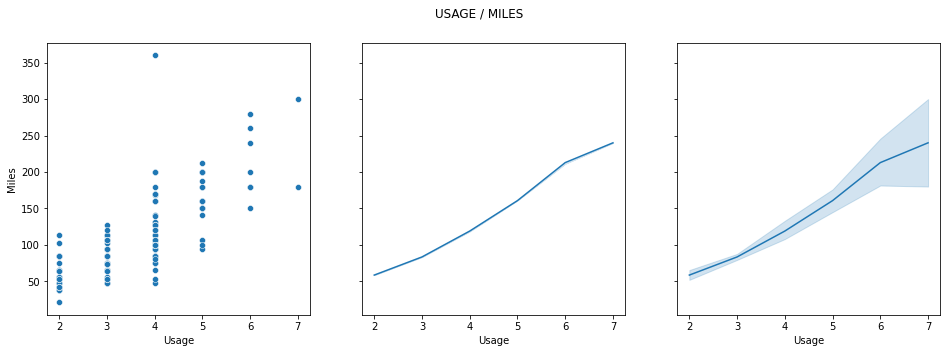

In [ ]:
two_numerical_plot(data=df, var1='Usage', var2='Miles', ci=True, estimator='mean')

*Observations*
- Variables highly correlated
- As the number of usage per week increases so does the miles expected to run per week

                          mean           sem       ci95_hi       ci95_lo
Fitness / Income                                                        
1                 51939.000000  13281.000000  77969.760000  25908.240000
2                 46179.692308   1534.644726  49187.595971  43171.788644
3                 48853.494845   1050.108338  50911.707188  46795.282503
4                 54995.291667   3736.345848  62318.529529  47672.053805
5                 74396.709677   3568.043255  81390.074458  67403.344897 



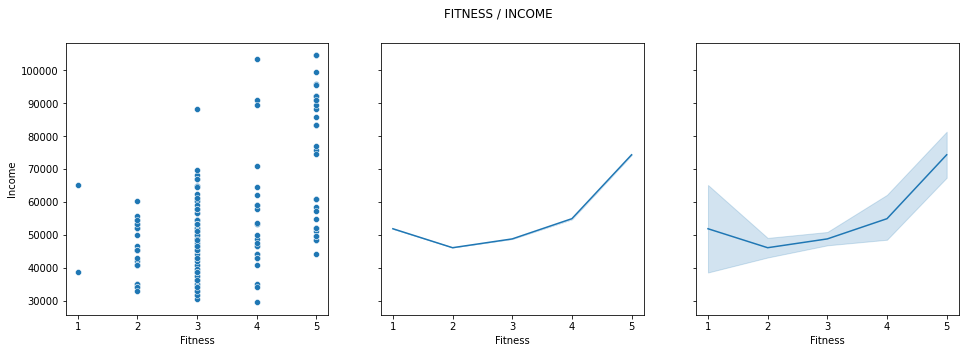

In [ ]:
two_numerical_plot(data=df, var1='Fitness', var2='Income', ci=True, estimator='mean')

Observations
- As higher the fitness perception of the customers higher is their income
- An exception to the prior observation is visible at point 2 of fitness person

                       mean        sem     ci95_hi     ci95_lo
Fitness / Miles                                               
1                 34.000000  13.000000   59.480000    8.520000
2                 51.692308   2.318998   56.237544   47.147072
3                 87.185567   1.949829   91.007231   83.363903
4                131.625000   7.679922  146.677647  116.572353
5                178.935484  10.828570  200.159481  157.711487 



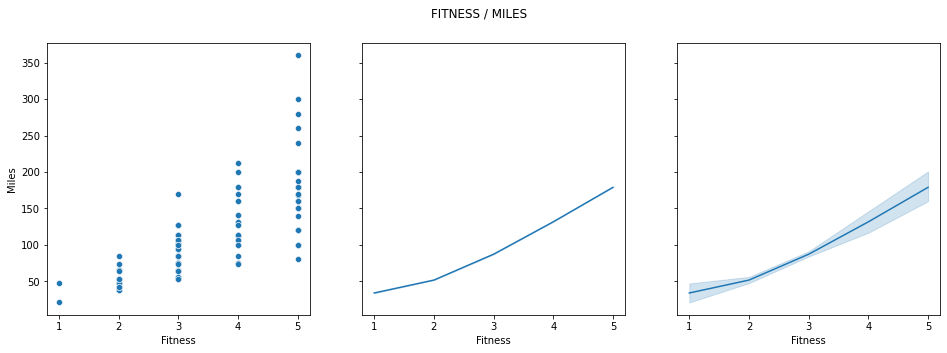

In [ ]:
two_numerical_plot(data=df, var1='Fitness', var2='Miles', ci=True, estimator='mean')

Observations
- With a higher self perception as a fitness person the customers intend to run more miles per week

                 mean        sem     ci95_hi     ci95_lo
Income / Miles                                          
29562           112.0        NaN         NaN         NaN
30699            66.0        NaN         NaN         NaN
31836            69.5   5.500000   80.280000   58.720000
32973            68.4   7.180529   82.473837   54.326163
34110           100.2  31.461723  161.864977   38.535023
...               ...        ...         ...         ...
95508           180.0        NaN         NaN         NaN
95866           200.0        NaN         NaN         NaN
99601           150.0        NaN         NaN         NaN
103336          160.0        NaN         NaN         NaN
104581          135.0  15.000000  164.400000  105.600000

[62 rows x 4 columns] 



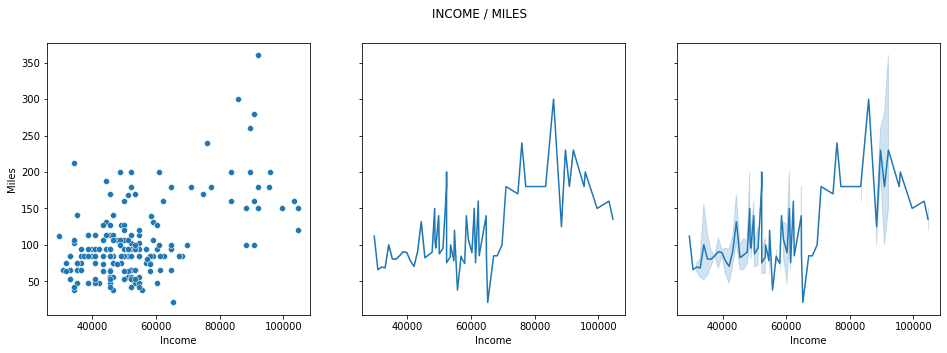

In [ ]:
two_numerical_plot(data=df, var1='Income', var2='Miles', ci=True, estimator='mean')

*Observations*
- Variables slightly correlated
- As the income of the customers increases so does his expected miles to run per week

## Categorical variable and numerical variable

We will make a categorical variable based on the age of the customers:
- Young from 18 to 29 years
- Young-Adult 30 to 39 years
- Adult from 40 to 50 years

In [ ]:
# using pd.cut() function to create bins
df['Age_bins'] = pd.cut(df['Age'],bins=[18,30,40,50],labels=['Young','Young-Adult','Adult'], right = False)

                           mean       sem    ci95_hi    ci95_lo
Age_bins / Education                                           
Young                 15.371681  0.158111  15.681579  15.061783
Young-Adult           15.660000  0.199202  16.050437  15.269563
Adult                 16.687500  0.350223  17.373937  16.001063 



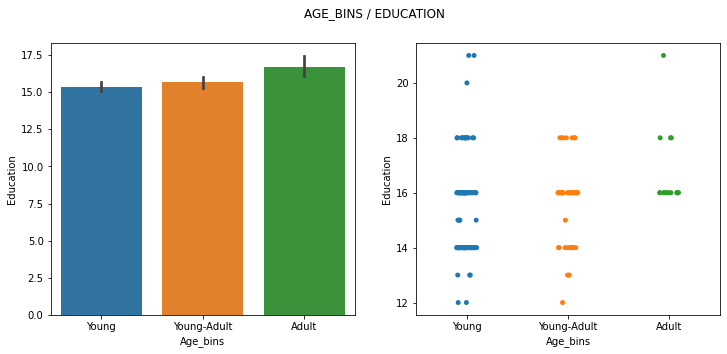

In [ ]:
categorical_numerical_plot(data=df, var1='Age_bins', var2='Education')

*Observations*
- All adult customers have 16+ years of education

                      mean       sem   ci95_hi   ci95_lo
Age_bins / Usage                                        
Young             3.477876  0.104495  3.682687  3.273065
Young-Adult       3.380000  0.148159  3.670391  3.089609
Adult             3.562500  0.273385  4.098335  3.026665 



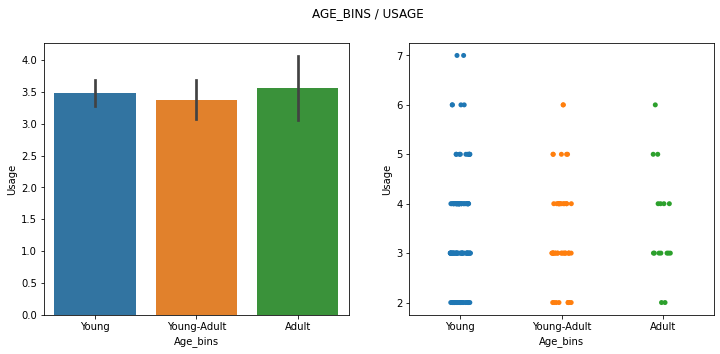

In [ ]:
categorical_numerical_plot(data=df, var1='Age_bins', var2='Usage')

*Observations*

- The expected usage per week is almost the same for all ages groups

                        mean       sem   ci95_hi   ci95_lo
Age_bins / Fitness                                        
Young               3.300885  0.089673  3.476644  3.125126
Young-Adult         3.280000  0.137143  3.548800  3.011200
Adult               3.500000  0.258199  4.006070  2.993930 



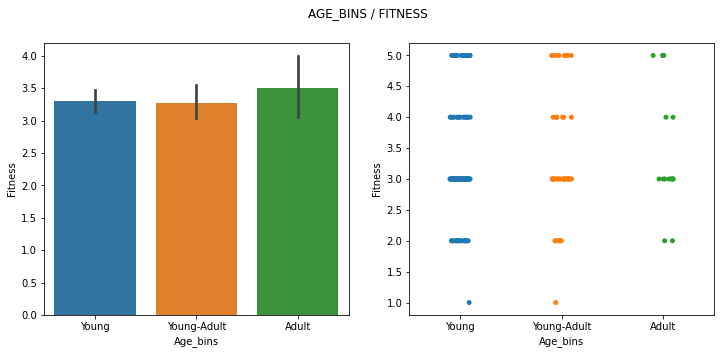

In [ ]:
categorical_numerical_plot(data=df, var1='Age_bins', var2='Fitness')

*Observations*
- The difference of how fitness they think they are between the different groups of ages is minimal
- The Adult customers consider themselves on average more fitness persons that the other range of ages
- The Adult group has an extensive confidence interval due to a higher standard error

                           mean          sem       ci95_hi       ci95_lo
Age_bins / Income                                                       
Young              48532.026549  1291.561893  51063.487860  46000.565238
Young-Adult        60305.920000  2398.221974  65006.435069  55605.404931
Adult              69081.250000  4311.172319  77531.147745  60631.352255 



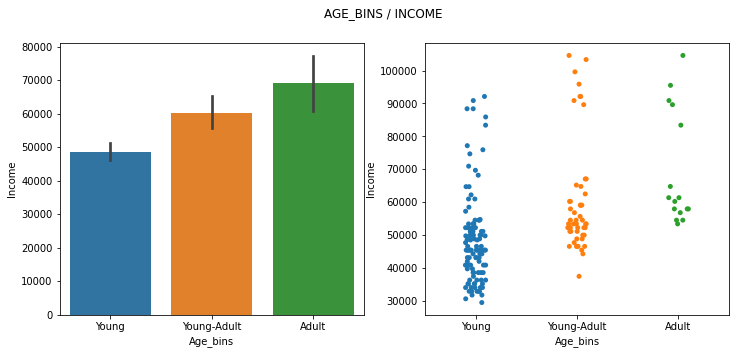

In [ ]:
categorical_numerical_plot(data=df, var1='Age_bins', var2='Income')

*Observations*
- The income increases as the age of the customer does

                        mean        sem     ci95_hi    ci95_lo
Age_bins / Miles                                              
Young             101.743363   4.421456  110.409416  93.077310
Young-Adult       106.600000   8.827092  123.901100  89.298900
Adult             105.125000  13.055291  130.713371  79.536629 



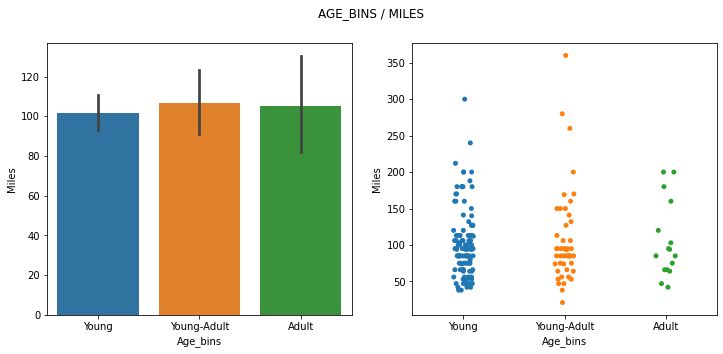

In [ ]:
categorical_numerical_plot(data=df, var1='Age_bins', var2='Miles')

*Observations*
- The expected miles to run is almost the same for every age group
- As the age increases so does the confidence interval of miles to run per week, meaning that younger customers are more consistent in their expectation than adults
- We can see in the graph that the mean of miles the young people intend to run is the lower one and the Young-Adults are the ones that intend to run more miles per week
- We can see also that the confidence interval is really high for the Adults and very low for the Young, meaning that the adults will run 105.125 miles per week with a confidence interval from 79.5 to 130.7 having the highest standard error with a value of 13

                          mean       sem    ci95_hi    ci95_lo
Product / Education                                           
TM195                15.037500  0.135996  15.304052  14.770948
TM498                15.116667  0.157831  15.426015  14.807318
TM798                17.325000  0.259159  17.832952  16.817048 



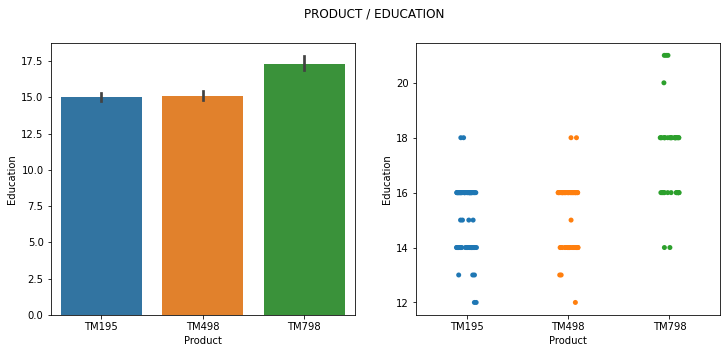

In [ ]:
categorical_numerical_plot(data=df, var1='Product', var2='Education')

*Observations*
- Customers with more than 18 years of education only buy TM798 model
- Customers have in average more than 15 years of education

                     mean       sem   ci95_hi   ci95_lo
Product / Usage                                        
TM195            3.087500  0.087500  3.259000  2.916000
TM498            3.066667  0.103243  3.269023  2.864310
TM798            4.775000  0.149733  5.068476  4.481524 



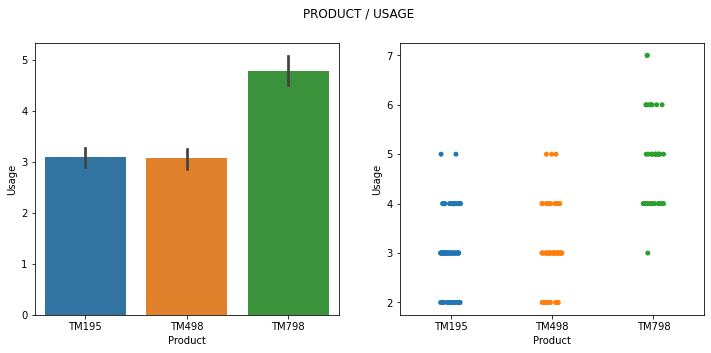

In [ ]:
categorical_numerical_plot(data=df, var1='Product', var2='Usage')

*Observations*
- Intensive users (those who want to use more times per week the tredmill) prefer TM798 model

                     mean       sem   ci95_hi   ci95_lo
Product / Fitness                                      
TM195              2.9625  0.074298  3.108124  2.816876
TM498              2.9000  0.081303  3.059354  2.740646
TM798              4.6250  0.105536  4.831850  4.418150 



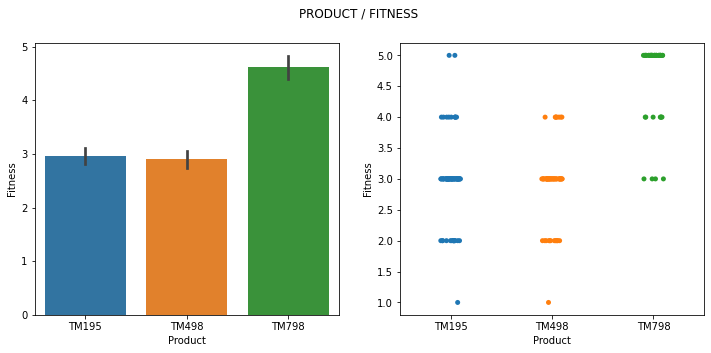

In [ ]:
categorical_numerical_plot(data=df, var1='Product', var2='Fitness')

*Observations*
- Customers who consider themselves more fitness persons prefer the TM798 model

                       mean          sem       ci95_hi       ci95_lo
Product / Income                                                    
TM195             46418.025  1014.703408  48406.843680  44429.206320
TM498             48973.650  1117.225226  51163.411443  46783.888557
TM798             75441.575  2926.029702  81176.593216  69706.556784 



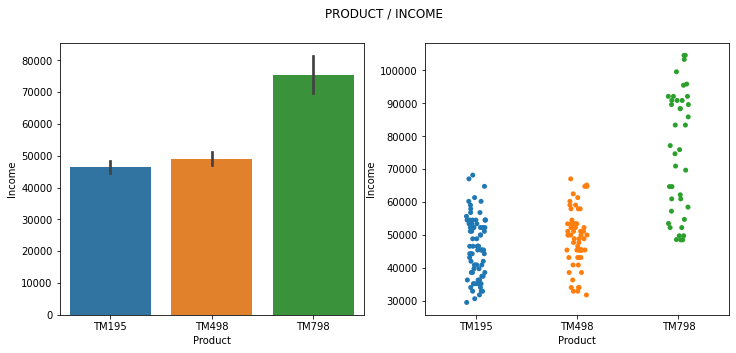

In [ ]:
categorical_numerical_plot(data=df, var1='Product', var2='Income')

*Observations*
- Customers with more income prefer the TM798 model
- Customers with income higher than 70,000 USD/year only buy the TM798 model

                       mean       sem     ci95_hi     ci95_lo
Product / Miles                                              
TM195             82.787500  3.228223   89.114817   76.460183
TM498             87.933333  4.294252   96.350068   79.516599
TM798            166.900000  9.497355  185.514815  148.285185 



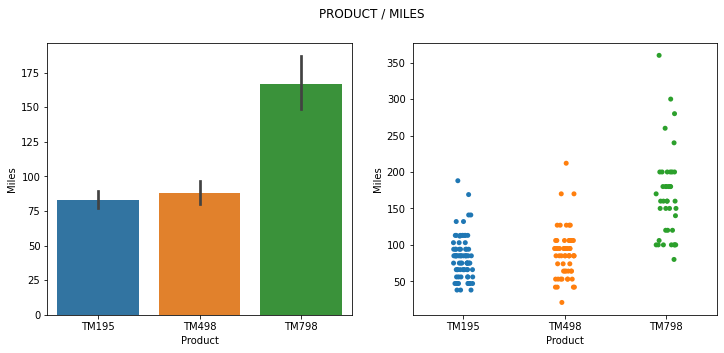

In [ ]:
categorical_numerical_plot(data=df, var1='Product', var2='Miles')

In [ ]:
df[df.Product == 'TM195'].Miles.max()

188

In [ ]:
df[df.Product == 'TM498'].Miles.max()

212

*Observations*
- Customers who intend to run a lot of miles per week prefer the TM798 model
- Only customers who bought TM798 model intendo to run more than 212 miles 

                         mean       sem    ci95_hi    ci95_lo
Gender / Education                                           
Female              15.394737  0.165518  15.719152  15.070322
Male                15.701923  0.169500  16.034144  15.369702 



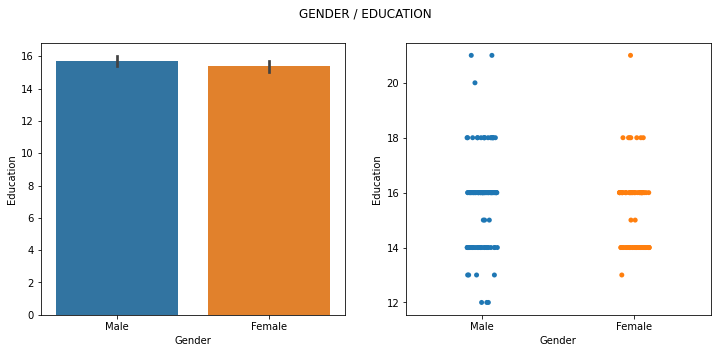

In [ ]:
categorical_numerical_plot(data=df, var1='Gender', var2='Education')

*Observations*
- This 2 variables are independent

                    mean       sem   ci95_hi   ci95_lo
Gender / Usage                                        
Female          3.184211  0.116545  3.412638  2.955783
Male            3.653846  0.107390  3.864332  3.443361 



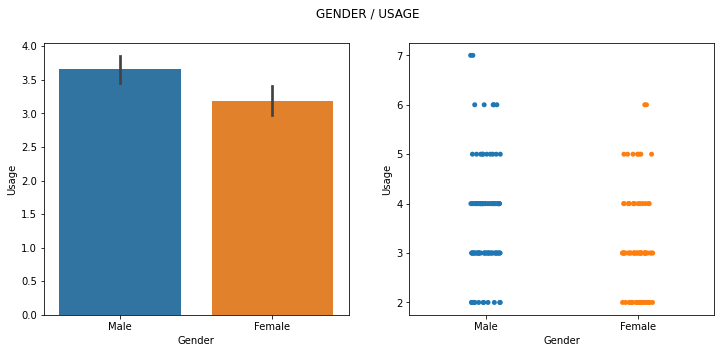

In [ ]:
categorical_numerical_plot(data=df, var1='Gender', var2='Usage')

*Observations*
- Male customers intend to use the tredmill more times per week than the female ones

                      mean       sem   ci95_hi   ci95_lo
Gender / Fitness                                        
Female            3.026316  0.095465  3.213427  2.839204
Male              3.519231  0.097562  3.710453  3.328008 



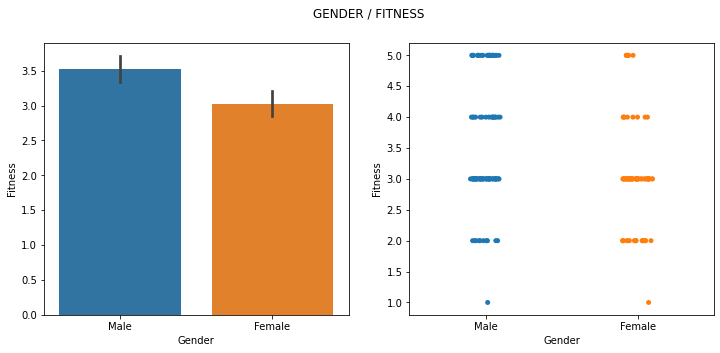

In [ ]:
categorical_numerical_plot(data=df, var1='Gender', var2='Fitness')

*Observations*
- Male customers consider themselves a little more fitness persons than the female ones

                         mean          sem       ci95_hi       ci95_lo
Gender / Income                                                       
Female           49828.907895  1440.465883  52652.221025  47005.594765
Male             56562.759615  1806.395105  60103.294021  53022.225210 



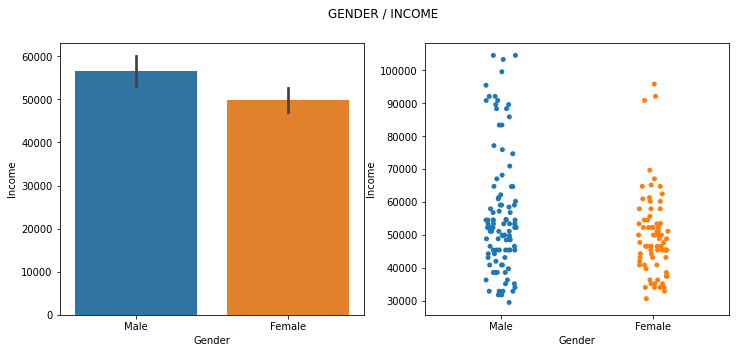

In [ ]:
categorical_numerical_plot(data=df, var1='Gender', var2='Income')

*Observations*
- Male customers have more income 

                      mean       sem     ci95_hi     ci95_lo
Gender / Miles                                              
Female           90.013158  5.136949  100.081578   79.944738
Male            112.826923  5.364017  123.340396  102.313451 



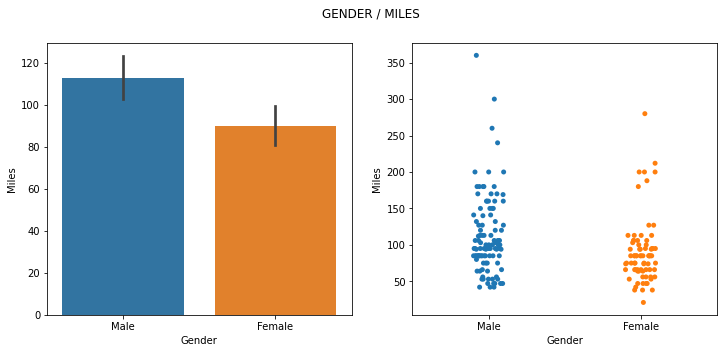

In [ ]:
categorical_numerical_plot(data=df, var1='Gender', var2='Miles')

*Observations*
- Male customers intent to run a little bit more than female customers

                                mean       sem    ci95_hi    ci95_lo
MaritalStatus / Education                                           
Partnered                  15.663551  0.147239  15.952140  15.374962
Single                     15.438356  0.204577  15.839327  15.037385 



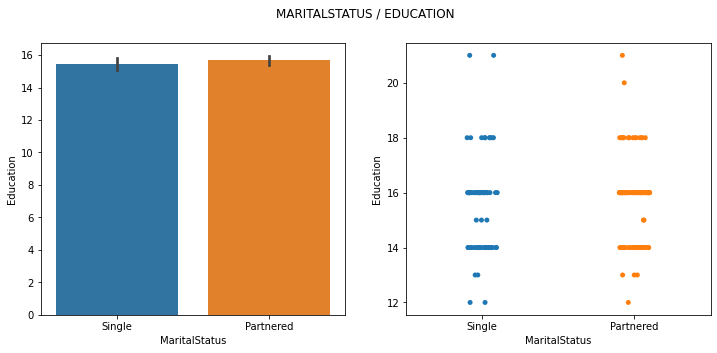

In [ ]:
categorical_numerical_plot(data=df, var1='MaritalStatus', var2='Education')

*Observations*
- These 2 variables are independent

                           mean       sem   ci95_hi   ci95_lo
MaritalStatus / Usage                                        
Partnered              3.448598  0.112076  3.668267  3.228929
Single                 3.465753  0.113881  3.688960  3.242547 



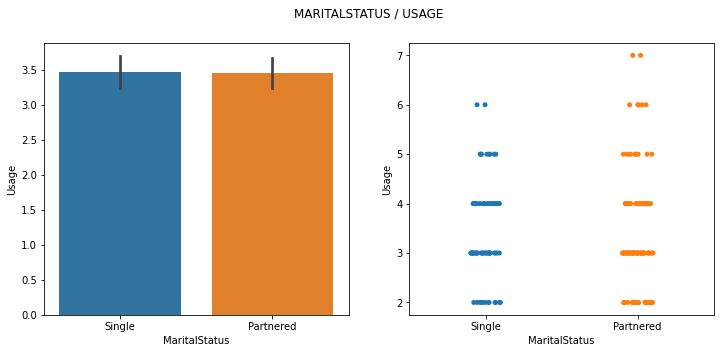

In [ ]:
categorical_numerical_plot(data=df, var1='MaritalStatus', var2='Usage')

*Observations*
- These 2 variables are independent

                             mean       sem   ci95_hi   ci95_lo
MaritalStatus / Fitness                                        
Partnered                3.271028  0.093493  3.454275  3.087781
Single                   3.369863  0.111218  3.587850  3.151876 



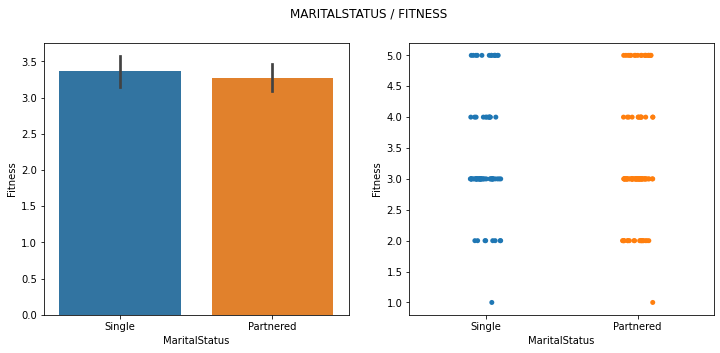

In [ ]:
categorical_numerical_plot(data=df, var1='MaritalStatus', var2='Fitness')

*Observations*
- These 2 variables are independent

                                mean          sem       ci95_hi       ci95_lo
MaritalStatus / Income                                                       
Partnered               55763.000000  1691.755753  59078.841276  52447.158724
Single                  50724.424658  1701.091223  54058.563454  47390.285861 



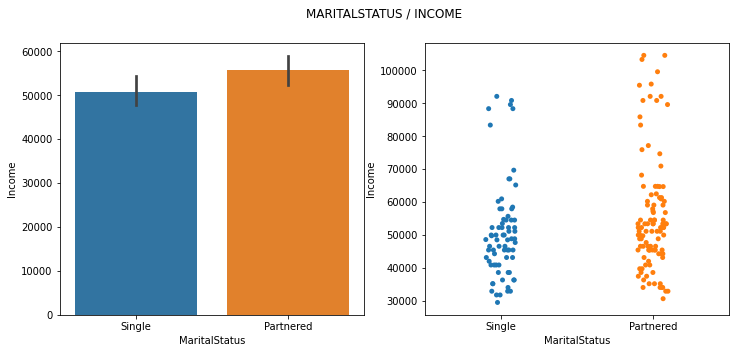

In [ ]:
categorical_numerical_plot(data=df, var1='MaritalStatus', var2='Income')

*Observations*
- Partnered customers have a little higher income than single ones

                             mean       sem     ci95_hi    ci95_lo
MaritalStatus / Miles                                             
Partnered              104.289720  5.726054  115.512785  93.066654
Single                 101.589041  4.559885  110.526417  92.651666 



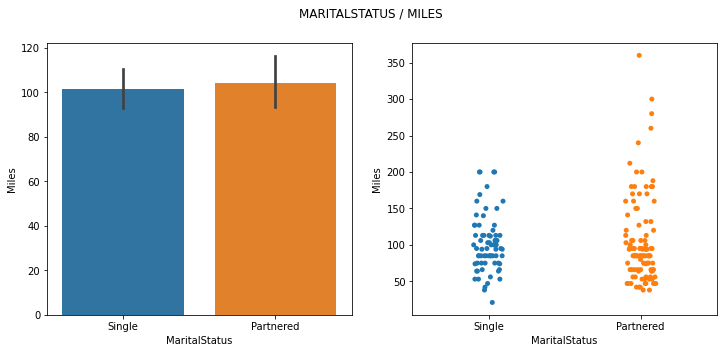

In [ ]:
categorical_numerical_plot(data=df, var1='MaritalStatus', var2='Miles')

*Observations*
- These 2 variables are independent

## Two categorical variables

categ vars: Age_bins, Product, Gender, MaritalStatus

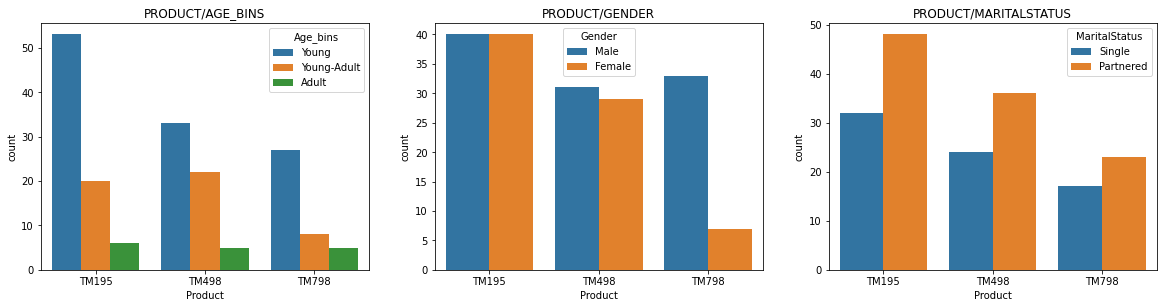

In [ ]:
two_categorical_plot(data=df, var1='Product', hue=['Age_bins', 'Gender', 'MaritalStatus'])

*Observations*
- Product / Age_bins 
  - TM195 model is preferred by young people
  - Young-Adults buy TM195 and TM498 models the same
  - Adults buy the same the 3 models
- Product / Gender 
  - TM195 and TM498 are equally preferred by men and women
  - TM798 is clearly preferred by males
- Prodcut / MaritalStatus 
  - Partnered customers buy more of every models than single ones

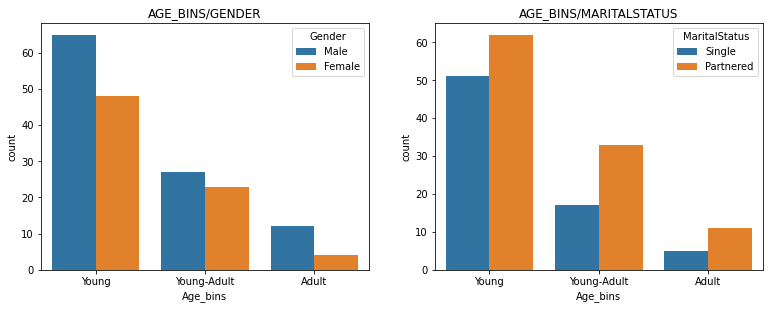

In [ ]:
two_categorical_plot(data=df, var1='Age_bins', hue=['Gender', 'MaritalStatus'])

*Observations*
- Age_bins / Gender
  - Male customers number is greater than female one in every age range
- Age_bins / MaritalStatus
  - Partnered customers number is greater than single one in every range of age

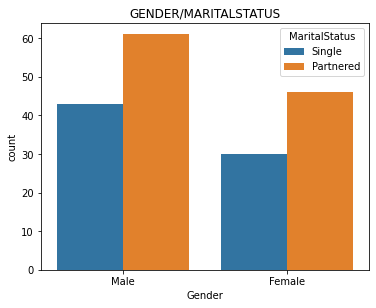

In [ ]:
two_categorical_plot(data=df, var1='Gender', hue=['MaritalStatus'])

*Observations*
- Gender / MaritalStatus
  - Partnered customers number is greater than single one independent of the gender

#Multivariate Analysis

In [ ]:
#define hue lists for every categorical variable to analyze
hues_4_Age_bins = ['Product', 'Gender', 'MaritalStatus']
hues_4_Product = ['Gender', 'MaritalStatus']
hues_4_Gender = ['MaritalStatus']

                           mean       sem    ci95_hi    ci95_lo
Age_bins / Education                                           
Young                 15.371681  0.158111  15.681579  15.061783
Young-Adult           15.660000  0.199202  16.050437  15.269563
Adult                 16.687500  0.350223  17.373937  16.001063 



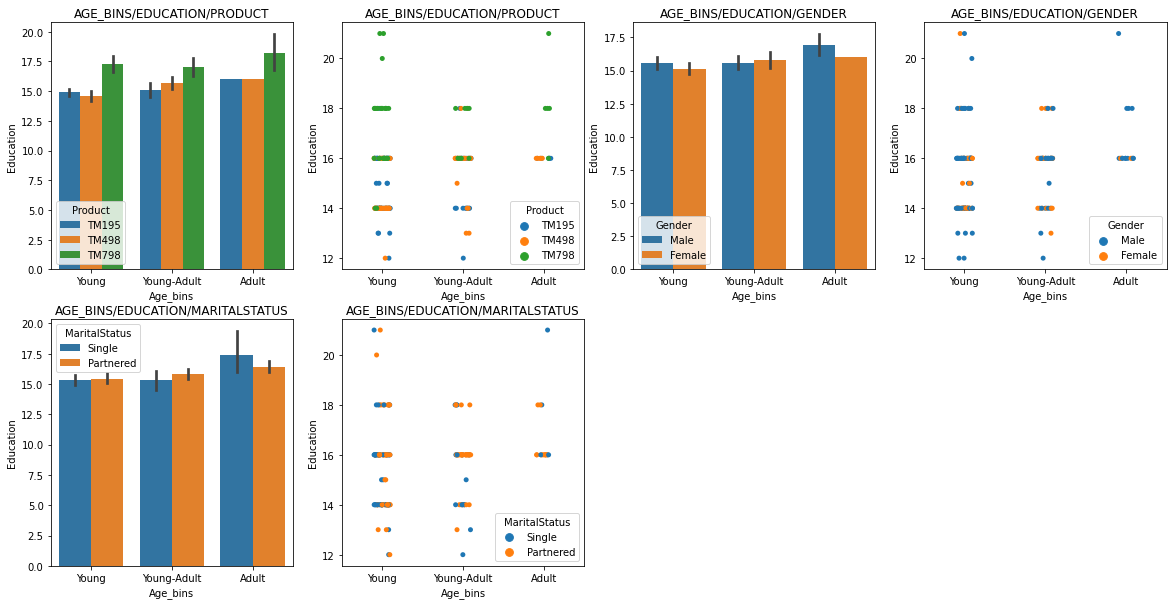

In [ ]:

multi_variate_plot(data=df, var1='Age_bins', var2='Education', hue=hues_4_Age_bins)

*Observations*
- Young, young-adults and adults prefer TM798 model as the years of education increases
- Male adults are the ones with a higher years of education
- Single male adults have the most years of education

                      mean       sem   ci95_hi   ci95_lo
Age_bins / Usage                                        
Young             3.477876  0.104495  3.682687  3.273065
Young-Adult       3.380000  0.148159  3.670391  3.089609
Adult             3.562500  0.273385  4.098335  3.026665 



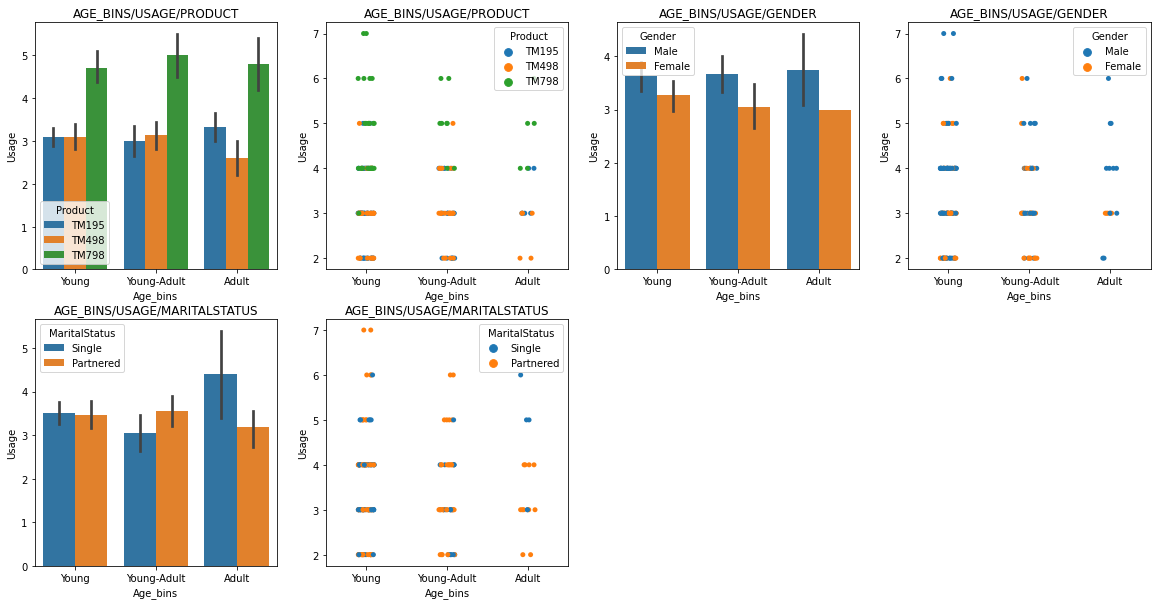

In [ ]:
multi_variate_plot(data=df, var1='Age_bins', var2='Usage', hue=hues_4_Age_bins)

*Observations*
- Young, young-adults and adults who intend to use the tredmill more than 3.5 times per week use TM798 model
- Gender has nothing to do on how the customers of different range of age will use the tredmills
- Single adults intend to use the tredmill significantly more than everyone else 

                        mean       sem   ci95_hi   ci95_lo
Age_bins / Fitness                                        
Young               3.300885  0.089673  3.476644  3.125126
Young-Adult         3.280000  0.137143  3.548800  3.011200
Adult               3.500000  0.258199  4.006070  2.993930 



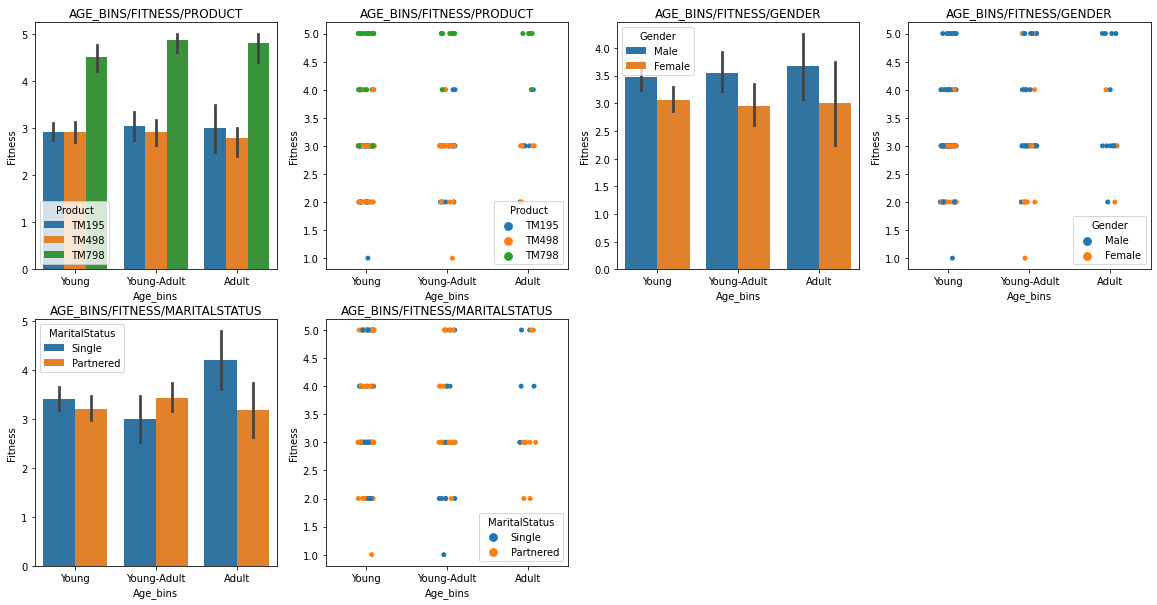

In [ ]:
multi_variate_plot(data=df, var1='Age_bins', var2='Fitness', hue=hues_4_Age_bins)

*Observations*
- Independently of the range of age, the customers who see themselves more as a fitness persons will use the TM798 model
- Gender is independent as how the customers of different ranges of age see themselves as a fitness persons
- Single adults are the group who sees themselves as more fitness persons

                           mean          sem       ci95_hi       ci95_lo
Age_bins / Income                                                       
Young              48532.026549  1291.561893  51063.487860  46000.565238
Young-Adult        60305.920000  2398.221974  65006.435069  55605.404931
Adult              69081.250000  4311.172319  77531.147745  60631.352255 



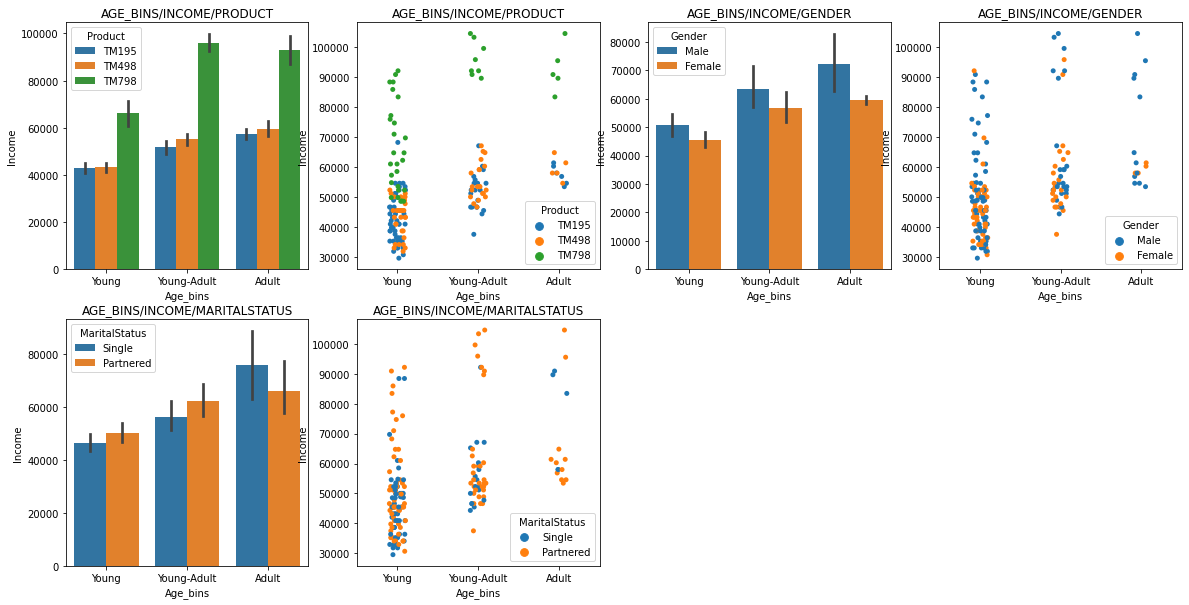

In [ ]:
multi_variate_plot(data=df, var1='Age_bins', var2='Income', hue=hues_4_Age_bins)

*Observations*
- Every one with income higher than 70,000 will buy TM798 model
- Males have a higher income in all group of ages
- Single adults have the higher income

                        mean        sem     ci95_hi    ci95_lo
Age_bins / Miles                                              
Young             101.743363   4.421456  110.409416  93.077310
Young-Adult       106.600000   8.827092  123.901100  89.298900
Adult             105.125000  13.055291  130.713371  79.536629 



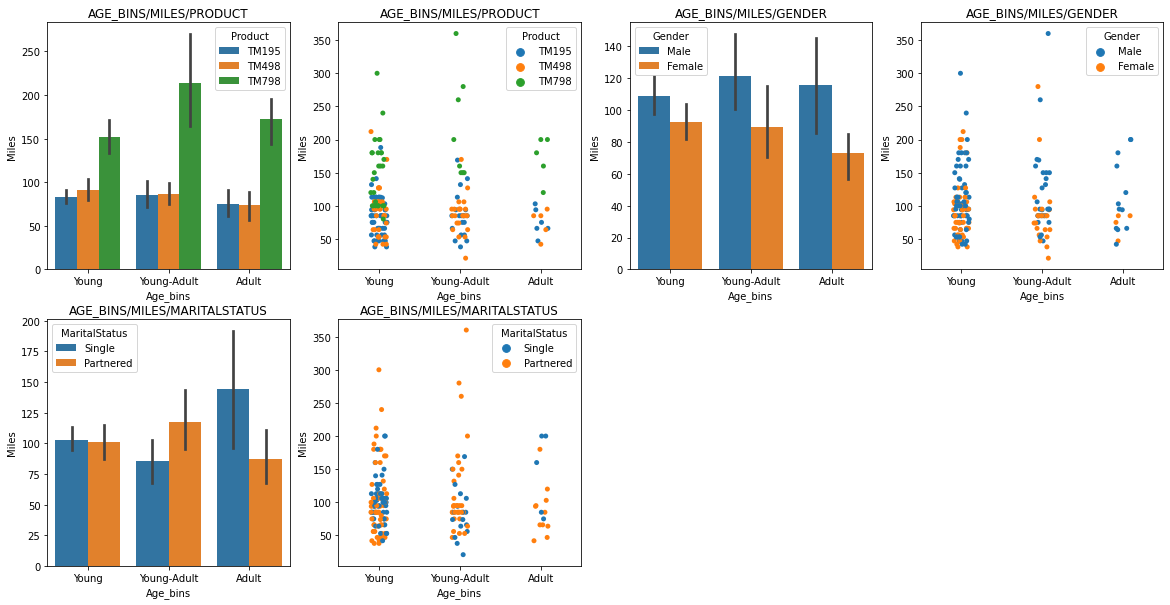

In [ ]:
multi_variate_plot(data=df, var1='Age_bins', var2='Miles', hue=hues_4_Age_bins)

*Observations*
- TM798 model is prefered by all the customers who intend to run more than 100 miles on average, independent of their age
- Male customers intend to run more miles than female ones independent of their age
- Single adults are the ones who intend to run more miles

                          mean       sem    ci95_hi    ci95_lo
Product / Education                                           
TM195                15.037500  0.135996  15.304052  14.770948
TM498                15.116667  0.157831  15.426015  14.807318
TM798                17.325000  0.259159  17.832952  16.817048 



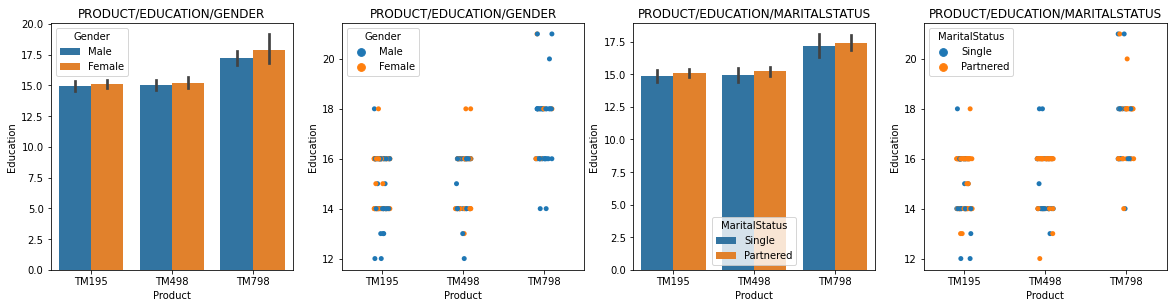

In [ ]:
multi_variate_plot(data=df, var1='Product', var2='Education', hue=hues_4_Product)

*Observations*
- Customers with more than 15 years of education use TM798 model and are adults and from those female customers have the most years of education
- MaritalStatus is independent to the Product-Education relationship

                     mean       sem   ci95_hi   ci95_lo
Product / Usage                                        
TM195            3.087500  0.087500  3.259000  2.916000
TM498            3.066667  0.103243  3.269023  2.864310
TM798            4.775000  0.149733  5.068476  4.481524 



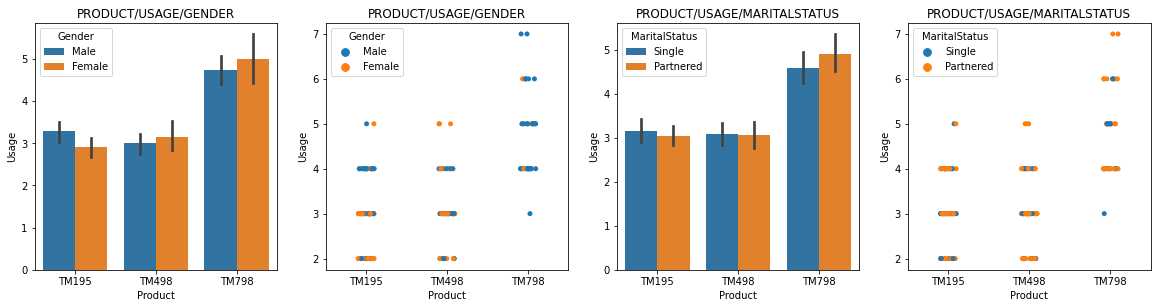

In [ ]:
multi_variate_plot(data=df, var1='Product', var2='Usage', hue=hues_4_Product)

*Observations*
- Customers who will use the tredmill more than 5 times per week use the TM798 model, and there are slightly more female customers than males
- On average TM798 model will be used more times per week than the other models independent of the marital status

                     mean       sem   ci95_hi   ci95_lo
Product / Fitness                                      
TM195              2.9625  0.074298  3.108124  2.816876
TM498              2.9000  0.081303  3.059354  2.740646
TM798              4.6250  0.105536  4.831850  4.418150 



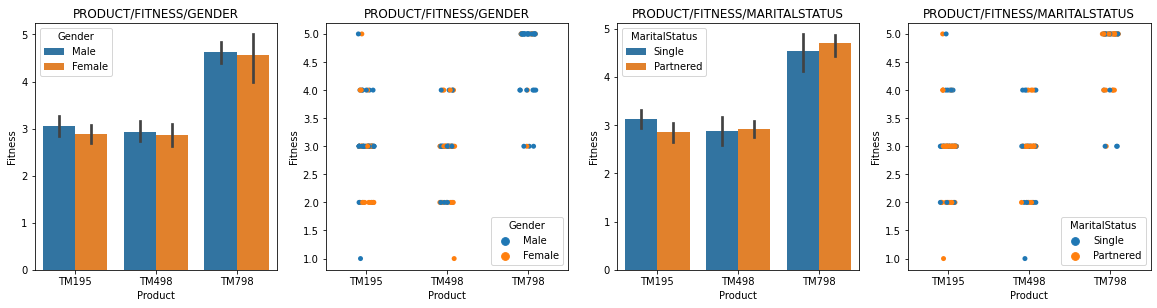

In [ ]:
multi_variate_plot(data=df, var1='Product', var2='Fitness', hue=hues_4_Product)

*Observations*
- Gender and marital status are independent to the relation Product-Fitness

                       mean          sem       ci95_hi       ci95_lo
Product / Income                                                    
TM195             46418.025  1014.703408  48406.843680  44429.206320
TM498             48973.650  1117.225226  51163.411443  46783.888557
TM798             75441.575  2926.029702  81176.593216  69706.556784 



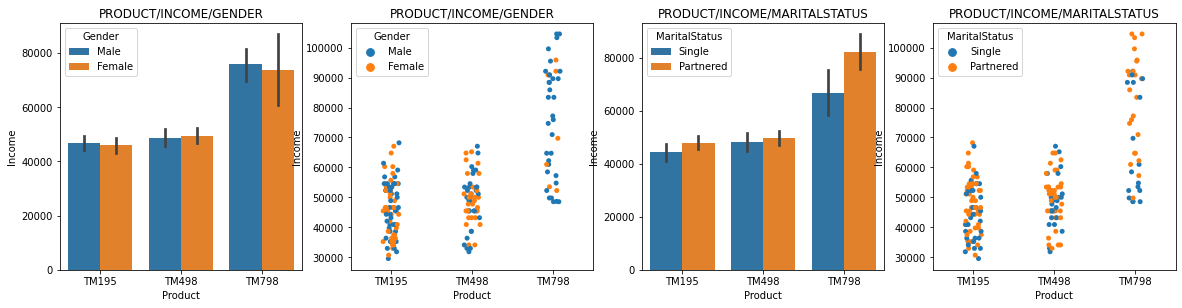

In [ ]:
multi_variate_plot(data=df, var1='Product', var2='Income', hue=hues_4_Product)

*Observations*
- Gender is independent to the reltion Product-Income
- Partnered customers with high income prefer the most TM798 model

                       mean       sem     ci95_hi     ci95_lo
Product / Miles                                              
TM195             82.787500  3.228223   89.114817   76.460183
TM498             87.933333  4.294252   96.350068   79.516599
TM798            166.900000  9.497355  185.514815  148.285185 



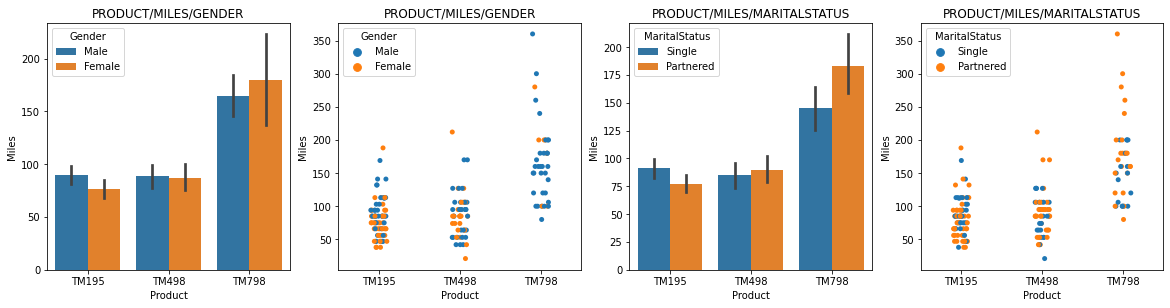

In [ ]:
multi_variate_plot(data=df, var1='Product', var2='Miles', hue=hues_4_Product)

*Observations*
- Gender is independent to the relation Product-Miles
- Partnered customers who use TM798 model intend to run more miles than single ones

                         mean       sem    ci95_hi    ci95_lo
Gender / Education                                           
Female              15.394737  0.165518  15.719152  15.070322
Male                15.701923  0.169500  16.034144  15.369702 



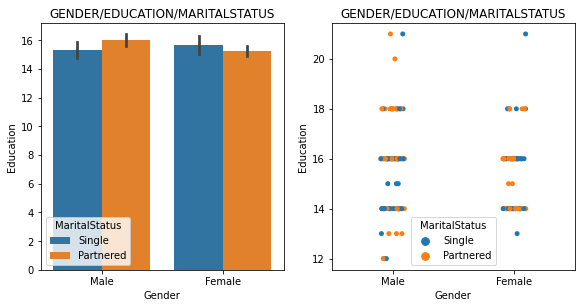

In [ ]:
multi_variate_plot(data=df, var1='Gender', var2='Education', hue=hues_4_Gender)

*Observations*
- Marital status is independent to the relation Gender-Education

                    mean       sem   ci95_hi   ci95_lo
Gender / Usage                                        
Female          3.184211  0.116545  3.412638  2.955783
Male            3.653846  0.107390  3.864332  3.443361 



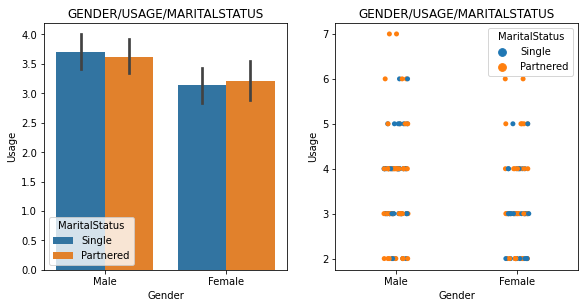

In [ ]:
multi_variate_plot(data=df, var1='Gender', var2='Usage', hue=hues_4_Gender)

*Observations*
- Marital status is independent to the relation Gender-Usage

                      mean       sem   ci95_hi   ci95_lo
Gender / Fitness                                        
Female            3.026316  0.095465  3.213427  2.839204
Male              3.519231  0.097562  3.710453  3.328008 



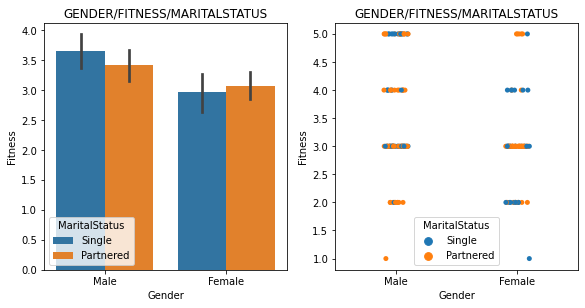

In [ ]:
multi_variate_plot(data=df, var1='Gender', var2='Fitness', hue=hues_4_Gender)

*Observations*
- Marital status is independent to the relation Gender-Fitness

                         mean          sem       ci95_hi       ci95_lo
Gender / Income                                                       
Female           49828.907895  1440.465883  52652.221025  47005.594765
Male             56562.759615  1806.395105  60103.294021  53022.225210 



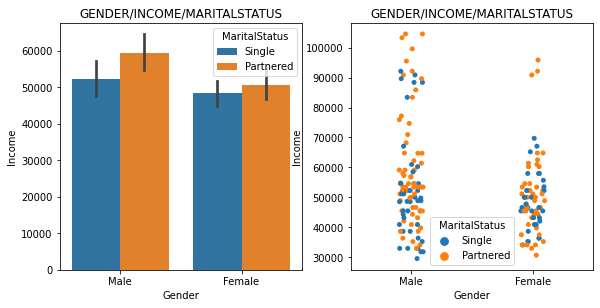

In [ ]:
multi_variate_plot(data=df, var1='Gender', var2='Income', hue=hues_4_Gender)

*Observations*
- Male partnered customers have more income than single ones

                      mean       sem     ci95_hi     ci95_lo
Gender / Miles                                              
Female           90.013158  5.136949  100.081578   79.944738
Male            112.826923  5.364017  123.340396  102.313451 



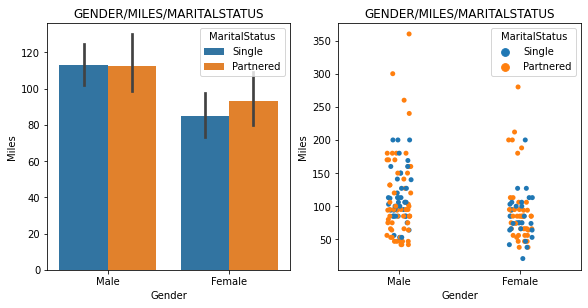

In [ ]:
multi_variate_plot(data=df, var1='Gender', var2='Miles', hue=hues_4_Gender)

*Observations*
- Female partnered customers intend to run more than single ones

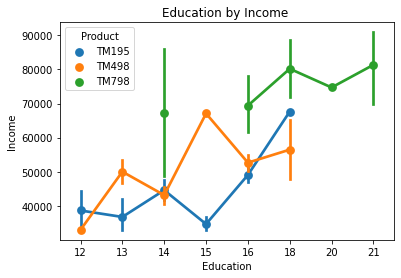

In [ ]:
sns.pointplot(data=df, x='Education',y='Income',hue='Product').set(title='Education by Income ');

*Observations*
- TM798 customers have more years of education and have higher income

#Detailed Analysis by Product Model

##Model TM195

###Data Overview

In [ ]:
df195 = df[df.Product == 'TM195']

In [ ]:
df195.shape

(80, 10)

In [ ]:
df195.describe(include='all').T

count unique        top freq       mean         std      min  \
Product          80      1      TM195   80        NaN         NaN      NaN   
Age            80.0    NaN        NaN  NaN      28.55    7.221452     18.0   
Gender           80      2       Male   40        NaN         NaN      NaN   
Education      80.0    NaN        NaN  NaN    15.0375    1.216383     12.0   
MaritalStatus    80      2  Partnered   48        NaN         NaN      NaN   
Usage          80.0    NaN        NaN  NaN     3.0875    0.782624      2.0   
Fitness        80.0    NaN        NaN  NaN     2.9625     0.66454      1.0   
Income         80.0    NaN        NaN  NaN  46418.025  9075.78319  29562.0   
Miles          80.0    NaN        NaN  NaN    82.7875   28.874102     38.0   
Age_bins         79      3      Young   53        NaN         NaN      NaN   

                   25%      50%      75%      max  
Product            NaN      NaN      NaN      NaN  
Age               23.0     26.0     33.0     50.0  
Gender             NaN      NaN      NaN      NaN  
Education         14.0     16.0     16.0     18.0  
MaritalStatus      NaN      NaN      NaN      NaN  
Usage              3.0      3.0      4.0      5.0  
Fitness            3.0      3.0      3.0      5.0  
Income         38658.0  46617.0  53439.0  68220.0  
Miles             66.0     85.0     94.0    188.0  
Age_bins           NaN      NaN      NaN      NaN

###Univariate analysis

In [ ]:
df195.Age_bins.value_counts(normalize=True)

Young          0.670886
Young-Adult    0.253165
Adult          0.075949
Name: Age_bins, dtype: float64

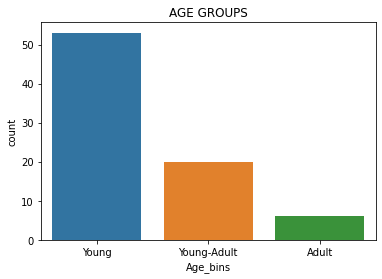

In [ ]:
sns.countplot(data=df195, x='Age_bins').set_title('AGE GROUPS');

In [ ]:
df195.Gender.value_counts(normalize=True)

Male      0.5
Female    0.5
Name: Gender, dtype: float64

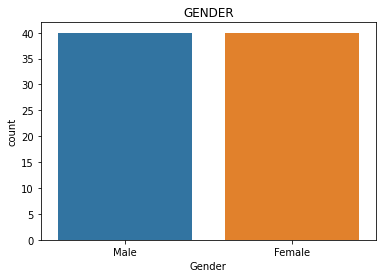

In [ ]:
sns.countplot(data=df195, x='Gender').set_title('GENDER');

In [ ]:
df195.MaritalStatus.value_counts(normalize=True)

Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64

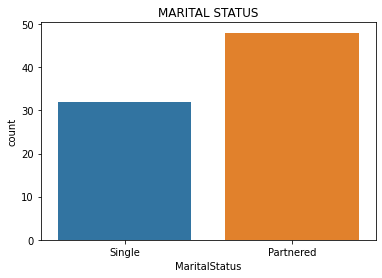

In [ ]:
sns.countplot(data=df195, x='MaritalStatus').set_title('MARITAL STATUS');

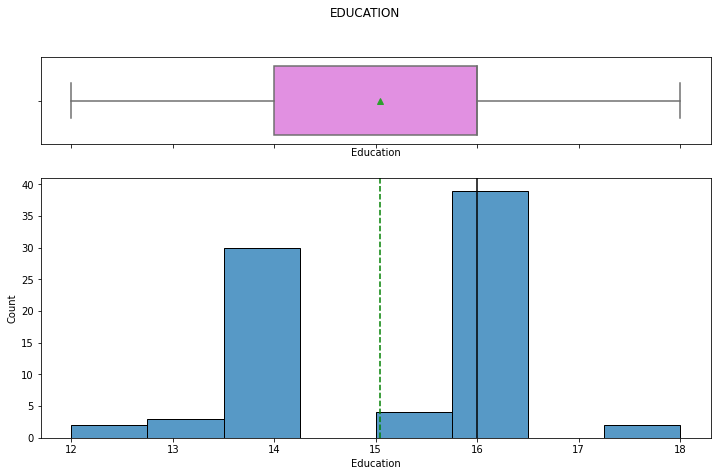

In [ ]:
histogram_boxplot(data=df195, feature='Education')

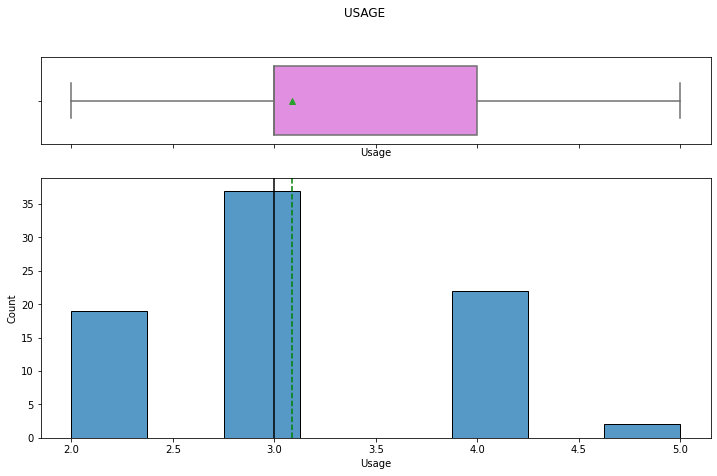

In [ ]:
histogram_boxplot(data=df195, feature='Usage')

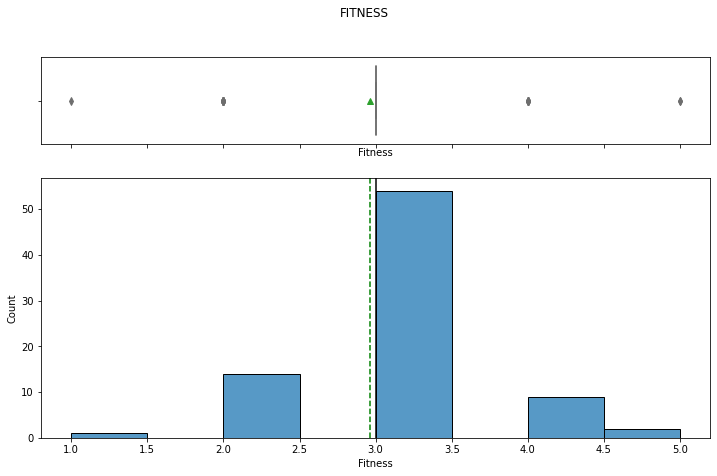

In [ ]:
histogram_boxplot(data=df195, feature='Fitness')

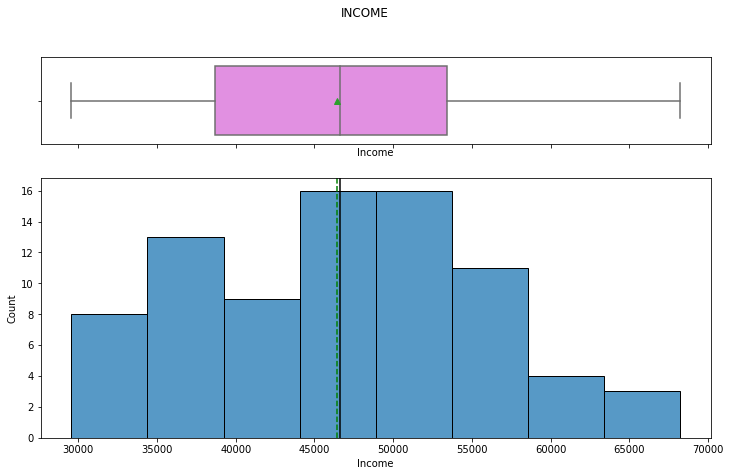

In [ ]:
histogram_boxplot(data=df195, feature='Income')

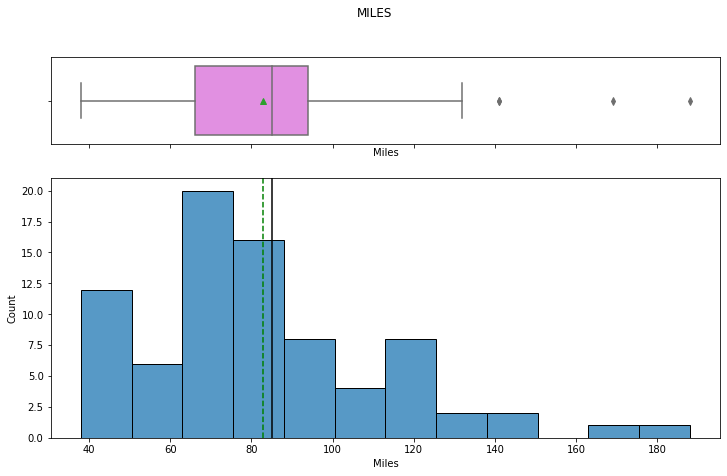

In [ ]:
histogram_boxplot(data=df195, feature='Miles')

###Bivariate analysis

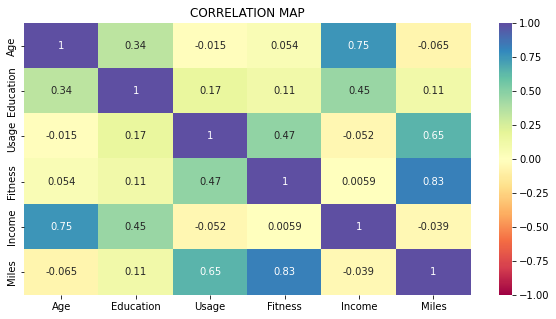

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df195.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1).set_title('CORRELATION MAP')
plt.show()

                      mean          sem       ci95_hi       ci95_lo
Age / Income                                                       
18            29562.000000          NaN           NaN           NaN
19            31836.000000   656.447256  33122.636622  30549.363378
20            34110.000000  1137.000000  36338.520000  31881.480000
21            35247.000000   928.356613  37066.578961  33427.421039
22            35815.500000   328.223628  36458.818311  35172.181689
23            38231.625000   959.437743  40112.122977  36351.127023
24            44115.600000   909.600000  45898.416000  42332.784000
25            44667.857143  1884.918079  48362.296577  40973.417709
26            47429.142857  2297.086886  51931.433154  42926.852560
27            48512.000000  3032.000000  54454.720000  42569.280000
28            51923.000000  1198.503233  54272.066337  49573.933663
29            54955.000000  6705.194479  68097.181179  41812.818821
30            50596.500000  3979.500000  58396.3

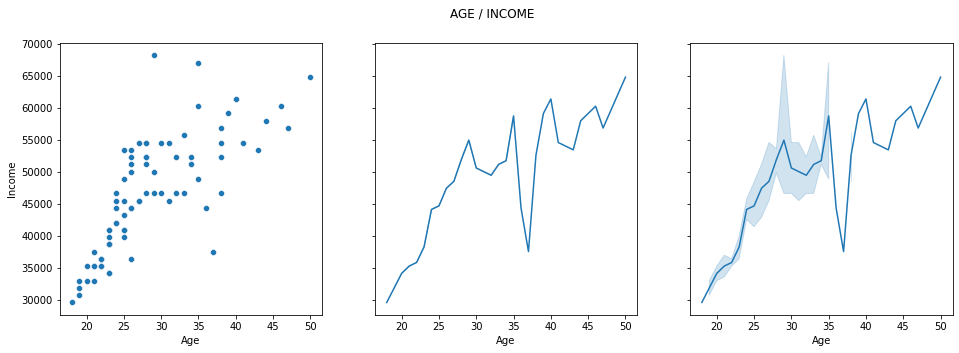

In [ ]:
two_numerical_plot(data=df195, var1='Age', var2='Income')

                     mean        sem     ci95_hi     ci95_lo
Usage / Miles                                               
2               59.842105   4.823349   69.295870   50.388341
3               79.621622   2.860194   85.227601   74.015642
4              100.500000   5.750118  111.770231   89.229769
5              164.500000  23.500000  210.560000  118.440000 



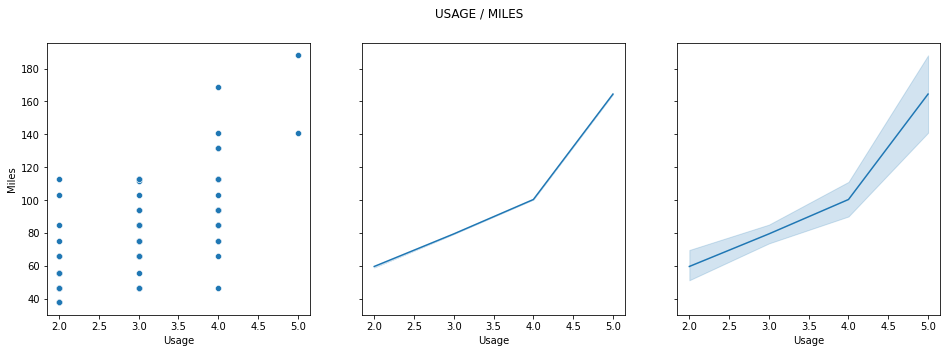

In [ ]:
two_numerical_plot(data=df195, var1='Usage', var2='Miles')

                       mean       sem     ci95_hi     ci95_lo
Fitness / Miles                                              
1                 47.000000       NaN         NaN         NaN
2                 49.142857  2.632963   54.303465   43.982249
3                 82.574074  2.187507   86.861588   78.286561
4                119.111111  6.870720  132.577722  105.644500
5                178.500000  9.500000  197.120000  159.880000 



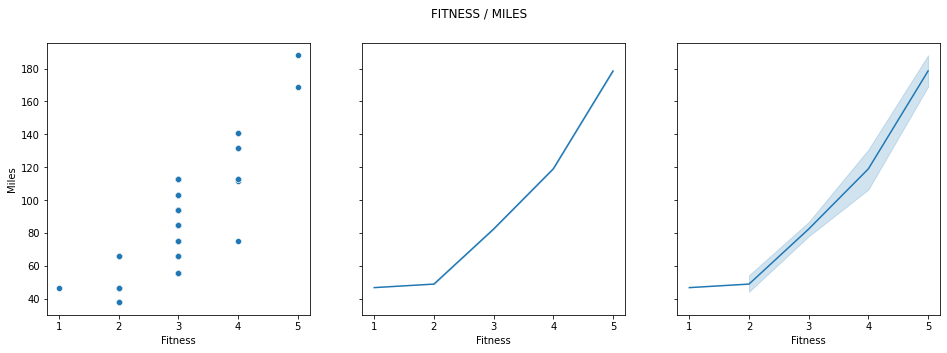

In [ ]:
two_numerical_plot(data=df195, var1='Fitness', var2='Miles')

In [ ]:
df195.groupby(['Age_bins','Gender']).count().MaritalStatus

Age_bins     Gender
Young        Female    28
             Male      25
Young-Adult  Female     9
             Male      11
Adult        Female     2
             Male       4
Name: MaritalStatus, dtype: int64

In [ ]:
df195.groupby(['Age_bins','MaritalStatus']).Gender.count()

Age_bins     MaritalStatus
Young        Partnered        31
             Single           22
Young-Adult  Partnered        11
             Single            9
Adult        Partnered         5
             Single            1
Name: Gender, dtype: int64

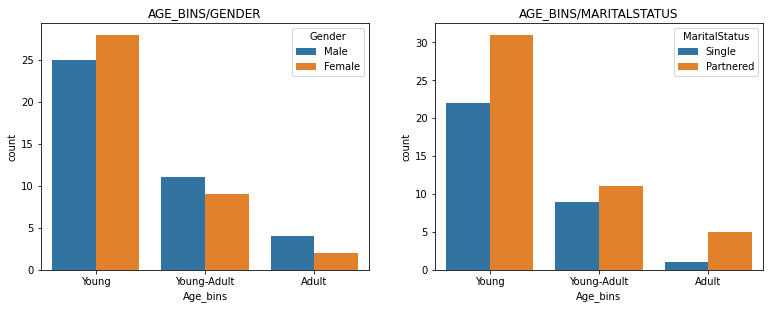

In [ ]:
two_categorical_plot(data=df195, var1='Age_bins', hue=['Gender', 'MaritalStatus'])

In [ ]:
df195.groupby(['Gender','MaritalStatus']).Product.count()

Gender  MaritalStatus
Female  Partnered        27
        Single           13
Male    Partnered        21
        Single           19
Name: Product, dtype: int64

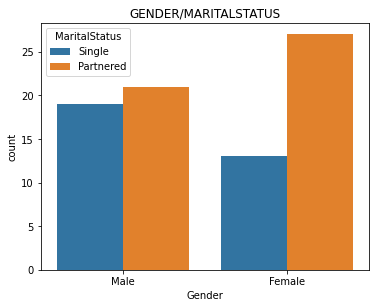

In [ ]:
two_categorical_plot(data=df195, var1='Gender', hue=['MaritalStatus'])

In [ ]:
df195.groupby(['Age_bins','Gender']).Income.mean()

Age_bins     Gender
Young        Female    42556.285714
             Male      43160.520000
Young-Adult  Female    51796.666667
             Male      51578.454545
Adult        Female    59124.000000
             Male      56565.750000
Name: Income, dtype: float64

                      mean          sem       ci95_hi       ci95_lo
Gender / Income                                                    
Female           46020.075  1458.792632  48879.308559  43160.841441
Male             46815.975  1426.567916  49612.048116  44019.901884 



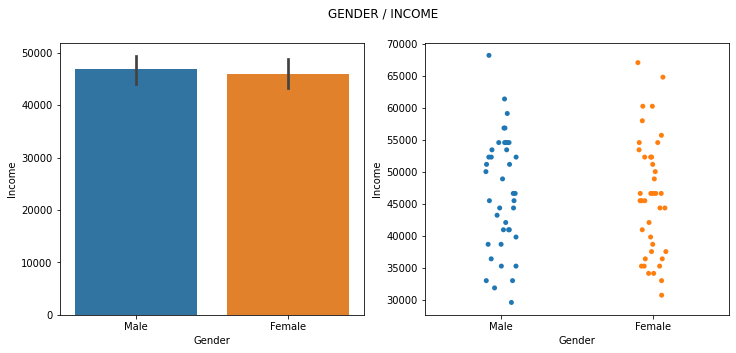

In [ ]:
categorical_numerical_plot(data=df195, var1='Gender', var2='Income')

                              mean          sem       ci95_hi       ci95_lo
MaritalStatus / Income                                                     
Partnered               47848.7500  1271.129513  50340.163845  45357.336155
Single                  44271.9375  1624.039064  47455.054066  41088.820934 



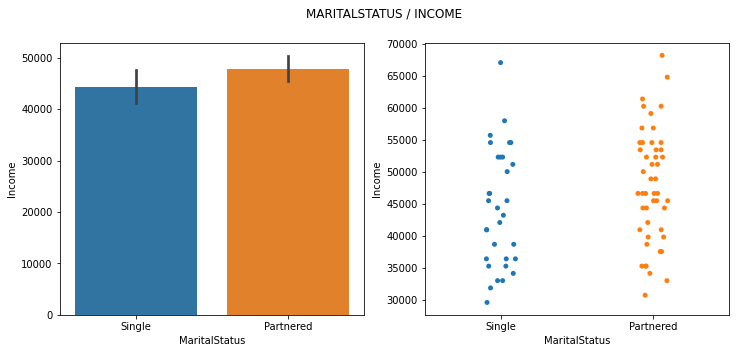

In [ ]:
categorical_numerical_plot(data=df195, var1='MaritalStatus', var2='Income')

                   mean       sem   ci95_hi   ci95_lo
Gender / Fitness                                     
Female            2.875  0.102454  3.075810  2.674190
Male              3.050  0.107118  3.259952  2.840048 



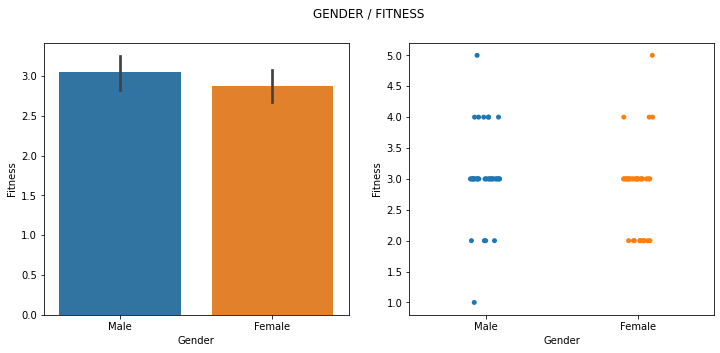

In [ ]:
categorical_numerical_plot(data=df195, var1='Gender', var2='Fitness')

                             mean       sem   ci95_hi   ci95_lo
MaritalStatus / Fitness                                        
Partnered                2.854167  0.098704  3.047627  2.660706
Single                   3.125000  0.107670  3.336032  2.913968 



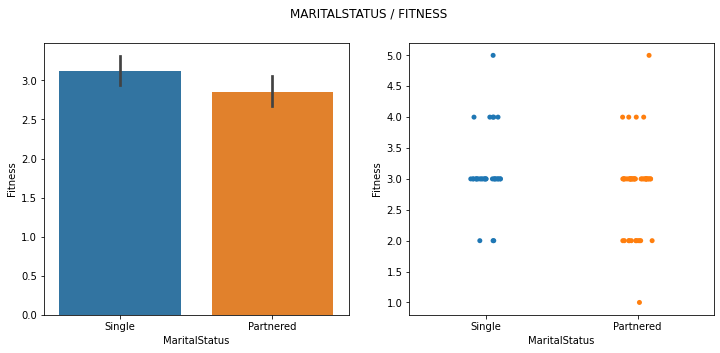

In [ ]:
categorical_numerical_plot(data=df195, var1='MaritalStatus', var2='Fitness')

                 mean       sem   ci95_hi   ci95_lo
Gender / Usage                                     
Female          2.900  0.122997  3.141074  2.658926
Male            3.275  0.118687  3.507626  3.042374 



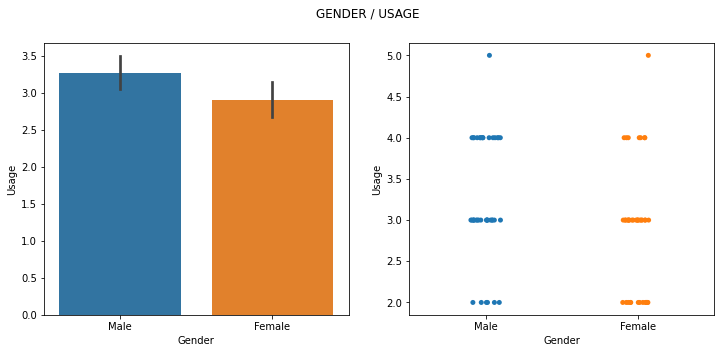

In [ ]:
categorical_numerical_plot(data=df195, var1='Gender', var2='Usage')

                           mean       sem   ci95_hi   ci95_lo
MaritalStatus / Usage                                        
Partnered              3.041667  0.111240  3.259698  2.823636
Single                 3.156250  0.142765  3.436069  2.876431 



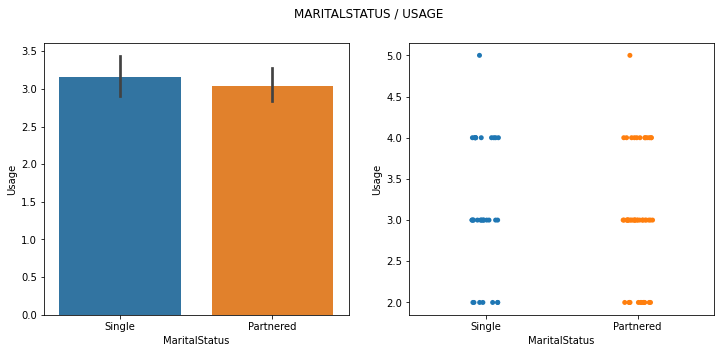

In [ ]:
categorical_numerical_plot(data=df195, var1='MaritalStatus', var2='Usage')

###Multivariate analysis

                      mean          sem       ci95_hi       ci95_lo
Gender / Income                                                    
Female           46020.075  1458.792632  48879.308559  43160.841441
Male             46815.975  1426.567916  49612.048116  44019.901884 



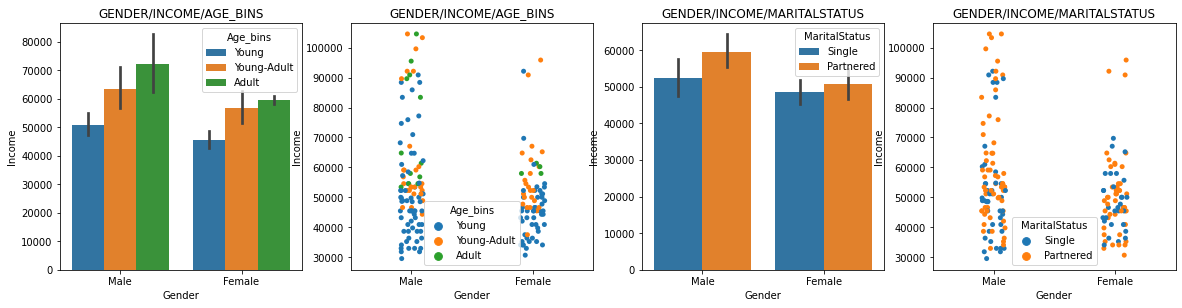

In [ ]:
multi_variate_plot(data=df195, var1='Gender', var2='Income', hue=['Age_bins', 'MaritalStatus'])

                      mean      sem    ci95_hi    ci95_lo
Gender / Education                                       
Female              15.100  0.17097  15.435101  14.764899
Male                14.975  0.21330  15.393068  14.556932 



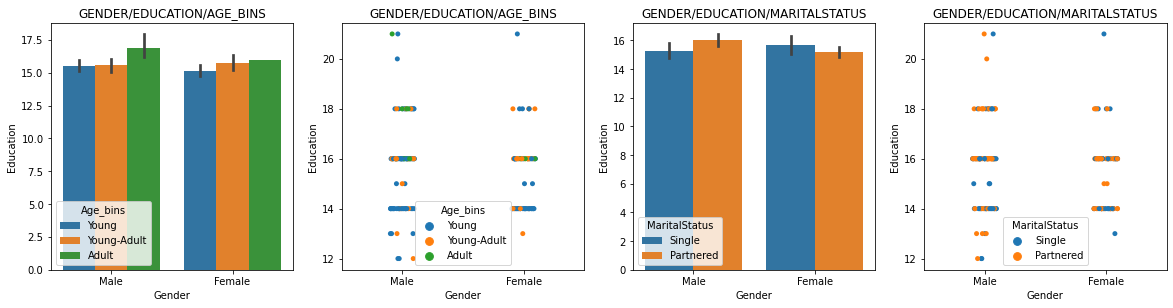

In [ ]:
multi_variate_plot(data=df195, var1='Gender', var2='Education', hue=['Age_bins', 'MaritalStatus'])

                  mean       sem    ci95_hi    ci95_lo
Gender / Miles                                        
Female          76.200  4.425335  84.873657  67.526343
Male            89.375  4.517869  98.230023  80.519977 



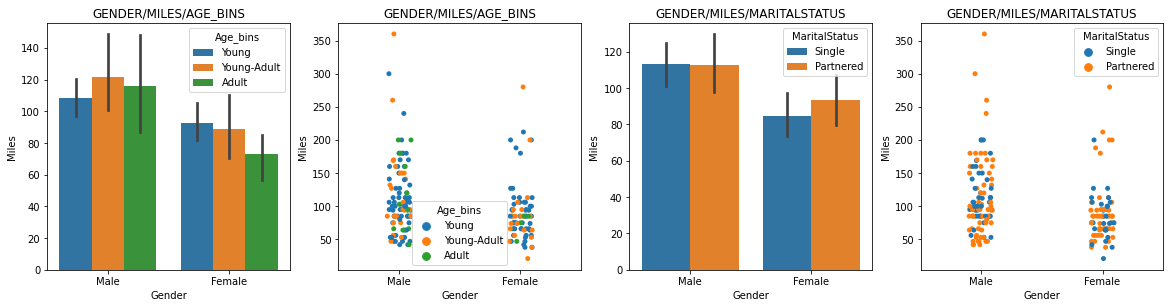

In [ ]:
multi_variate_plot(data=df195, var1='Gender', var2='Miles', hue=['Age_bins', 'MaritalStatus'])

                   mean       sem   ci95_hi   ci95_lo
Gender / Fitness                                     
Female            2.875  0.102454  3.075810  2.674190
Male              3.050  0.107118  3.259952  2.840048 



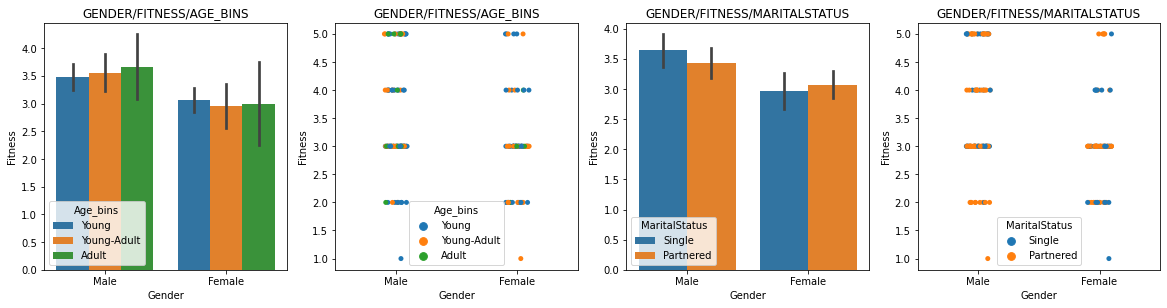

In [ ]:
multi_variate_plot(data=df195, var1='Gender', var2='Fitness', hue=['Age_bins', 'MaritalStatus'])

                 mean       sem   ci95_hi   ci95_lo
Gender / Usage                                     
Female          2.900  0.122997  3.141074  2.658926
Male            3.275  0.118687  3.507626  3.042374 



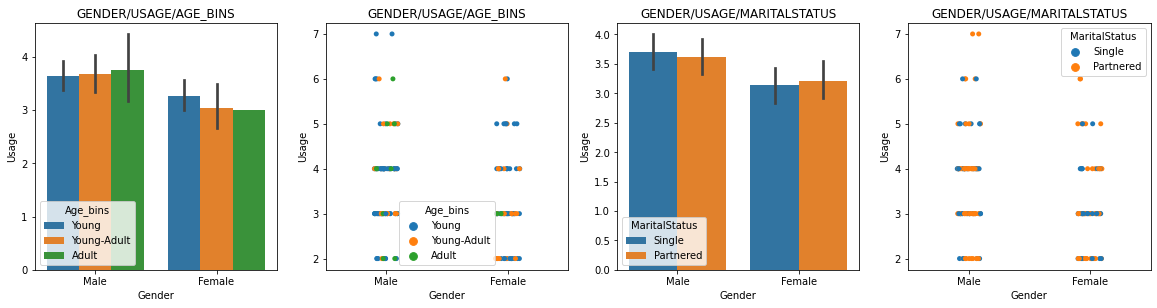

In [ ]:
multi_variate_plot(data=df195, var1='Gender', var2='Usage', hue=['Age_bins', 'MaritalStatus'])

                       mean       sem     ci95_hi    ci95_lo
Age_bins / Miles                                            
Young             82.886792  3.917663   90.565412  75.208173
Young-Adult       85.650000  7.376804  100.108536  71.191464
Adult             75.166667  8.348320   91.529374  58.803960 



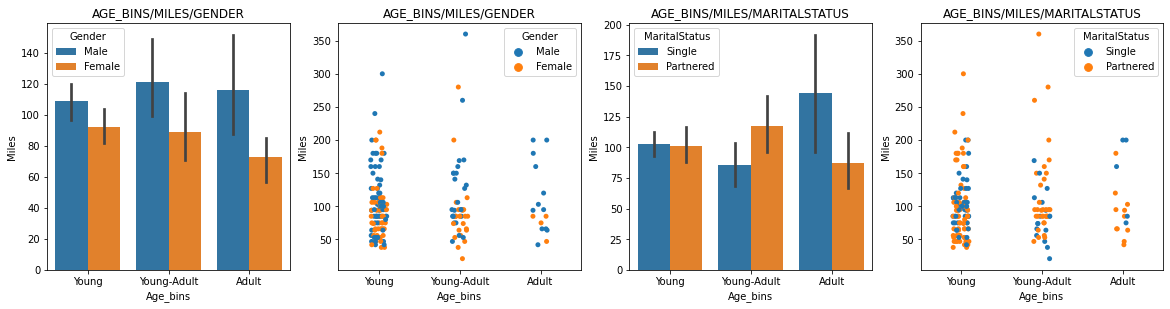

In [ ]:
multi_variate_plot(data=df195, var1='Age_bins', var2='Miles', hue=['Gender', 'MaritalStatus'])

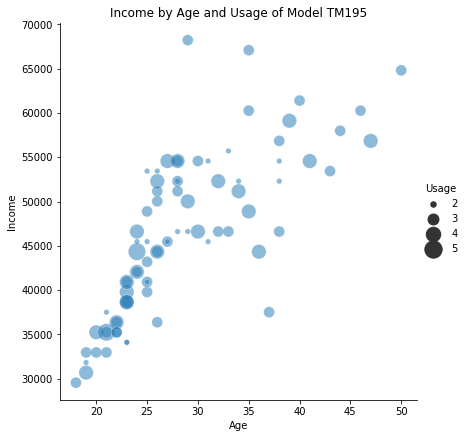

In [ ]:
sns.relplot(data=df195, x="Age", y="Income", size="Usage", sizes=(30, 300), alpha=0.5, palette="dark", height=6).set(title='Income by Age and Usage of Model TM195');

###Observations

*Observations*
- This is the most popular model, 44% of customers bought this model
- 67% of customers are Young, 25% Young-Adult and only 7% Adults
  - that 67% of Young customers are composed of:
    * 28 female (53%) and 25 male (47%) customers 
    * 31 Partnered (58%) and 22 Single (42%) customers
- Maximum income of customers is 68,000 USD/Year, average income of customers is 46,000 USD/Year
  - The difference between male and female customers is minimal (less than 1,000 USD/year)
  - The difference between Partnered and Single customers is also small 48,000 USD/year for Partnered and 44,000 USD/year for Single customers
- 50% of customers are male and 50% female
  - 67% of female customers are Partnered and only 33% Single
  - males are almost equaly divided by Partnered or Single customers
- 60% of this model customers are Partnered and 40% Single
- Years of education varies from 12 to 18 years, with a mean of 15 and a media of 16, gender and marital status have no significative difference
- Customers see themselves as a regular fitness person, mean of 3 on a scale from 1 to 5, there is no significaative difference due to gender or marital status
- Customers intend to use the tredmill 3 times per week on average, there is no significative difference between male and female cutomers nor between partnered or single ones


##Model TM498

###Data Overview

In [ ]:
df498 = df[df.Product == 'TM498']

In [ ]:
df498.shape

(60, 10)

In [ ]:
df498.describe(include='all').T

count unique        top freq       mean          std      min  \
Product          60      1      TM498   60        NaN          NaN      NaN   
Age            60.0    NaN        NaN  NaN       28.9     6.645248     19.0   
Gender           60      2       Male   31        NaN          NaN      NaN   
Education      60.0    NaN        NaN  NaN  15.116667     1.222552     12.0   
MaritalStatus    60      2  Partnered   36        NaN          NaN      NaN   
Usage          60.0    NaN        NaN  NaN   3.066667     0.799717      2.0   
Fitness        60.0    NaN        NaN  NaN        2.9      0.62977      1.0   
Income         60.0    NaN        NaN  NaN   48973.65  8653.989388  31836.0   
Miles          60.0    NaN        NaN  NaN  87.933333    33.263135     21.0   
Age_bins         60      3      Young   33        NaN          NaN      NaN   

                   25%      50%      75%      max  
Product            NaN      NaN      NaN      NaN  
Age               24.0     26.0    33.25     48.0  
Gender             NaN      NaN      NaN      NaN  
Education         14.0     16.0     16.0     18.0  
MaritalStatus      NaN      NaN      NaN      NaN  
Usage              3.0      3.0     3.25      5.0  
Fitness            3.0      3.0      3.0      4.0  
Income         44911.5  49459.5  53439.0  67083.0  
Miles             64.0     85.0    106.0    212.0  
Age_bins           NaN      NaN      NaN      NaN

###Univariate analysis

In [ ]:
df498.Age_bins.value_counts(normalize=True)

Young          0.550000
Young-Adult    0.366667
Adult          0.083333
Name: Age_bins, dtype: float64

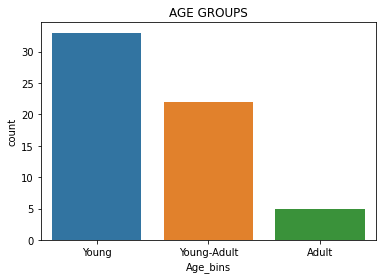

In [ ]:
sns.countplot(data=df498, x='Age_bins').set_title('AGE GROUPS');

In [ ]:
df498.Gender.value_counts(normalize=True)

Male      0.516667
Female    0.483333
Name: Gender, dtype: float64

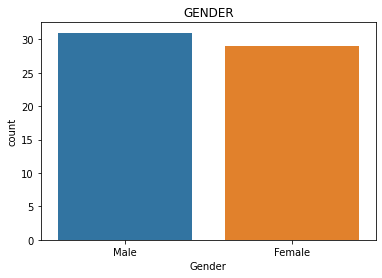

In [ ]:
sns.countplot(data=df498, x='Gender').set_title('GENDER');

In [ ]:
df498.MaritalStatus.value_counts(normalize=True)

Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64

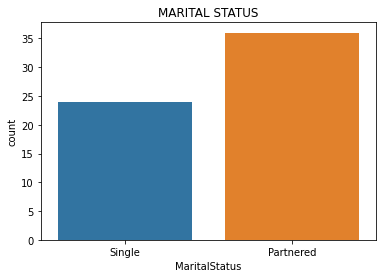

In [ ]:
sns.countplot(data=df498, x='MaritalStatus').set_title('MARITAL STATUS');

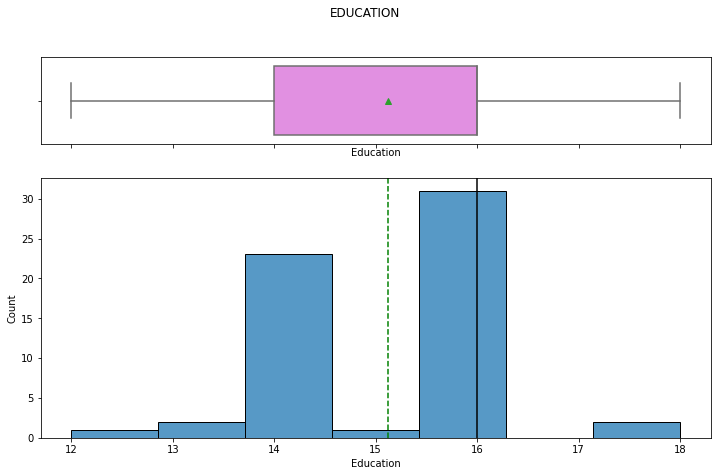

In [ ]:
histogram_boxplot(data=df498, feature='Education')

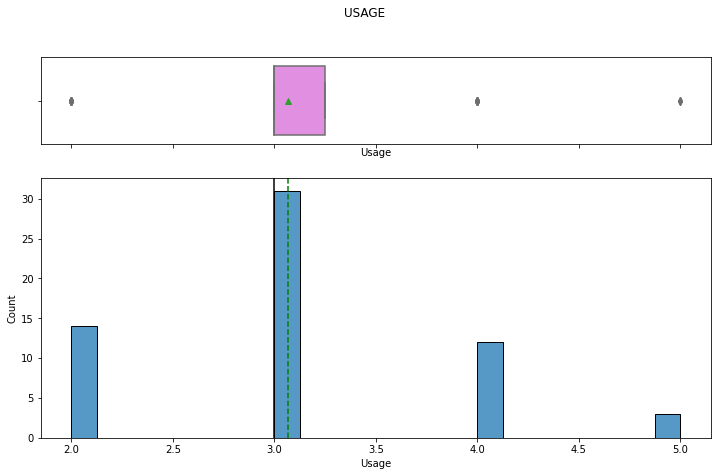

In [ ]:
histogram_boxplot(data=df498, feature='Usage')

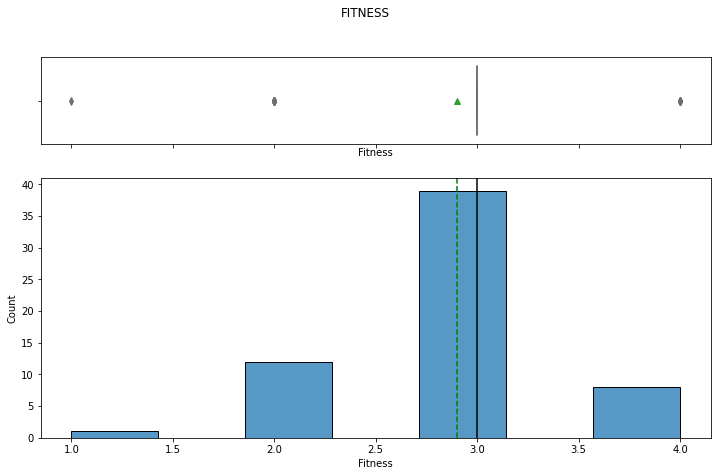

In [ ]:
histogram_boxplot(data=df498, feature='Fitness')

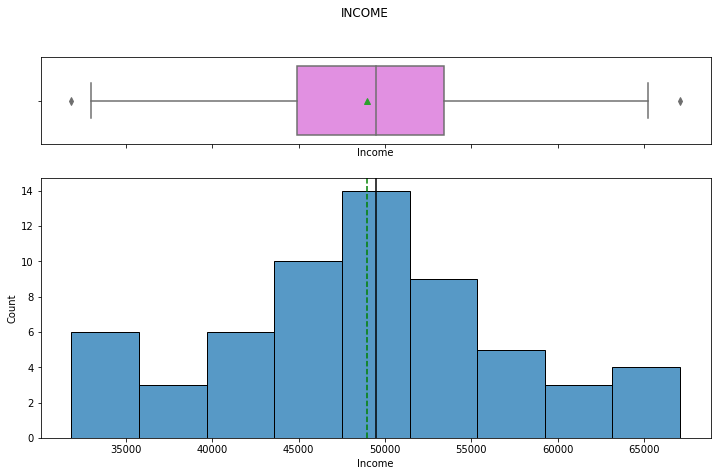

In [ ]:
histogram_boxplot(data=df498, feature='Income')

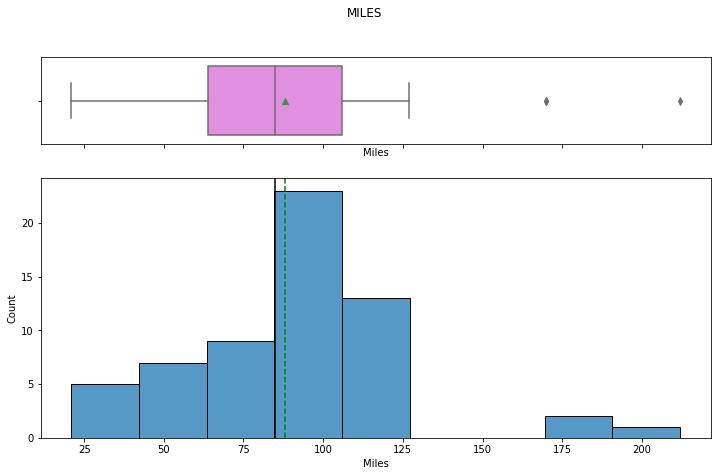

In [ ]:
histogram_boxplot(data=df498, feature='Miles')

###Bivariate analysis

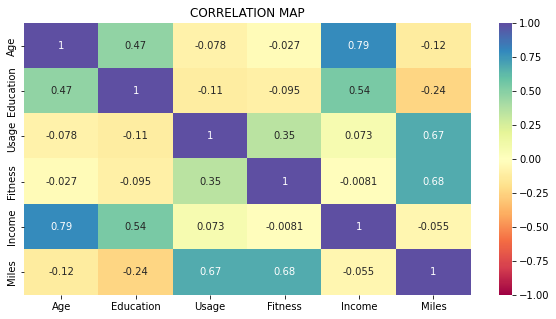

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df498.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1).set_title('CORRELATION MAP')
plt.show()

                      mean          sem       ci95_hi       ci95_lo
Age / Income                                                       
19            31836.000000          NaN           NaN           NaN
20            35247.000000  1736.796188  38651.120529  31842.879471
21            33731.000000   379.000000  34473.840000  32988.160000
23            42231.428571  1390.955185  44957.700734  39505.156409
24            46617.000000  2861.387251  52225.319012  41008.680988
25            46410.272727   904.653285  48183.393165  44637.152290
26            48891.000000  1736.796188  52295.120529  45486.879471
27            45480.000000          NaN           NaN           NaN
29            51165.000000          NaN           NaN           NaN
30            52302.000000  5685.000000  63444.600000  41159.400000
31            56229.000000  4507.466140  65063.633634  47394.366366
32            56850.000000  3411.000000  63535.560000  50164.440000
33            51165.000000  1078.652910  53279.1

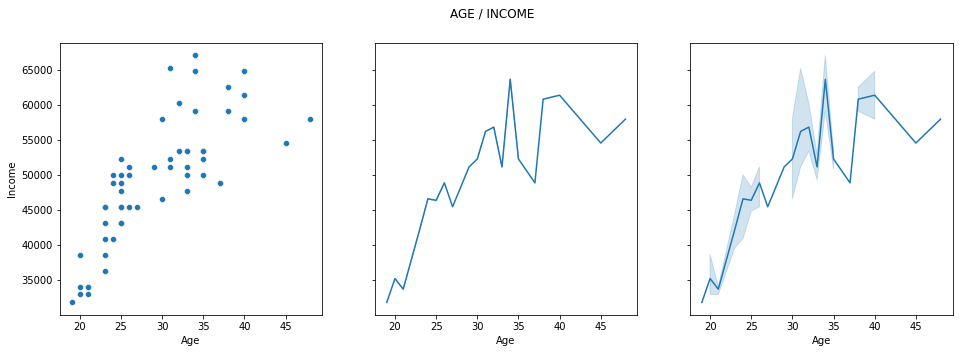

In [ ]:
two_numerical_plot(data=df498, var1='Age', var2='Income')

                     mean        sem     ci95_hi    ci95_lo
Usage / Miles                                              
2               56.785714   5.104597   66.790724  46.780705
3               86.774194   3.217797   93.081075  80.467312
4              114.833333   9.859493  134.157939  95.508728
5              137.666667  37.302070  210.778724  64.554609 



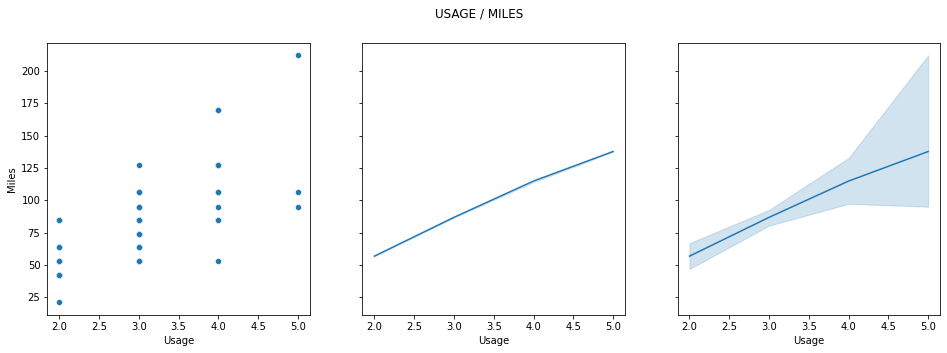

In [ ]:
two_numerical_plot(data=df498, var1='Usage', var2='Miles')

                       mean        sem     ci95_hi    ci95_lo
Fitness / Miles                                              
1                 21.000000        NaN         NaN        NaN
2                 54.666667   3.928014   62.365574  46.967759
3                 92.102564   3.558798   99.077807  85.127321
4                125.875000  16.101727  157.434386  94.315614 



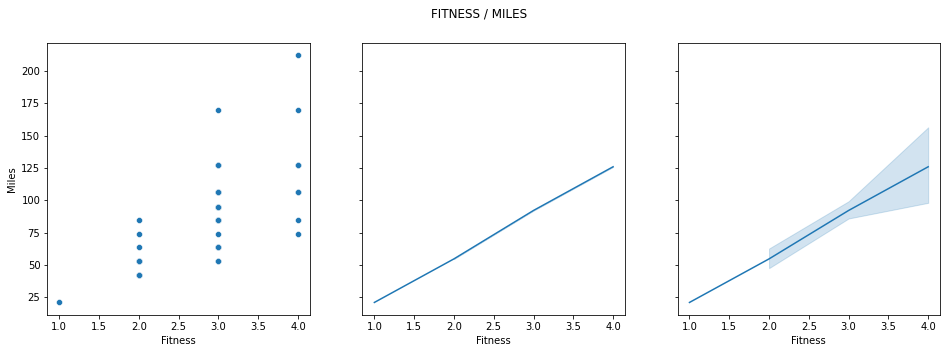

In [ ]:
two_numerical_plot(data=df498, var1='Fitness', var2='Miles')

In [ ]:
df498.groupby(['Age_bins','Gender']).count().MaritalStatus

Age_bins     Gender
Young        Female    15
             Male      18
Young-Adult  Female    12
             Male      10
Adult        Female     2
             Male       3
Name: MaritalStatus, dtype: int64

In [ ]:
df498.groupby(['Age_bins','MaritalStatus']).Gender.count()

Age_bins     MaritalStatus
Young        Partnered        17
             Single           16
Young-Adult  Partnered        15
             Single            7
Adult        Partnered         4
             Single            1
Name: Gender, dtype: int64

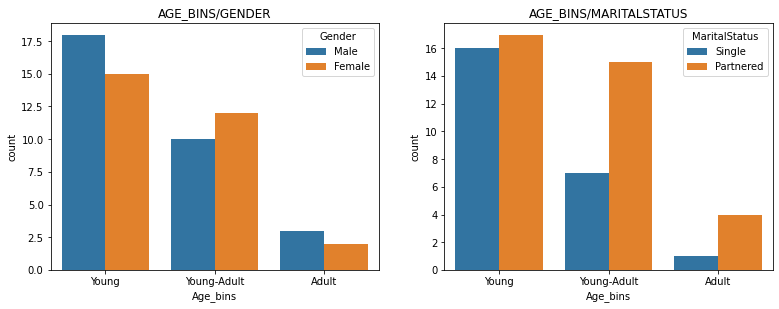

In [ ]:
two_categorical_plot(data=df498, var1='Age_bins', hue=['Gender', 'MaritalStatus'])

In [ ]:
df498.groupby(['Gender','MaritalStatus']).Product.count()

Gender  MaritalStatus
Female  Partnered        15
        Single           14
Male    Partnered        21
        Single           10
Name: Product, dtype: int64

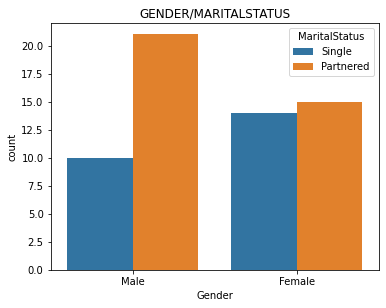

In [ ]:
two_categorical_plot(data=df498, var1='Gender', hue=['MaritalStatus'])

In [ ]:
df498.groupby(['Age_bins','Gender']).Income.mean()

Age_bins     Gender
Young        Female    44039.80
             Male      42637.50
Young-Adult  Female    54231.25
             Male      56281.50
Adult        Female    59692.50
             Male      59124.00
Name: Income, dtype: float64

                         mean          sem       ci95_hi       ci95_lo
Gender / Income                                                       
Female           49336.448276  1482.681879  52242.504760  46430.391792
Male             48634.258065  1680.423643  51927.888406  45340.627723 



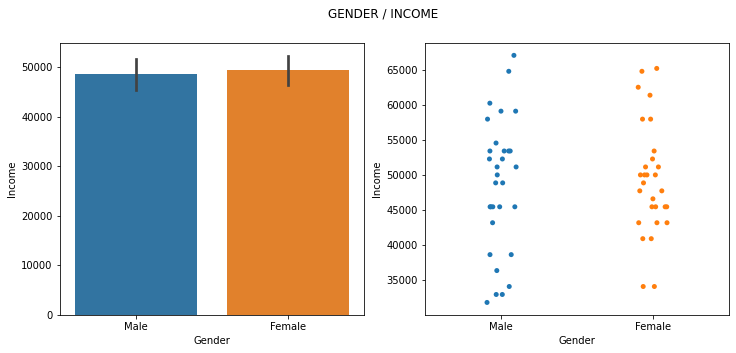

In [ ]:
categorical_numerical_plot(data=df498, var1='Gender', var2='Income')

                                mean          sem       ci95_hi       ci95_lo
MaritalStatus / Income                                                       
Partnered               49522.666667  1439.233970  52343.565248  46701.768085
Single                  48150.125000  1796.492003  51671.249325  44629.000675 



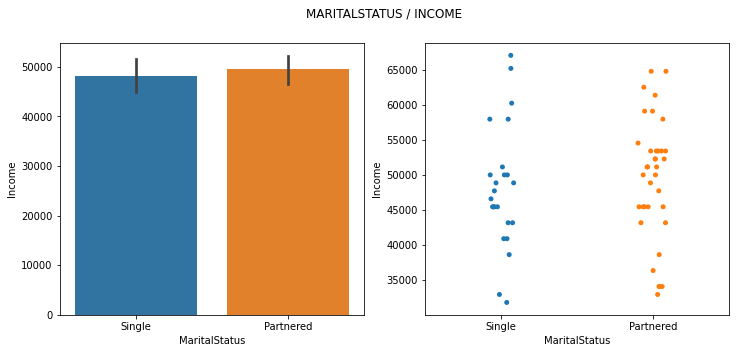

In [ ]:
categorical_numerical_plot(data=df498, var1='MaritalStatus', var2='Income')

                         mean       sem    ci95_hi    ci95_lo
Gender / Education                                           
Female              15.206897  0.239968  15.677233  14.736560
Male                15.032258  0.209884  15.443631  14.620885 



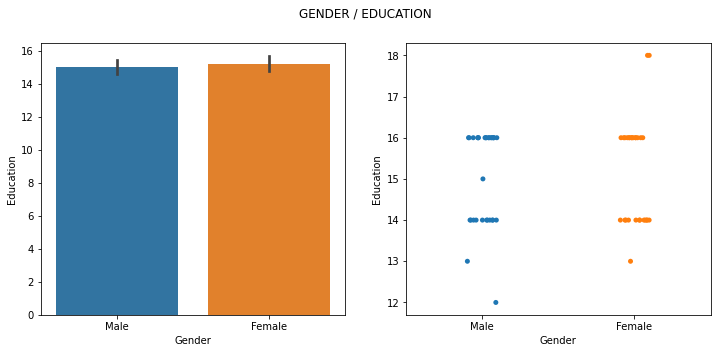

In [ ]:
categorical_numerical_plot(data=df498, var1='Gender', var2='Education')

                                mean       sem    ci95_hi    ci95_lo
MaritalStatus / Education                                           
Partnered                  15.250000  0.188457  15.619375  14.880625
Single                     14.916667  0.275291  15.456237  14.377097 



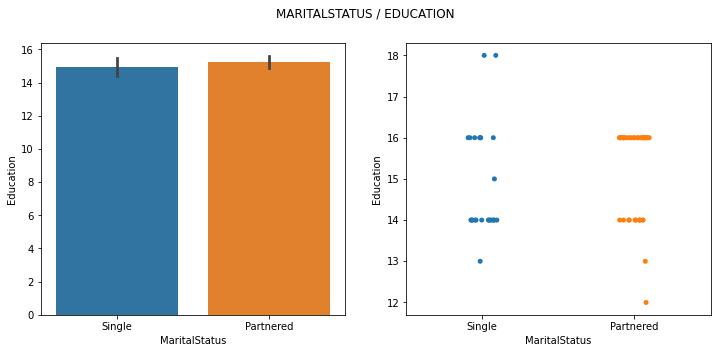

In [ ]:
categorical_numerical_plot(data=df498, var1='MaritalStatus', var2='Education')

                      mean       sem   ci95_hi   ci95_lo
Gender / Fitness                                        
Female            2.862069  0.128693  3.114307  2.609830
Male              2.935484  0.103024  3.137411  2.733557 



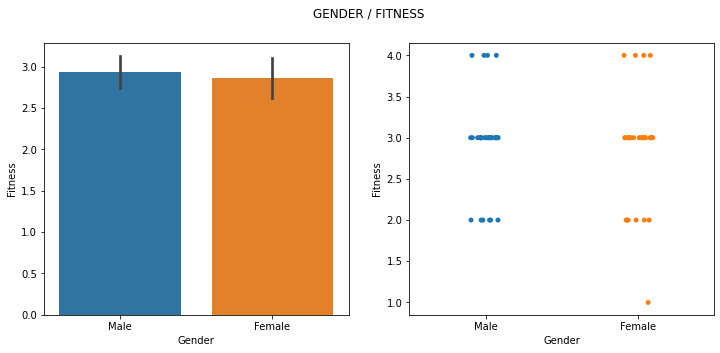

In [ ]:
categorical_numerical_plot(data=df498, var1='Gender', var2='Fitness')

                             mean       sem   ci95_hi   ci95_lo
MaritalStatus / Fitness                                        
Partnered                2.916667  0.092367  3.097707  2.735626
Single                   2.875000  0.151233  3.171416  2.578584 



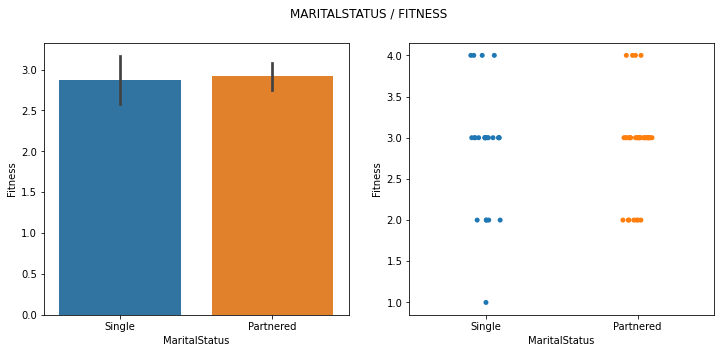

In [ ]:
categorical_numerical_plot(data=df498, var1='MaritalStatus', var2='Fitness')

                    mean       sem   ci95_hi   ci95_lo
Gender / Usage                                        
Female          3.137931  0.169933  3.470999  2.804863
Male            3.000000  0.122694  3.240480  2.759520 



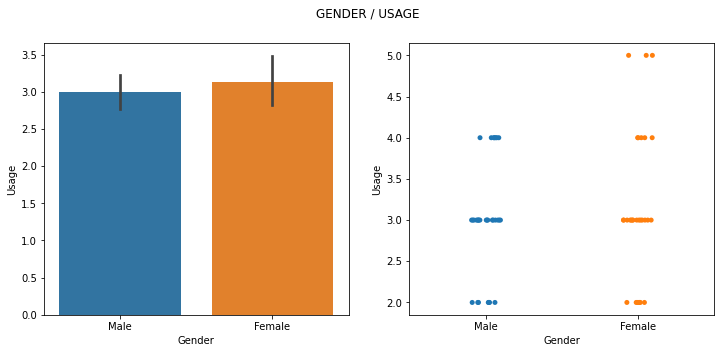

In [ ]:
categorical_numerical_plot(data=df498, var1='Gender', var2='Usage')

                           mean       sem   ci95_hi   ci95_lo
MaritalStatus / Usage                                        
Partnered              3.055556  0.148775  3.347155  2.763956
Single                 3.083333  0.133469  3.344933  2.821734 



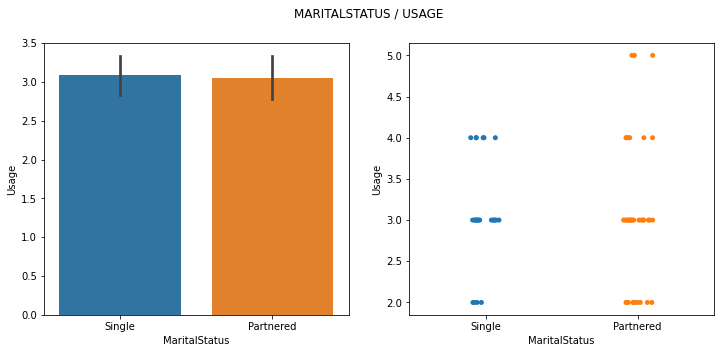

In [ ]:
categorical_numerical_plot(data=df498, var1='MaritalStatus', var2='Usage')

###Multivariate analysis

                         mean          sem       ci95_hi       ci95_lo
Gender / Income                                                       
Female           49336.448276  1482.681879  52242.504760  46430.391792
Male             48634.258065  1680.423643  51927.888406  45340.627723 



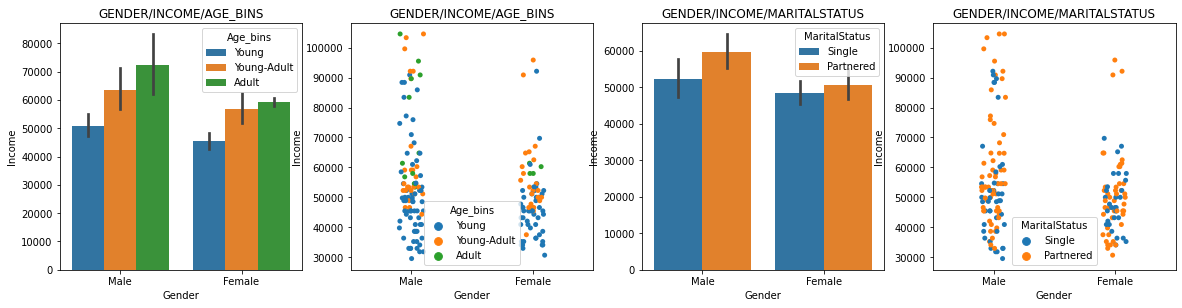

In [ ]:
multi_variate_plot(data=df498, var1='Gender', var2='Income', hue=['Age_bins', 'MaritalStatus'])

                         mean       sem    ci95_hi    ci95_lo
Gender / Education                                           
Female              15.206897  0.239968  15.677233  14.736560
Male                15.032258  0.209884  15.443631  14.620885 



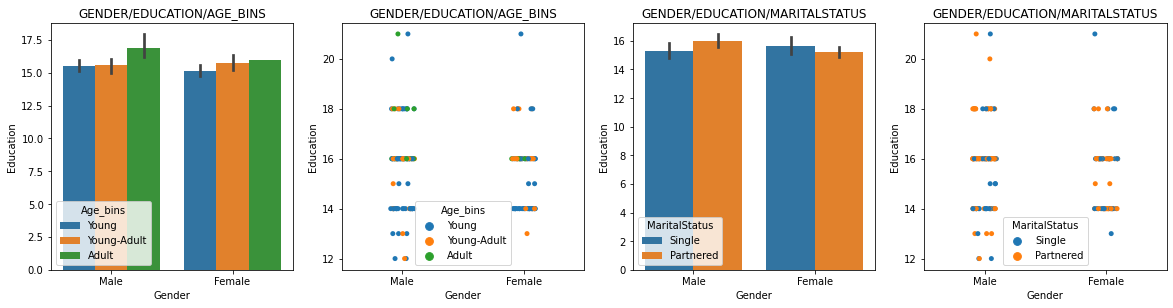

In [ ]:
multi_variate_plot(data=df498, var1='Gender', var2='Education', hue=['Age_bins', 'MaritalStatus'])

                     mean       sem     ci95_hi    ci95_lo
Gender / Miles                                            
Female          87.344828  6.212627   99.521577  75.168078
Male            88.483871  6.039275  100.320850  76.646892 



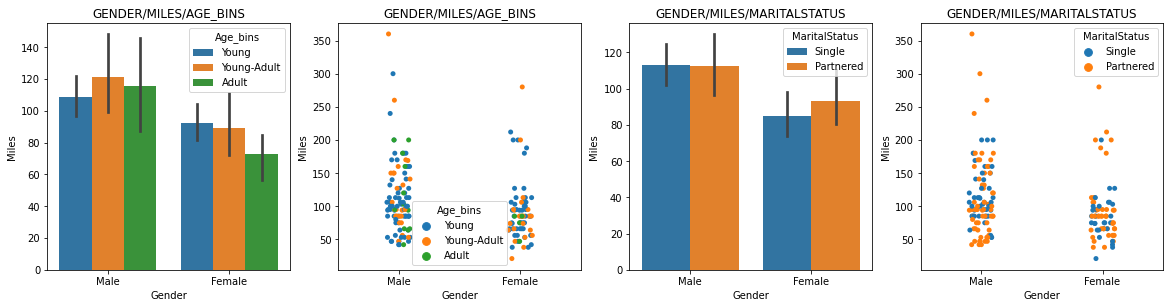

In [ ]:
multi_variate_plot(data=df498, var1='Gender', var2='Miles', hue=['Age_bins', 'MaritalStatus'])

                      mean       sem   ci95_hi   ci95_lo
Gender / Fitness                                        
Female            2.862069  0.128693  3.114307  2.609830
Male              2.935484  0.103024  3.137411  2.733557 



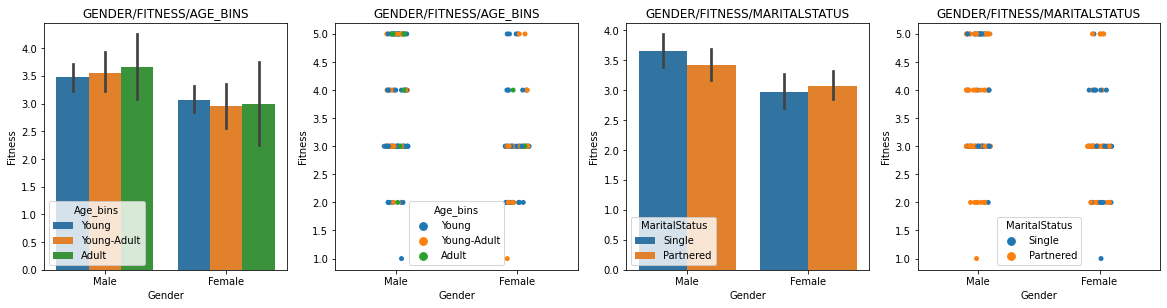

In [ ]:
multi_variate_plot(data=df498, var1='Gender', var2='Fitness', hue=['Age_bins', 'MaritalStatus'])

                    mean       sem   ci95_hi   ci95_lo
Gender / Usage                                        
Female          3.137931  0.169933  3.470999  2.804863
Male            3.000000  0.122694  3.240480  2.759520 



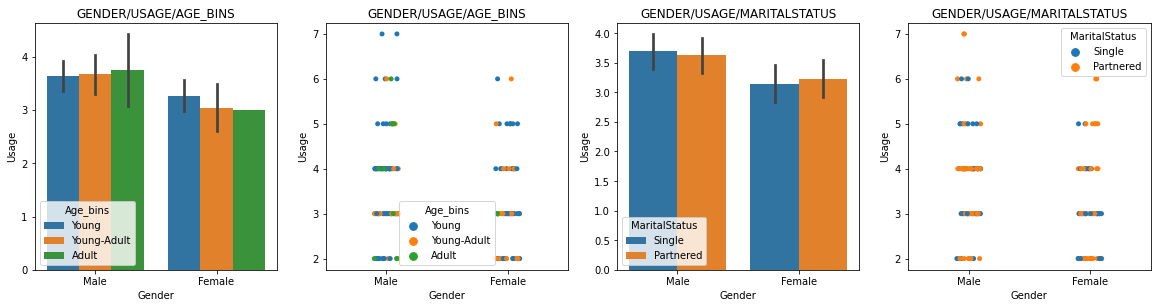

In [ ]:
multi_variate_plot(data=df498, var1='Gender', var2='Usage', hue=['Age_bins', 'MaritalStatus'])

                       mean       sem     ci95_hi    ci95_lo
Age_bins / Miles                                            
Young             90.848485  6.494333  103.577378  78.119591
Young-Adult       86.681818  6.185581   98.805557  74.558079
Adult             74.200000  9.504736   92.829282  55.570718 



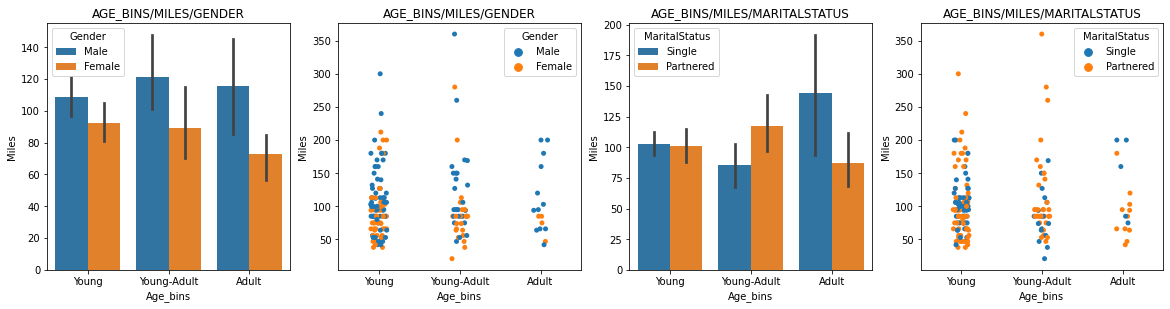

In [ ]:
multi_variate_plot(data=df498, var1='Age_bins', var2='Miles', hue=['Gender', 'MaritalStatus'])

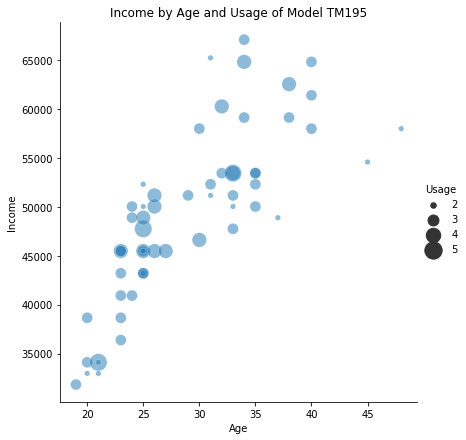

In [ ]:
sns.relplot(data=df498, x="Age", y="Income", size="Usage", sizes=(30, 300), alpha=0.5, palette="dark", height=6).set(title='Income by Age and Usage of Model TM195');

###Observations

*Observations*
- This is the second most popular model between customers, 33% of them bought this particular model
- 55% of customers are Young, 36% ara Young-Adult and only 8% are Adults
  - That 55% of Young customers are composed as follows:
    * 17 Partnered and 16 Single (almost 50%-50%)
    * 15 Female and 18 Male (45%-55%)
- Maximum income of customers who bought this model is 67.000 USD/Year, and the average income is 49,000 USD/Year
  - The difference of Income due to Gender or MaritalStatus is minimal around 1,000 USD/year in each case
- 51% of customers who bought this model are Male and 49% Female
  - 67% (21 out of 31) male customers are Partnered and only 37% are singe
  - Female customers are almost 50%-50%
- 60% of customers wh bought this model are Partnered and 40% Single
- Years of education varies from 12 to 18 years, with a mean of 15.1 and media of 16. Nor Gender or MaritalStatus have significative differences
- Customers see themselves as a regular fitness person, mean of 2.9 on a scale from 1 to 5, there is no significaative difference due to Gender or MaritalStatus
- Customers intend to use the tredmill 3 times per week on average, there is no significative difference between male and female cutomers nor between Partnered or single ones


##Model TM798

###Data Overview

In [ ]:
df798 = df[df.Product == 'TM798']

In [ ]:
df798.shape

(40, 10)

In [ ]:
df798.describe(include='all').T

count unique        top freq       mean          std      min  \
Product          40      1      TM798   40        NaN          NaN      NaN   
Age            40.0    NaN        NaN  NaN       29.1     6.971738     22.0   
Gender           40      2       Male   33        NaN          NaN      NaN   
Education      40.0    NaN        NaN  NaN     17.325     1.639066     14.0   
MaritalStatus    40      2  Partnered   23        NaN          NaN      NaN   
Usage          40.0    NaN        NaN  NaN      4.775     0.946993      3.0   
Fitness        40.0    NaN        NaN  NaN      4.625     0.667467      3.0   
Income         40.0    NaN        NaN  NaN  75441.575  18505.83672  48556.0   
Miles          40.0    NaN        NaN  NaN      166.9    60.066544     80.0   
Age_bins         40      3      Young   27        NaN          NaN      NaN   

                    25%      50%      75%       max  
Product             NaN      NaN      NaN       NaN  
Age               24.75     27.0    30.25      48.0  
Gender              NaN      NaN      NaN       NaN  
Education          16.0     18.0     18.0      21.0  
MaritalStatus       NaN      NaN      NaN       NaN  
Usage               4.0      5.0      5.0       7.0  
Fitness             4.0      5.0      5.0       5.0  
Income         58204.75  76568.5  90886.0  104581.0  
Miles             120.0    160.0    200.0     360.0  
Age_bins            NaN      NaN      NaN       NaN

###Univariate analysis

In [ ]:
df798.Age_bins.value_counts(normalize=True)

Young          0.675
Young-Adult    0.200
Adult          0.125
Name: Age_bins, dtype: float64

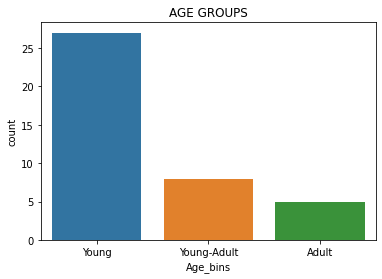

In [ ]:
sns.countplot(data=df798, x='Age_bins').set_title('AGE GROUPS');

In [ ]:
df798.Gender.value_counts(normalize=True)

Male      0.825
Female    0.175
Name: Gender, dtype: float64

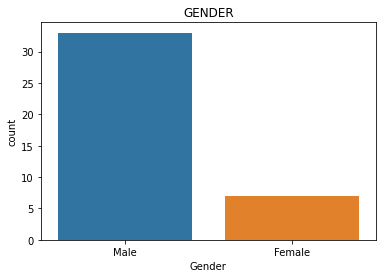

In [ ]:
sns.countplot(data=df798, x='Gender').set_title('GENDER');

In [ ]:
df798.MaritalStatus.value_counts(normalize=True)

Partnered    0.575
Single       0.425
Name: MaritalStatus, dtype: float64

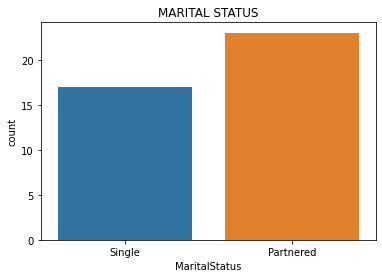

In [ ]:
sns.countplot(data=df798, x='MaritalStatus').set_title('MARITAL STATUS');

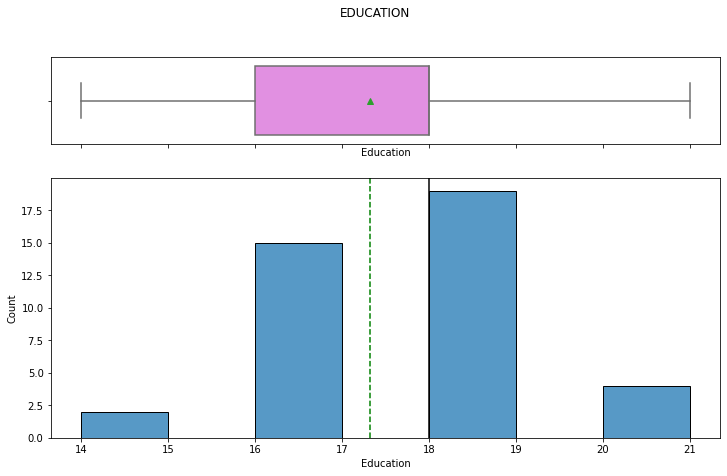

In [ ]:
histogram_boxplot(data=df798, feature='Education')

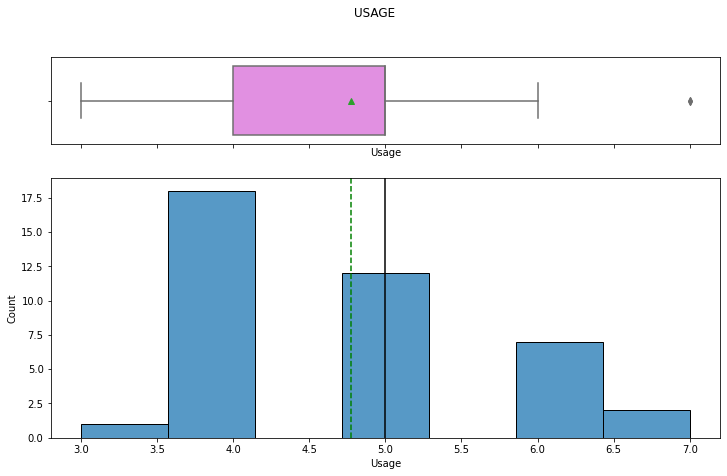

In [ ]:
histogram_boxplot(data=df798, feature='Usage')

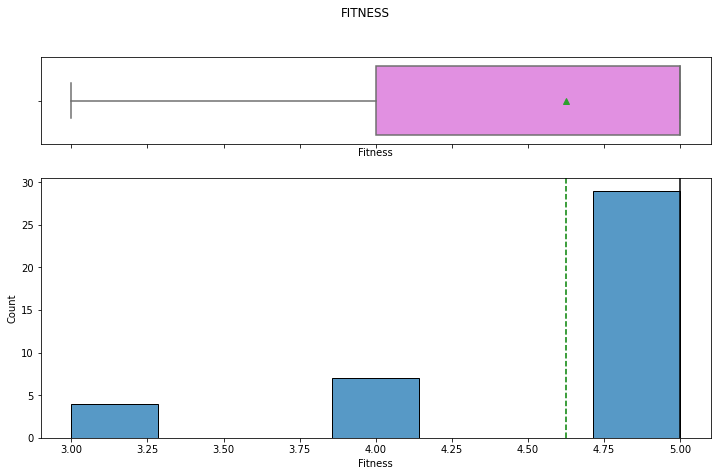

In [ ]:
histogram_boxplot(data=df798, feature='Fitness')

In [ ]:
df798.Fitness.value_counts()

5    29
4     7
3     4
Name: Fitness, dtype: int64

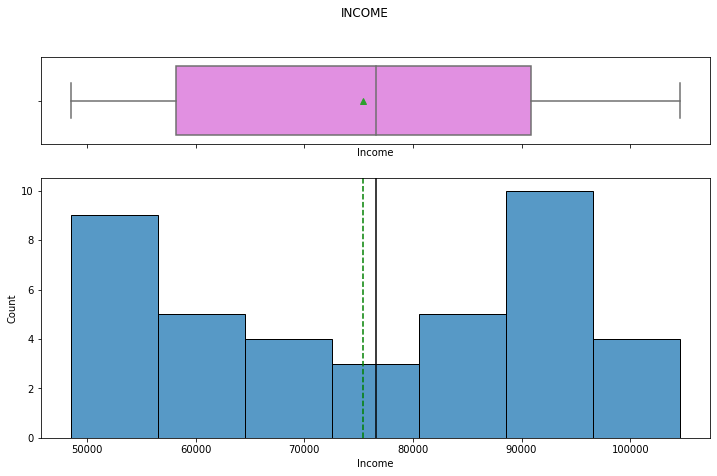

In [ ]:
histogram_boxplot(data=df798, feature='Income')

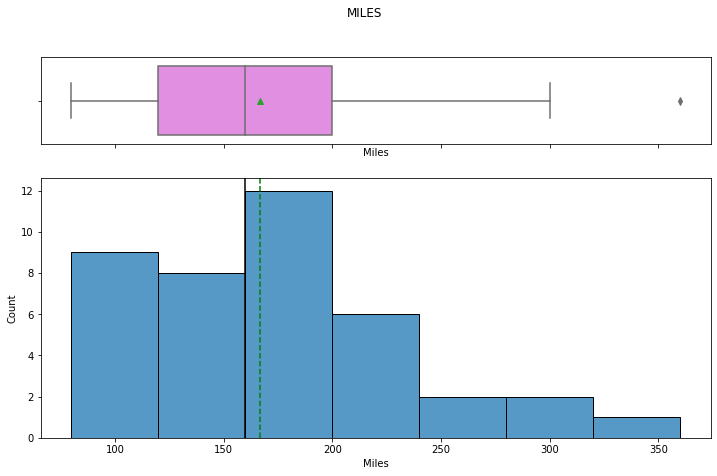

In [ ]:
histogram_boxplot(data=df798, feature='Miles')

###Bivariate analysis

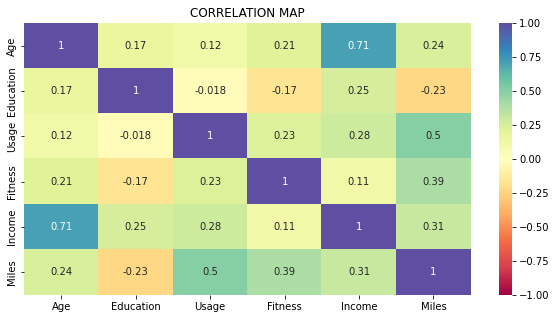

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df798.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1).set_title('CORRELATION MAP')
plt.show()

                       mean           sem        ci95_hi       ci95_lo
Age / Income                                                          
22             50665.000000   2058.210631   54699.092836  46630.907164
23             53536.000000   2875.204341   59171.400508  47900.599492
24             55092.250000   2509.377724   60010.630339  50173.869661
25             65630.285714   3454.887399   72401.865016  58858.706413
26             67231.000000   2490.000000   72111.400000  62350.600000
27             87566.000000   2195.973588   91870.108233  83261.891767
28             85906.000000   4488.911338   94704.266222  77107.733778
29             69098.000000  16808.000000  102041.680000  36154.320000
30             97941.000000   3688.600683  105170.657339  90711.342661
31             89641.000000           NaN            NaN           NaN
33             95866.000000           NaN            NaN           NaN
34             92131.000000           NaN            NaN           NaN
35    

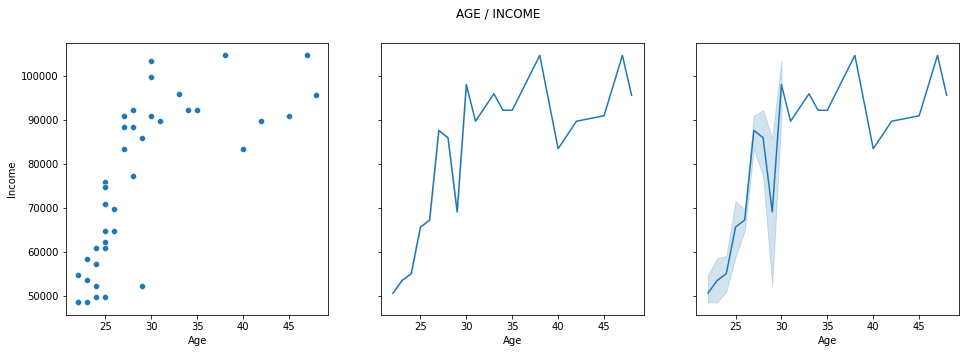

In [ ]:
two_numerical_plot(data=df798, var1='Age', var2='Income')

                     mean        sem     ci95_hi     ci95_lo
Usage / Miles                                               
3              120.000000        NaN         NaN         NaN
4              144.222222  15.523029  174.647358  113.797086
5              165.833333   8.299172  182.099711  149.566955
6              212.857143  18.088971  248.311527  177.402759
7              240.000000  60.000000  357.600000  122.400000 



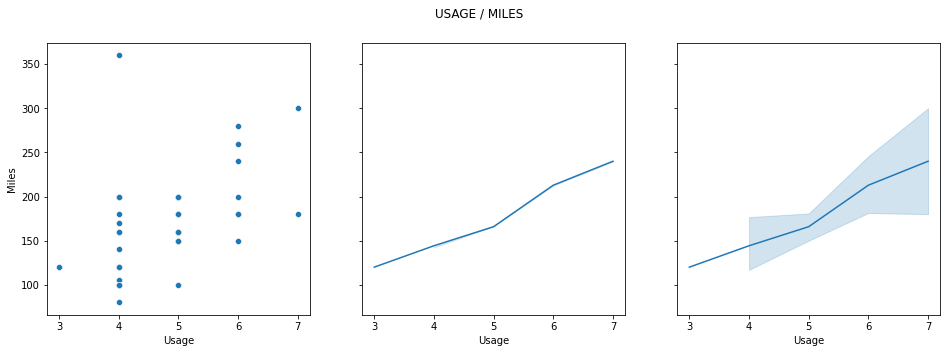

In [ ]:
two_numerical_plot(data=df798, var1='Usage', var2='Miles')

                       mean        sem     ci95_hi     ci95_lo
Fitness / Miles                                               
3                101.500000   1.500000  104.440000   98.560000
4                154.285714  14.937512  183.563237  125.008192
5                178.965517  11.579079  201.660513  156.270522 



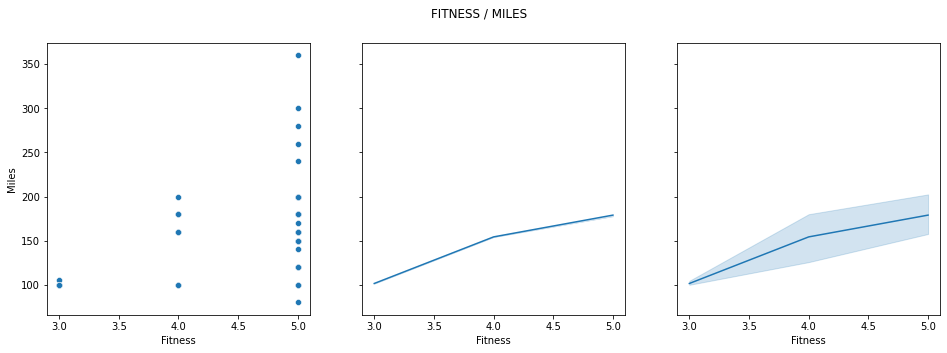

In [ ]:
two_numerical_plot(data=df798, var1='Fitness', var2='Miles')

In [ ]:
df798.groupby(['Age_bins','Gender']).count().MaritalStatus

Age_bins     Gender
Young        Female     5
             Male      22
Young-Adult  Female     2
             Male       6
Adult        Female     0
             Male       5
Name: MaritalStatus, dtype: int64

In [ ]:
df798.groupby(['Age_bins','MaritalStatus']).Gender.count()

Age_bins     MaritalStatus
Young        Partnered        14
             Single           13
Young-Adult  Partnered         7
             Single            1
Adult        Partnered         2
             Single            3
Name: Gender, dtype: int64

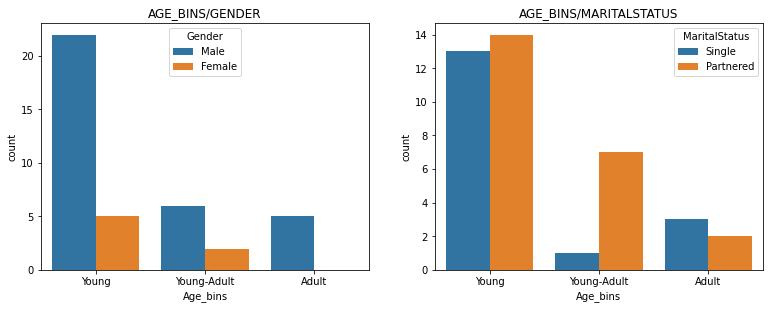

In [ ]:
two_categorical_plot(data=df798, var1='Age_bins', hue=['Gender', 'MaritalStatus'])

In [ ]:
df798.groupby(['Gender','MaritalStatus']).Product.count()

Gender  MaritalStatus
Female  Partnered         4
        Single            3
Male    Partnered        19
        Single           14
Name: Product, dtype: int64

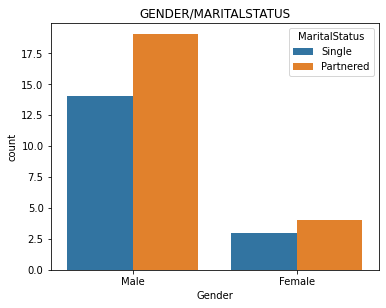

In [ ]:
two_categorical_plot(data=df798, var1='Gender', hue=['MaritalStatus'])

In [ ]:
df798.groupby(['Age_bins','Gender']).Income.mean()

Age_bins     Gender
Young        Female    65737.000000
             Male      66216.954545
Young-Adult  Female    93376.000000
             Male      96903.500000
Adult        Female             NaN
             Male      92806.400000
Name: Income, dtype: float64

                         mean          sem       ci95_hi       ci95_lo
Gender / Income                                                       
Female           73633.857143  7185.076370  87716.606829  59551.107457
Male             75825.030303  3250.900664  82196.795604  69453.265002 



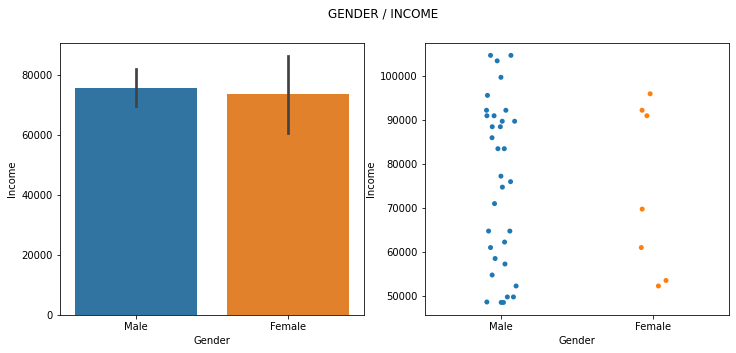

In [ ]:
categorical_numerical_plot(data=df798, var1='Gender', var2='Income')

                                mean          sem       ci95_hi       ci95_lo
MaritalStatus / Income                                                       
Partnered               82047.173913  3416.990024  88744.474360  75349.873466
Single                  66504.588235  4324.537707  74980.682142  58028.494329 



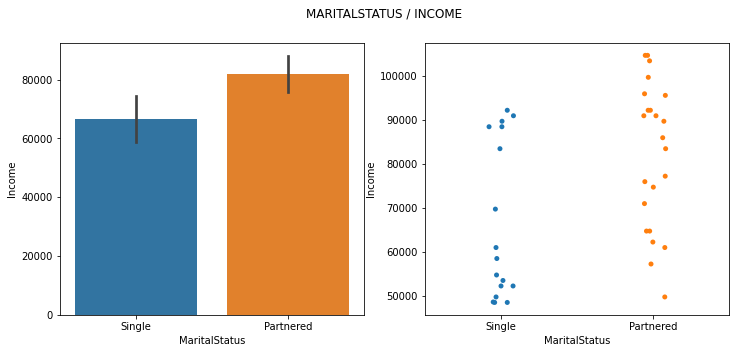

In [ ]:
categorical_numerical_plot(data=df798, var1='MaritalStatus', var2='Income')

                         mean      sem    ci95_hi    ci95_lo
Gender / Education                                          
Female              17.857143  0.63353  19.098862  16.615424
Male                17.212121  0.28457  17.769879  16.654363 



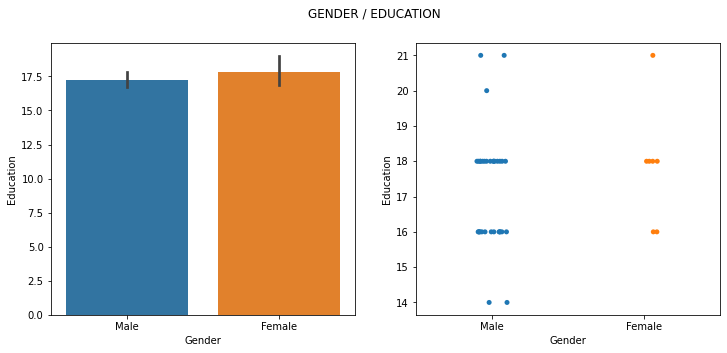

In [ ]:
categorical_numerical_plot(data=df798, var1='Gender', var2='Education')

                                mean       sem    ci95_hi    ci95_lo
MaritalStatus / Education                                           
Partnered                  17.434783  0.313252  18.048757  16.820809
Single                     17.176471  0.447504  18.053578  16.299363 



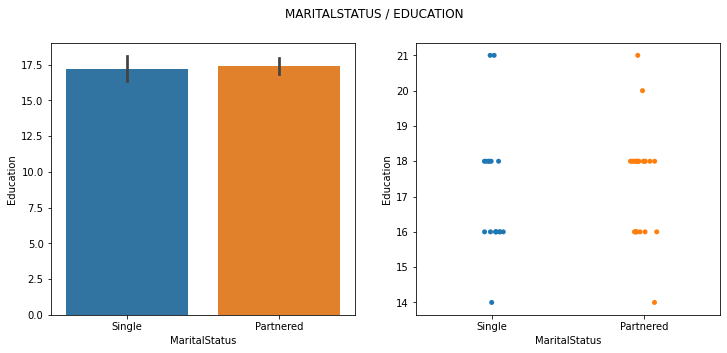

In [ ]:
categorical_numerical_plot(data=df798, var1='MaritalStatus', var2='Education')

                      mean       sem   ci95_hi   ci95_lo
Gender / Fitness                                        
Female            4.571429  0.297381  5.154295  3.988562
Male              4.636364  0.113636  4.859091  4.413636 



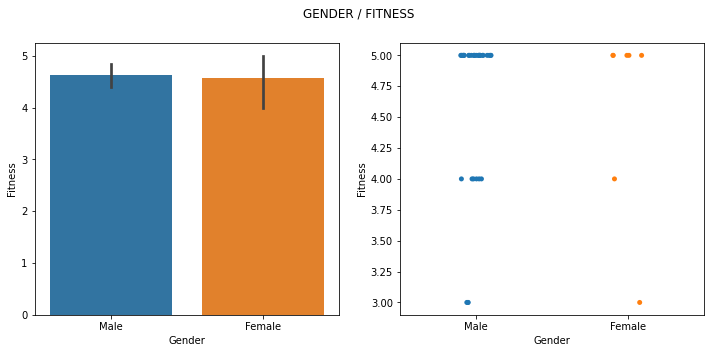

In [ ]:
categorical_numerical_plot(data=df798, var1='Gender', var2='Fitness')

                             mean       sem   ci95_hi   ci95_lo
MaritalStatus / Fitness                                        
Partnered                4.695652  0.116517  4.924026  4.467279
Single                   4.529412  0.193984  4.909620  4.149203 



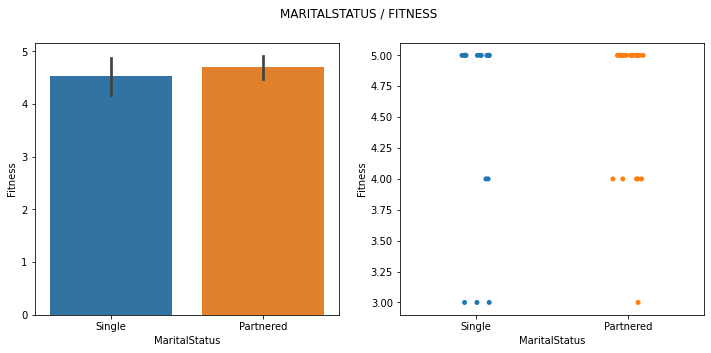

In [ ]:
categorical_numerical_plot(data=df798, var1='MaritalStatus', var2='Fitness')

                    mean       sem   ci95_hi   ci95_lo
Gender / Usage                                        
Female          5.000000  0.308607  5.604869  4.395131
Male            4.727273  0.170075  5.060620  4.393925 



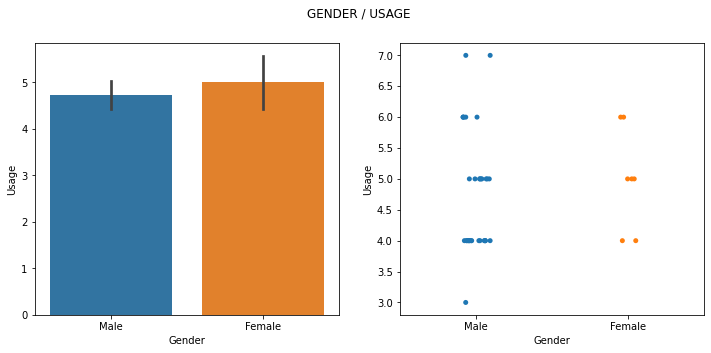

In [ ]:
categorical_numerical_plot(data=df798, var1='Gender', var2='Usage')

                           mean       sem   ci95_hi   ci95_lo
MaritalStatus / Usage                                        
Partnered              4.913043  0.216996  5.338355  4.487732
Single                 4.588235  0.192866  4.966252  4.210218 



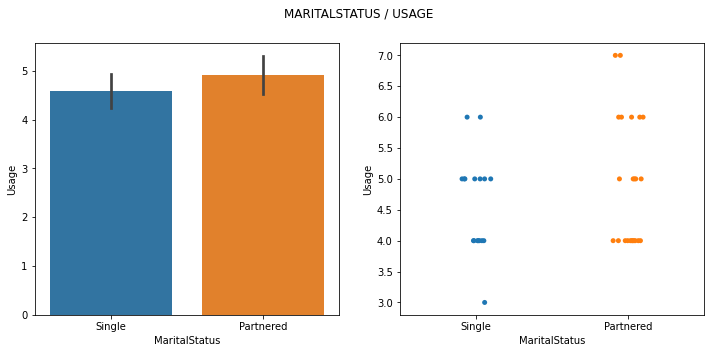

In [ ]:
categorical_numerical_plot(data=df798, var1='MaritalStatus', var2='Usage')

###Multivariate analysis

                         mean          sem       ci95_hi       ci95_lo
Gender / Income                                                       
Female           73633.857143  7185.076370  87716.606829  59551.107457
Male             75825.030303  3250.900664  82196.795604  69453.265002 



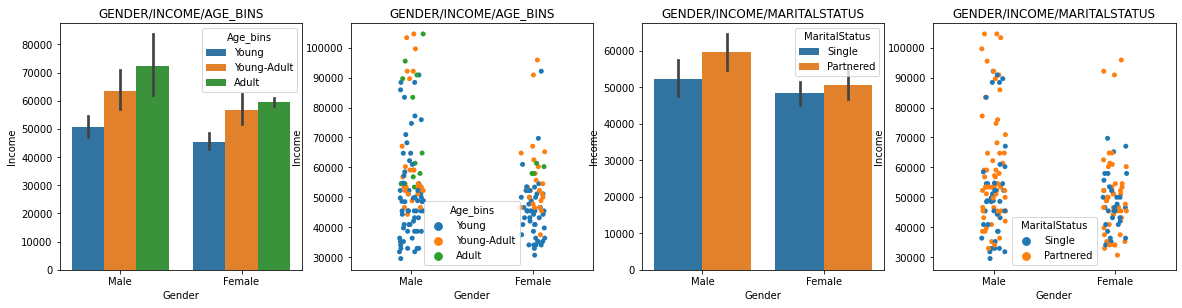

In [ ]:
multi_variate_plot(data=df798, var1='Gender', var2='Income', hue=['Age_bins', 'MaritalStatus'])

                         mean      sem    ci95_hi    ci95_lo
Gender / Education                                          
Female              17.857143  0.63353  19.098862  16.615424
Male                17.212121  0.28457  17.769879  16.654363 



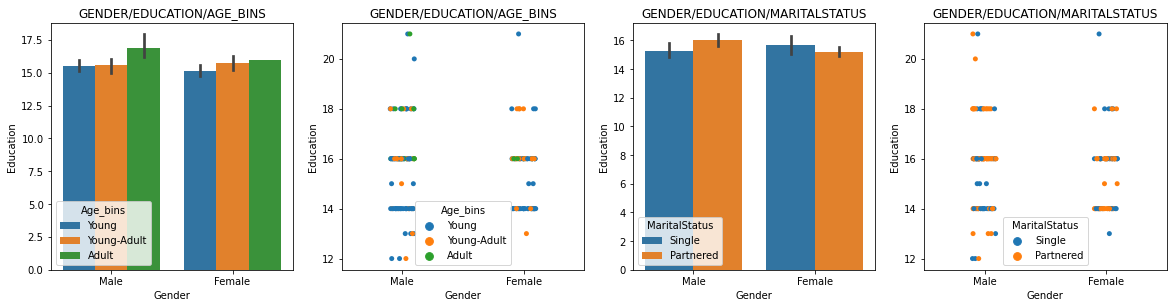

In [ ]:
multi_variate_plot(data=df798, var1='Gender', var2='Education', hue=['Age_bins', 'MaritalStatus'])

                      mean        sem     ci95_hi     ci95_lo
Gender / Miles                                               
Female          180.000000  23.904572  226.852961  133.147039
Male            164.121212  10.447176  184.597677  143.644748 



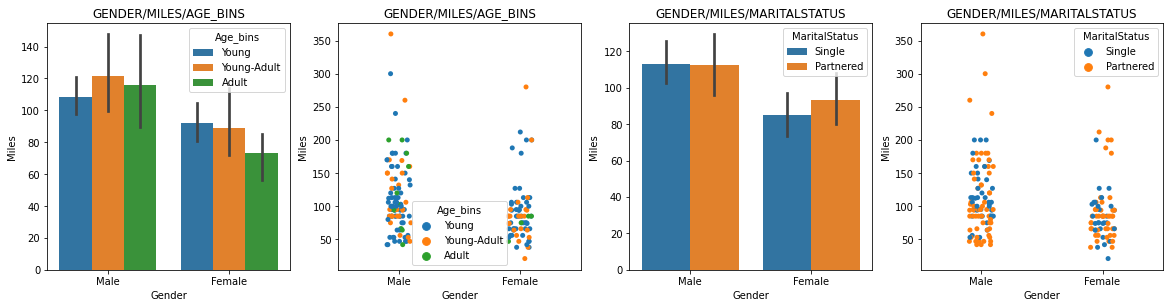

In [ ]:
multi_variate_plot(data=df798, var1='Gender', var2='Miles', hue=['Age_bins', 'MaritalStatus'])

                      mean       sem   ci95_hi   ci95_lo
Gender / Fitness                                        
Female            4.571429  0.297381  5.154295  3.988562
Male              4.636364  0.113636  4.859091  4.413636 



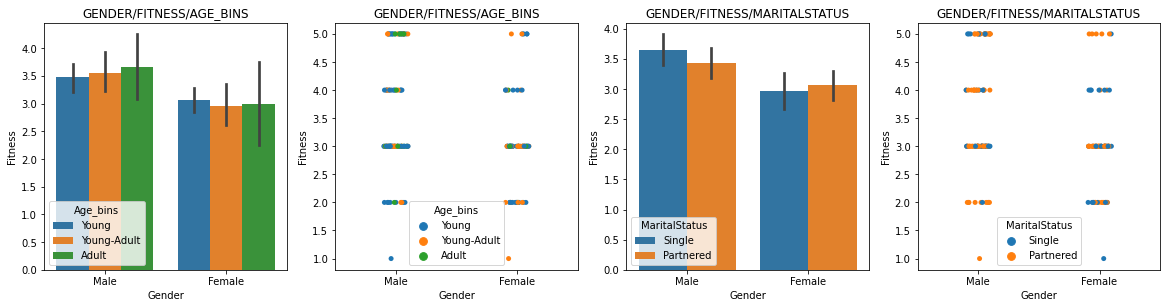

In [ ]:
multi_variate_plot(data=df798, var1='Gender', var2='Fitness', hue=['Age_bins', 'MaritalStatus'])

                    mean       sem   ci95_hi   ci95_lo
Gender / Usage                                        
Female          5.000000  0.308607  5.604869  4.395131
Male            4.727273  0.170075  5.060620  4.393925 



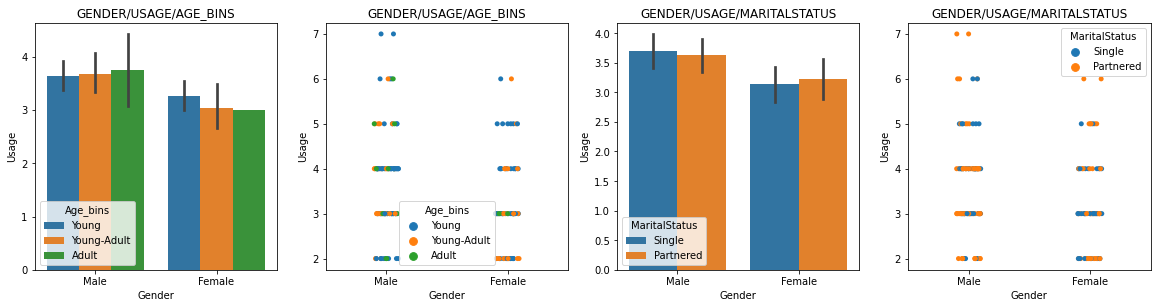

In [ ]:
multi_variate_plot(data=df798, var1='Gender', var2='Usage', hue=['Age_bins', 'MaritalStatus'])

                        mean        sem     ci95_hi     ci95_lo
Age_bins / Miles                                               
Young             152.074074   9.944279  171.564860  132.583288
Young-Adult       213.750000  27.770584  268.180345  159.319655
Adult             172.000000  14.966630  201.334594  142.665406 



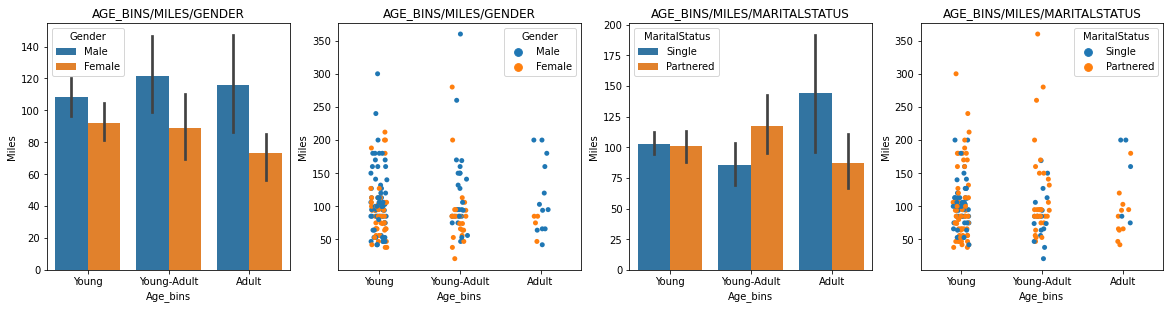

In [ ]:
multi_variate_plot(data=df798, var1='Age_bins', var2='Miles', hue=['Gender', 'MaritalStatus'])

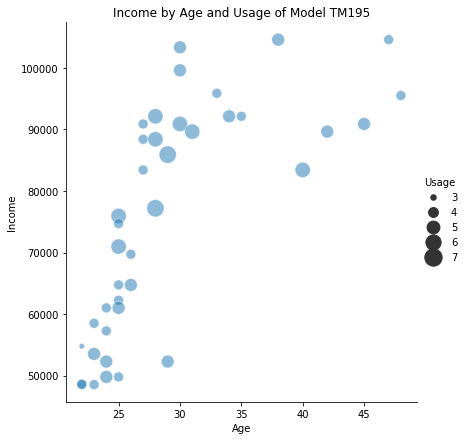

In [ ]:
sns.relplot(data=df798, x="Age", y="Income", size="Usage", sizes=(30, 300), alpha=0.5, palette="dark", height=6).set(title='Income by Age and Usage of Model TM195');

###Observations

*Observations*
- This model is the least popular one between customers, only 22% of customers bought this model
- 67% of customers are Young, 20% Young-Adults and 13% Adults
  - That 67% of Young customers are composed as follows:
    - 5 Female and 22 Male customers (18%-82%)
    - 14 Partnered and 13 Single customers (52%-48%)
- The most wealthy customers bought this model. Maximum income of customers is 105,000 USD/Year, average income of customers is 76,000 USD/Year
  - Gender has no significative difference in income of the customers who bought this model, Female customers earn 73,600 USD/Year and Male customers earn 76,000 USD/Year
  - Partnered customers who bought this model earn in average 82,000 USD/Year while Single customers earn only 66,000
- 82% of customers who bought this model are male and only 18% are female
  - 19 out of 33 male customers (57%) are Partnered and only 14 (43%)are Single
  - 4 out of 7 female customers (57%) are Partnered and only 3 (43%)are Single
- 57% of this model customers are Partnered and 43% Single
- The most educated customers prefer this product. Years of education varies from 14 to 21 years, with a mean of 17 and a media of 18, gender and marital status have no significative difference
- Customers see themselves as a very fitness person, mean of 4.6 on a scale from 1 to 5, there is no significative difference due to Gender or MaritalStatus
- Customers who bought this model are intensive users. Customers intend to use the tredmill 4.8 times per week on average, there is no significative difference between male and female cutomers nor between partnered and single ones
 

# Observations / Insights Summary

##Data Overview

**Shape of data**
- The data set has  180 rows and  9  columns

**Data types and null values**
- We can see that we have 180 entries in the data set with index from 0 to 179
- The data set has 6 numerical columns of type int64: [Age, Education, Usage, Fitness, Income, Miles]
- The data set has 3 columns of type object: [Product, Gender, MaritalStatus]
- All the columns have 180 observations, which means that there are non missing values

**Statistical Summary**
- Product
  - 3 unique values: : TM195, TM498 and TM798
- Age
  - Range from 18 to 50
  - Mean and median are close
  - Max value far away from median, possible right skewness
- Gender
  - 2 unique values: Male and Female
- Education
  - Range from 12 to 21
  - Mean close to median
- MaritalStatus
  - 2 unique values: Single and Partnered
- Usage
  - Range from 2 to 7
  - Median and 25% quartile have the same value
- Fitness
  - Range from 1 to 5
  - Median and 25% quartile have the same value
- Income
  - Range from 29,562 to 104,581
  - Max value far away from median, possible right skewness
- Miles
  - Range from 21 to 360

##Univariate analysis

- Age
  * Age has right-skewed distribution
  * Have some outliers in the higher end
  * The median is close to 26 years
  * The mean is close to 29 years
- Education
  * Education has some outliers in the higher end
  * Mean and median are close to 16 years
- Usage
  * Usage has a slightly right-skewed distribution
  * Some outliers in the higher end
  * Median is equal to the 25% quartile
- Fitness
  * Median value and 25% quartile value are the same
  * Some outliers in the lower-end
  * Second place of observations is the maximum value
- Income
  * Income has a right-skewed distribution
  * Some outliers in the higher end
  * Median close to 50,000 USD/year
  * Mean close to 54,000 USD/year
- Miles
  * Miles has a right-skewed distribution
  * Some outliers in the higher end
  * Median and mean close to 100 miles
- Product
  * Product has 3 unique values: TM195, TM498 and TM798
  * The most frequent is TM195 with 80 observations - 44.4%
  * The least frequent is TM798 with 40 observations - 22.2%
- Gender
  * Gender has 2 unique values: Male and Female
  * Male is the most frequent with 104 observations
  * Female has 76 observations
- Marital Status
  * There are 2 unique values for MaritalStatus: Single and Partnered
  * Partnered is the most frequent value with 107 observations
  * Single is the least frequent value with 73 observations



##Bivariate analysis


- Correlations
  * The column Miles has a high correlation with Usage and Fitness. This indicates that more the customers calificate themselves as a fitness person and more times they will use the treadmill the miles they expect to run is higher
  * The column Fitness and Usage are highly correlated as expected, indicating that the customers that consider themselves as more fitness persons will use the tredmill more hours per week
  * The Income variable has a relative high correlation with every other numerical variable in the dataset. Indicating that with a higher income the customers have more years of education, consider themselves as more fitness person, will use more hours the treadmill, and expect to run higher number of miles per week
- We created a new categorical variable based on age, we named it Age_bins and has the following values: ['Young', 'Young-adult', 'Adult'] with ranges 18-29, 30-39, 40-50 respectively
- Age / Education
  * We can see an slightly positive correlation
  * We have an inusual low value at age 36
  * We only have 1 data row in the data frame with age of 36 and has an inusual low value of education
- Age / Usage
  * Customers of age 42 will use the tredmill 5 times per week on average
  * Customers of age 37 will only use the tredmill 2.5 times per week
  * These two variables are independent, no correlation detected
- Age / Fitness
  * Independent variables, no correlation detected
  * An inusual low value at age 46, we have only 1 entry on the dataset with that age and has a low fitness value
- Age / Income
  * We can see a positive correlation between Age and Income
- Age / Miles 
  * Independent variable, no correlation between them
  * An inusual high value at age 46, only 1 entry in the dataset at that age
- Education / Usage
  * With more years of education there is a higher usage per week expectation
  * Variables slightly correlated
- Education / Fitness
  * Variables slightly correlated
- Education / Income
  * Variables highly correlated
  * As the number of years of education increases the income of the customers increases as well
- Education / Miles 
  * Variables slightly correlated
  * As the numbers of years of education increases so does the miles expected to run per week
- Usage / Fitness
  * Variables correlated
  * As the expected use increases the fitness value increases as well
- Usage / Income
  * Variables slightly correlated
  * As the income of the customer increases so does the usage expectation per week
- Usage / Miles 
  * Variables highly correlated
  * As the number of usage per week increases so does the miles expected to run per week
- Fitness / Income
  * As higher the fitness perception of the customer higher is their income
  * An exception to the prior observation is visible at point 2 of fitness person
- Fitness / Miles 
  * With a higher self perception as a fitness person the customers intend to run more miles per week
- Income / Miles
  * Variables slightly correlated
As the income of the customer increases so does his expected miles to run per week
- Age_bins / Education
  * All adult customers have 16+ years of education
- Age_ bins / Usage
  * The expected usage per week is almost the same for all ages groups
- Age_ bins / Fitness
  * The difference of how fitness they think they are between the different groups of ages is minimal
  * The Adult customers consider themselves on average more fitness persons that the other range of ages
  * The Adult group has an extensive confidence interval due to a higher standard error
- Age_ bins / Income
  * The income increases as the age of the customer does
- Age_ bins / Miles
  * The expected miles to run is almost the same for every age group
  * As the age increases so does de confidence interval of miles to run per week, meaning that younger customers are more consistent in their expectation than adults
  * We can see in the graph that the mean of miles the young people intend to run is the lower one and the Young-Adults are the ones that intend to run more miles per week
  * We can see also that the confidence interval is really high for the Adults and very low for the Young, meaning that the adults will run 105.125 miles per week with a confidence interval from 79.5 to 130.7 having the highest standard error with a value of 13
- Product / Education
  * Customers with more than 18 years of education only buy TM798 model
  * Customers have in average more than 15 years of education
- Product / Usage
  * Intensive users (those who want to use more times per week the tredmill) prefer TM798 model
- Product / Fitness
  * Customers who consider themselves more fitness persons prefer the TM798 model
- Product / Income
  * Customers with more income prefer the TM798 model
  * Customers with income higher than 70,000 USD/year only buy the TM798 model
- Product / Miles
  * Customers who intend to run a lot of miles per week prefer the TM798 model
  * Only customers who bought TM798 model intend to run more than 212 miles
- Gender / Education
  * This 2 variables are independent
- Gender / Usage
  * Male customers intend to use the tredmill more times per week than the female ones
- Gender / Fitness
  * Male customers consider themselves a little more fitness persons than the female ones
- Gender / Income
  * Male customers have more income
- Gender / Miles
  * Male customers intent to run a little bit more than female customers
- MaritalStatus / Education
  * These 2 variables are independent
- MaritalStatus / Usage
  * These 2 variables are independent
- MaritalStatus / Fitness
  * These 2 variables are independent
- MaritalStatus / Income
  * Partnered customers have a little higher income than single ones
- MaritalStatus / Miles
  * These 2 variables are independent
- Product / Age_bins 
  - TM195 model is preferred by young people
  - Young-Adults buy TM195 and TM498 models the same
  - Adults buy the same the 3 models
- Product / Gender 
  - TM195 and TM498 are equally preferred by men and women
  - TM798 is clearly preferred by males
- Prodcut / MaritalStatus 
  - Partnered customers buy more of every models than single ones
- Age_bins / Gender
  - Male customers number is greater than female one in every age range
- Age_bins / MaritalStatus
  - Partnered customers number is greater than single one in every range of age
- Gender / MaritalStatus
  - Partnered customers number is greater than single one independent of the gender



##Multivariate analysis

- Age_bins / Education -> (Product, Gender, Marital Status)
  * Young, young-adults and adults prefer TM798 model as the years of education increases
  * Male adults are the ones with a higher years of education
  * Single male adults have the most years of education
- Age_bins / Usage -> (Product, Gender, Marital Status)
  * Young, young-adults and adults who intend to use the tredmill more than 3.5 times per week use TM798 model
  * Gender has nothing to do on how the customers of different range of age will use the tredmills
  * Single adults intend to use the tredmill significantly more than everyone else
- Age_bins / Fitness -> (Product, Gender, Marital Status)
  * Independently of the range of age, the customers who see themselves more as a fitness persons will use the TM798 model
  * Gender is independent as how the customers of different ranges of age see themselves as a fitness persons
  * Single adults are the group who sees themselves as more fitness persons
- Age_bins / Income -> (Product, Gender, Marital Status)
  * Every one with income higher than 70,000 will buy TM798 model
  * Males have a higher income in all group of ages
  * Single adults have the higher income
- Age_bins / Miles -> (Product, Gender, Marital Status)
  * TM798 model is prefered by all the customers who intend to run more than 100 miles on average, independent of their age
  * Male customers intend to run more miles than female ones independent of their age
  * Single adults are the ones who intend to run more miles
- Product / Education -> (Gender, MaritalStatus)
  * Customers with more than 15 years of education use TM798 model and are adults and from those female customers have the most years of education
  * MaritalStatus is independent to the Product-Education relationship
- Product / Usage -> (Gender, MaritalStatus)
  * Customers who will use the tredmill more tahn 5 times per week use the TM798 model, and there are slightly more female customers than males
  * On average TM798 model will be used more times per week than the other models independent of the marital status
- Product / Fitness -> (Gender, MaritalStatus)
  * Gender and marital status are independent to the relation Product-Fitness
- Product / Income -> (Gender, MaritalStatus)
  * Gender is independent to the reltion Product-Income
  * Partnered customers with high income prefer the most TM798 model
- Product / Miles -> (Gender, MaritalStatus)
  * Gender is independent to the relation Product-Miles
  * Partnered customers who use TM798 model intend to run more miles than single ones
- Gender / Education -> (MaritalStatus)
  * Marital status is independent to the relation Gender-Education
- Gender / Usage -> (MaritalStatus)
  * Marital status is independent to the relation Gender-Usage
- Gender / Fitness -> (MaritalStatus)
  * Marital status is independent to the relation Gender-Fitness
- Gender / Income -> (MaritalStatus)
  * Male partnered customers have more income than single ones
- Gender / Miles -> (MaritalStatus)
  * Female partnered customers intend to run more than single ones
- TM798 customers have more years of education and have higher income

#Conclusions

##Key Observations


- Customer age varies from 18 to 50 years, with mean of 29 years and it has right-skewed distribution
- Customer expected use of tredmill varies from 2 to 7 days, with mean of 3.5 days
- Income of customers varies from around 29,000 to 105,000 USD/year with a mean of close to 54,000 USD/year
- 75% of customers earn less than 58,668 USD/Year
- 44% of customers bought TM195 model, 33% bought TM498 model and only 22% bought TM798 model
- 58% of customers are male and 42% female
- 59% of customers are partnered and 41% single
- Customers use the tredmill from 2 to 7 days per week with an average of 3.4 days. Male customers use more times the tredmill than female ones, 3.65 vs 3.18 times per week respectively



##Customer Profiles of Product Models


###Model TM195

**Characteristics**
- <font color="grey" size=2>This is the most popular model, 44% of customers bought this model</font>
- <font color="grey" size=2>67% of customers are Young, 25% Young-Adult and only 7% Adults</font>
  - <font color="grey" size=2>that 67% of Young customers are composed of:</font>
    * <font color="grey" size=2>28 female (53%) and 25 male (47%) customers </font>
    * <font color="grey" size=2>31 Partnered (58%) and 22 Single (42%) customers</font>
- <font color="grey" size=2>Maximum income of customers is 68,000 USD/Year, average income of customers is 46,000 USD/Year</font>
  - <font color="grey" size=2>The difference between male and female customers is minimal (less than 1,000 USD/year)</font>
  - <font color="grey" size=2>The difference between Partnered and Single customers is also small 48,000 USD/year for Partnered and 44,000 USD/year for Single customers</font>
- <font color="grey" size=2>50% of customers are male and 50% female</font>
  - <font color="grey" size=2>67% of female customers are Partnered and only 33% Single</font>
  - <font color="grey" size=2>Males are almost equaly divided by Partnered or Single customers</font>
- <font color="grey" size=2>60% of this model customers are Partnered and 40% Single</font>
- <font color="grey" size=2>Years of education varies from 12 to 18 years, with a mean of 15 and a media of 16, gender and marital status have no significative difference</font>
- <font color="grey" size=2>Customers see themselves as a regular fitness person, mean of 3 on a scale from 1 to 5, there is no significative difference due to Gender or MaritalStatus</font>
- <font color="grey" size=2>Customers intend to use the tredmill 3 times per week on average, there is no significative difference between male and female cutomers nor between partnered or single ones</font>

**Profile**

<font color="grey" size=2>
The ideal customer for the model TM195 is a partnered male or female of age between 18 and 29 years whose income per year is around 46,000 USD with 15 years of education and consider themselves as a regular fitness person who intend to use the tredmill 3 days per week
</font>

###Model TM498

**Characteristics**
- <font color="grey" size=2>This is the second most popular model between customers, 33% of them bought this particular model</font>
- <font color="grey" size=2>55% of customers are Young, 36% are Young-Adult and only 8% are Adults</font>
  - <font color="grey" size=2>That 55% of Young customers are composed as follows:</font>
    * <font color="grey" size=2>17 Partnered and 16 Single (almost 50%-50%)</font>
    * <font color="grey" size=2>15 Female and 18 Male (45%-55%)</font>
- <font color="grey" size=2>Maximum income of customers who bought this model is 67.000 USD/Year, and the average income is 49,000 USD/Year</font>
  - <font color="grey" size=2>The difference of income due to gender or marital status is minimal around 1,000 USD/year in each case</font>
- <font color="grey" size=2>51% of customers who bought this model are male and 49% female</font>
  - <font color="grey" size=2>67% (21 out of 31) male customers are partnered and only 37% are single</font>
  - <font color="grey" size=2>Female customers are almost 50%-50%</font>
- <font color="grey" size=2>60% of customers wh bought this model are partnered and 40% single</font>
- <font color="grey" size=2>Years of education varies from 12 to 18 years, with a mean of 15.1 and media of 16. Nor gender or marital status have significative differences</font>
- <font color="grey" size=2>Customers see themselves as a regular fitness person, mean of 2.9 on a scale from 1 to 5, there is no significative difference due to gender or marital status</font>
- <font color="grey" size=2>Customers intend to use the tredmill 3 times per week on average, there is no significative difference between male and female cutomers nor between partnered or single ones</font>

**Profile**

<font color="grey" size=2>
The ideal customer for the model TM498 is a partnered or single, male or female of age between 18 and 29 years whose income per year is around 49,000 USD with 15 years of education and consider themselves as a regular fitness person who intend to use the tredmill 3 days per week
</font>

###Model TM798

**Characteristics**
- <font color="grey" size=2>This model is the least popular one between customers, only 22% of customers bought this model</font>
- <font color="grey" size=2>67% of customers are Young, 20% Young-Adults and 13% Adults</font>
  - <font color="grey" size=2>That 67% of Young customers are composed as follows:</font>
    - <font color="grey" size=2>5 Female and 22 Male customers (18%-82%)</font>
    - <font color="grey" size=2>14 Partnered and 13 Single customers (52%-48%)</font>
- <font color="grey" size=2>The most wealthy customers bought this model. Maximum income of customers is 105,000 USD/Year, average income of customers is 76,000 USD/Year</font>
  - <font color="grey" size=2>Gender has no significative difference in income of the customers who bought this model, Female customers earn 73,600 USD/Year and Male customers earn 76,000 USD/Year</font>
  - <font color="grey" size=2>Partnered customers who bought this model earn in average 82,000 USD/Year while Single customers earn only 66,000</font>
- <font color="grey" size=2>82% of customers who bought this model are male and only 18% are female</font>
  - <font color="grey" size=2>19 out of 33 male customers (57%) are partnered and only 14 (43%)are single</font>
  - <font color="grey" size=2>4 out of 7 female customers (57%) are partnered and only 3 (43%)are single</font>
- <font color="grey" size=2>57% of this model customers are partnered and 43% single</font>
- <font color="grey" size=2>The most educated customers prefer this product. Years of education varies from 14 to 21 years, with a mean of 17 and a media of 18, gender and marital status have no significative difference</font>
- <font color="grey" size=2>Customers see themselves as a very fitness person, mean of 4.6 on a scale from 1 to 5, there is no significative difference due to gender or marital status</font>
- <font color="grey" size=2>Customers who bought this model are intensive users. Customers intend to use the tredmill 4.8 times per week on average, there is no significative difference between male and female cutomers nor between partnered and single ones</font>

**Profile**

<font color="grey" size=2>
The ideal customer for the model TM798 is a partnered or single, male of age between 18 and 29 years whose income per year is around 76,000 USD with 17 years of education and consider themselves as a very fitness person who intend to use the tredmill 5 days per week
</font>

#Convert ipynb to HTML

In [ ]:
%%shell
jupyter nbconvert --to html ///content/Project_1_Cardio_Good_Fitness_EMS.ipynb

[NbConvertApp] Converting notebook ///content/Project_1_Cardio_Good_Fitness_EMS.ipynb to html
[NbConvertApp] Writing 5153031 bytes to ///content/Project_1_Cardio_Good_Fitness_EMS.html
